In [1]:
import warnings, datetime
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import datetime

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")
#df = pd.read_csv('2016.csv', low_memory=False)
df = pd.read_pickle("2016_with_weather3.pkl")


Bad key "text.kerning_factor" on line 4 in
C:\Users\22929\anaconda3\envs\test_env1\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY,ORIGIN_INDEX,DEST_INDEX,O_LATITUDE,O_LONGITUDE,D_LATITUDE,D_LONGITUDE,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME_HOUR,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL
0,2016-01-01,DTW,LAX,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0,93,176,42.21206,-83.34884,33.94254,-118.40807,-1.7,0.0,24.1,18.3,0.0,5.4,1,1,5,20,22,6.0,6.0
1,2016-01-01,ATL,GRR,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0,20,130,33.64044,-84.42694,42.88082,-85.52277,7.8,0.0,11.2,-1.7,0.0,22.3,1,1,5,21,23,6.0,4.0
2,2016-01-01,LAX,ATL,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0,176,20,33.94254,-118.40807,33.64044,-84.42694,17.8,0.0,0.0,6.7,0.0,16.6,1,1,5,23,6,6.0,6.0
3,2016-01-01,SLC,ATL,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0,286,20,40.78839,-111.97777,33.64044,-84.42694,-13.3,0.0,7.6,7.2,0.0,18.4,1,1,5,17,22,6.0,6.0
4,2016-01-01,BZN,MSP,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0,52,216,45.77690,-111.15301,44.88055,-93.21692,-20.0,0.0,0.0,-8.9,0.0,18.4,1,1,5,9,12,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525985,2016-12-30,PWM,JFK,2016-12-30 05:45:00,2016-12-30 08:23:00,2016-12-30 09:14:00,2016-12-30 07:10:00,2016-12-30 08:12:00,2016-12-30 09:23:00,273.0,147.0,133.0,253,166,43.64617,-70.30875,40.63975,-73.77893,-0.6,3.0,33.5,2.8,0.0,20.5,12,30,5,6,7,4.0,6.0
5525986,2016-12-30,JFK,BOS,2016-12-30 07:44:00,2016-12-30 08:01:00,2016-12-30 08:43:00,2016-12-30 08:55:00,2016-12-30 07:39:00,2016-12-30 08:46:00,187.0,-5.0,-9.0,166,39,40.63975,-73.77893,42.36435,-71.00518,2.8,0.0,24.1,1.7,0.0,35.3,12,30,5,8,9,6.0,6.0
5525987,2016-12-30,BOS,RIC,2016-12-30 11:00:00,2016-12-30 11:52:00,2016-12-30 13:10:00,2016-12-30 12:51:00,2016-12-30 11:38:00,2016-12-30 13:15:00,474.0,38.0,24.0,39,259,42.36435,-71.00518,37.50517,-77.31967,1.7,0.0,31.7,2.2,0.0,18.4,12,30,5,11,13,6.0,4.0
5525988,2016-12-30,RIC,BOS,2016-12-30 13:30:00,2016-12-30 13:52:00,2016-12-30 15:05:00,2016-12-30 14:59:00,2016-12-30 13:45:00,2016-12-30 15:08:00,474.0,15.0,9.0,259,39,37.50517,-77.31967,42.36435,-71.00518,3.3,0.0,22.3,2.8,0.0,37.1,12,30,5,14,15,4.0,6.0


In [3]:
coordinate = pd.read_pickle("coordinate_interpolate.pkl")
coordinate

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,WEATHER,WEATHER_INTERPOLATE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp ...
...,...,...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prc...
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp s...
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023,<meteostat.interface.hourly.Hourly object at 0...,temp dwpt rhum prcp ...


In [4]:
df['DATE']

0         2016-01-01
1         2016-01-01
2         2016-01-01
3         2016-01-01
4         2016-01-01
             ...    
5525985   2016-12-30
5525986   2016-12-30
5525987   2016-12-30
5525988   2016-12-30
5525989   2016-12-30
Name: DATE, Length: 5525990, dtype: datetime64[ns]

In [5]:
df.describe()

,DISTANCE,DEP_DELAY,ARR_DELAY,ORIGIN_INDEX,DEST_INDEX,O_LATITUDE,O_LONGITUDE,D_LATITUDE,D_LONGITUDE,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME_HOUR,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL
count,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525985e+06,5.509593e+06,5.525985e+06,5.525968e+06,5.509437e+06,5.525968e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06,5.525990e+06
mean,8.510954e+02,8.884886e+00,3.534716e+00,1.610733e+02,1.610975e+02,3.669166e+01,-9.594015e+01,3.669220e+01,-9.594019e+01,1.639840e+01,1.104661e-01,1.271743e+01,1.707331e+01,1.148983e-01,1.333691e+01,6.532792e+00,1.573187e+01,3.927834e+00,1.336281e+01,1.458400e+01,5.496969e+00,5.496588e+00
std,6.200191e+02,3.962284e+01,4.189768e+01,8.827234e+01,8.828803e+01,6.056229e+00,1.860065e+01,6.057437e+00,1.860497e+01,1.008472e+01,1.183178e+00,8.813223e+00,1.016616e+01,1.190489e+00,8.886364e+00,3.391290e+00,8.776354e+00,1.985164e+00,4.952520e+00,5.449362e+00,8.529233e-01,8.529856e-01
min,3.000000e+01,-2.040000e+02,-1.520000e+02,0.000000e+00,0.000000e+00,1.348345e+01,-1.766460e+02,1.348345e+01,-1.766460e+02,-3.780000e+01,0.000000e+00,0.000000e+00,-3.780000e+01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.910000e+02,-5.000000e+00,-1.400000e+01,8.500000e+01,8.500000e+01,3.343417e+01,-1.120081e+02,3.343417e+01,-1.120081e+02,1.000000e+01,0.000000e+00,7.600000e+00,1.060000e+01,0.000000e+00,7.600000e+00,4.000000e+00,8.000000e+00,2.000000e+00,9.000000e+00,1.100000e+01,5.000000e+00,5.000000e+00
50%,6.780000e+02,-2.000000e+00,-6.000000e+00,1.740000e+02,1.740000e+02,3.736186e+01,-9.035999e+01,3.736186e+01,-9.035999e+01,1.720000e+01,0.000000e+00,1.120000e+01,1.830000e+01,0.000000e+00,1.300000e+01,7.000000e+00,1.600000e+01,4.000000e+00,1.300000e+01,1.500000e+01,6.000000e+00,6.000000e+00
75%,1.096000e+03,6.000000e+00,6.000000e+00,2.360000e+02,2.360000e+02,4.078839e+01,-8.131603e+01,4.078839e+01,-8.131603e+01,2.390000e+01,0.000000e+00,1.840000e+01,2.500000e+01,0.000000e+00,1.840000e+01,9.000000e+00,2.300000e+01,6.000000e+00,1.800000e+01,1.900000e+01,6.000000e+00,6.000000e+00
max,4.983000e+03,2.149000e+03,2.142000e+03,3.210000e+02,3.210000e+02,7.128545e+01,-6.479856e+01,7.128545e+01,-6.479856e+01,4.720000e+01,2.542000e+02,1.980000e+02,5.400000e+01,2.542000e+02,1.554833e+02,1.200000e+01,3.100000e+01,7.000000e+00,2.300000e+01,2.300000e+01,6.000000e+00,6.000000e+00


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#pd.concat([total, percent], axis=1, keys=['Total', 'Percent']


In [7]:
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
D_PRCP,16553,2.995481e-03
O_PRCP,16397,2.967251e-03
D_WSPD,22,3.981187e-06
D_TEMP,22,3.981187e-06
O_WSPD,5,9.048152e-07
O_TEMP,5,9.048152e-07
DATE,0,0.000000e+00
D_LATITUDE,0,0.000000e+00
ORIGIN_LEVEL,0,0.000000e+00
CRS_ARR_TIME_HOUR,0,0.000000e+00


In [8]:
df = df.loc[df["ORIGIN"].isin(coordinate['IATA_CODE']) | df["DEST"].isin(coordinate['IATA_CODE'])]
df

,DATE,ORIGIN,DEST,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DEP_DELAY,ARR_DELAY,ORIGIN_INDEX,DEST_INDEX,O_LATITUDE,O_LONGITUDE,D_LATITUDE,D_LONGITUDE,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME_HOUR,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL
0,2016-01-01,DTW,LAX,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,0.0,-24.0,93,176,42.21206,-83.34884,33.94254,-118.40807,-1.7,0.0,24.1,18.3,0.0,5.4,1,1,5,20,22,6.0,6.0
1,2016-01-01,ATL,GRR,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,5.0,-2.0,20,130,33.64044,-84.42694,42.88082,-85.52277,7.8,0.0,11.2,-1.7,0.0,22.3,1,1,5,21,23,6.0,4.0
2,2016-01-01,LAX,ATL,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,1.0,-13.0,176,20,33.94254,-118.40807,33.64044,-84.42694,17.8,0.0,0.0,6.7,0.0,16.6,1,1,5,23,6,6.0,6.0
3,2016-01-01,SLC,ATL,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,4.0,-16.0,286,20,40.78839,-111.97777,33.64044,-84.42694,-13.3,0.0,7.6,7.2,0.0,18.4,1,1,5,17,22,6.0,6.0
4,2016-01-01,BZN,MSP,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,72.0,124.0,52,216,45.77690,-111.15301,44.88055,-93.21692,-20.0,0.0,0.0,-8.9,0.0,18.4,1,1,5,9,12,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525985,2016-12-30,PWM,JFK,2016-12-30 05:45:00,2016-12-30 08:23:00,2016-12-30 09:14:00,2016-12-30 07:10:00,2016-12-30 08:12:00,2016-12-30 09:23:00,273.0,147.0,133.0,253,166,43.64617,-70.30875,40.63975,-73.77893,-0.6,3.0,33.5,2.8,0.0,20.5,12,30,5,6,7,4.0,6.0
5525986,2016-12-30,JFK,BOS,2016-12-30 07:44:00,2016-12-30 08:01:00,2016-12-30 08:43:00,2016-12-30 08:55:00,2016-12-30 07:39:00,2016-12-30 08:46:00,187.0,-5.0,-9.0,166,39,40.63975,-73.77893,42.36435,-71.00518,2.8,0.0,24.1,1.7,0.0,35.3,12,30,5,8,9,6.0,6.0
5525987,2016-12-30,BOS,RIC,2016-12-30 11:00:00,2016-12-30 11:52:00,2016-12-30 13:10:00,2016-12-30 12:51:00,2016-12-30 11:38:00,2016-12-30 13:15:00,474.0,38.0,24.0,39,259,42.36435,-71.00518,37.50517,-77.31967,1.7,0.0,31.7,2.2,0.0,18.4,12,30,5,11,13,6.0,4.0
5525988,2016-12-30,RIC,BOS,2016-12-30 13:30:00,2016-12-30 13:52:00,2016-12-30 15:05:00,2016-12-30 14:59:00,2016-12-30 13:45:00,2016-12-30 15:08:00,474.0,15.0,9.0,259,39,37.50517,-77.31967,42.36435,-71.00518,3.3,0.0,22.3,2.8,0.0,37.1,12,30,5,14,15,4.0,6.0


In [9]:
#处理缺失值
#df2=df.loc[:,['DATE','ORIGIN','DEST','CRS_DEP_TIME','WHEELS_OFF','WHEELS_ON','CRS_ARR_TIME','DEP_TIME','ARR_TIME','DISTANCE','DEP_DELAY','ARR_DELAY']]


df=df.loc[:,['MONTH','DAY_OF_WEEK','CRS_ARR_TIME_HOUR','ORIGIN_LEVEL','DEST_LEVEL','CRS_DEP_TIME_HOUR',
              'DEP_DELAY','ARR_DELAY','O_TEMP','O_PRCP','O_WSPD','D_TEMP','D_PRCP','D_WSPD','O_LONGITUDE',
              'O_LATITUDE','D_LONGITUDE','D_LATITUDE','CRS_DEP_TIME','WHEELS_OFF','WHEELS_ON','CRS_ARR_TIME',
              'DEP_TIME','ARR_TIME','DISTANCE','DATE','ORIGIN','DEST']]

In [10]:
df

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
0,1,5,22,6.0,6.0,20,0.0,-24.0,-1.7,0.0,24.1,18.3,0.0,5.4,-83.34884,42.21206,-118.40807,33.94254,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,2016-01-01,DTW,LAX
1,1,5,23,6.0,4.0,21,5.0,-2.0,7.8,0.0,11.2,-1.7,0.0,22.3,-84.42694,33.64044,-85.52277,42.88082,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,2016-01-01,ATL,GRR
2,1,5,6,6.0,6.0,23,1.0,-13.0,17.8,0.0,0.0,6.7,0.0,16.6,-118.40807,33.94254,-84.42694,33.64044,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,2016-01-01,LAX,ATL
3,1,5,22,6.0,6.0,17,4.0,-16.0,-13.3,0.0,7.6,7.2,0.0,18.4,-111.97777,40.78839,-84.42694,33.64044,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,2016-01-01,SLC,ATL
4,1,5,12,4.0,6.0,9,72.0,124.0,-20.0,0.0,0.0,-8.9,0.0,18.4,-111.15301,45.77690,-93.21692,44.88055,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,2016-01-01,BZN,MSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5525985,12,5,7,4.0,6.0,6,147.0,133.0,-0.6,3.0,33.5,2.8,0.0,20.5,-70.30875,43.64617,-73.77893,40.63975,2016-12-30 05:45:00,2016-12-30 08:23:00,2016-12-30 09:14:00,2016-12-30 07:10:00,2016-12-30 08:12:00,2016-12-30 09:23:00,273.0,2016-12-30,PWM,JFK
5525986,12,5,9,6.0,6.0,8,-5.0,-9.0,2.8,0.0,24.1,1.7,0.0,35.3,-73.77893,40.63975,-71.00518,42.36435,2016-12-30 07:44:00,2016-12-30 08:01:00,2016-12-30 08:43:00,2016-12-30 08:55:00,2016-12-30 07:39:00,2016-12-30 08:46:00,187.0,2016-12-30,JFK,BOS
5525987,12,5,13,6.0,4.0,11,38.0,24.0,1.7,0.0,31.7,2.2,0.0,18.4,-71.00518,42.36435,-77.31967,37.50517,2016-12-30 11:00:00,2016-12-30 11:52:00,2016-12-30 13:10:00,2016-12-30 12:51:00,2016-12-30 11:38:00,2016-12-30 13:15:00,474.0,2016-12-30,BOS,RIC
5525988,12,5,15,4.0,6.0,14,15.0,9.0,3.3,0.0,22.3,2.8,0.0,37.1,-77.31967,37.50517,-71.00518,42.36435,2016-12-30 13:30:00,2016-12-30 13:52:00,2016-12-30 15:05:00,2016-12-30 14:59:00,2016-12-30 13:45:00,2016-12-30 15:08:00,474.0,2016-12-30,RIC,BOS


In [11]:
df.isnull()
df.info()
#df.dropna(axis=1, inplace=True)
df=df.dropna()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5525990 entries, 0 to 5525989
Data columns (total 28 columns):
 #   Column             Dtype         
---  ------             -----         
 0   MONTH              int64         
 1   DAY_OF_WEEK        int64         
 2   CRS_ARR_TIME_HOUR  int64         
 3   ORIGIN_LEVEL       float64       
 4   DEST_LEVEL         float64       
 5   CRS_DEP_TIME_HOUR  int64         
 6   DEP_DELAY          float64       
 7   ARR_DELAY          float64       
 8   O_TEMP             float64       
 9   O_PRCP             float64       
 10  O_WSPD             float64       
 11  D_TEMP             float64       
 12  D_PRCP             float64       
 13  D_WSPD             float64       
 14  O_LONGITUDE        float64       
 15  O_LATITUDE         float64       
 16  D_LONGITUDE        float64       
 17  D_LATITUDE         float64       
 18  CRS_DEP_TIME       datetime64[ns]
 19  WHEELS_OFF         datetime64[ns]
 20  WHEELS_ON          datet

In [12]:
total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
pd.concat([total,percent],axis=1,keys=['Total','Percent'])

,Total,Percent
MONTH,0,0.0
DAY_OF_WEEK,0,0.0
ORIGIN,0,0.0
DATE,0,0.0
DISTANCE,0,0.0
ARR_TIME,0,0.0
DEP_TIME,0,0.0
CRS_ARR_TIME,0,0.0
WHEELS_ON,0,0.0
WHEELS_OFF,0,0.0


In [13]:
df = df.reset_index(drop=True)

In [14]:
df

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
0,1,5,22,6.0,6.0,20,0.0,-24.0,-1.7,0.0,24.1,18.3,0.0,5.4,-83.34884,42.21206,-118.40807,33.94254,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,2016-01-01,DTW,LAX
1,1,5,23,6.0,4.0,21,5.0,-2.0,7.8,0.0,11.2,-1.7,0.0,22.3,-84.42694,33.64044,-85.52277,42.88082,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,2016-01-01,ATL,GRR
2,1,5,6,6.0,6.0,23,1.0,-13.0,17.8,0.0,0.0,6.7,0.0,16.6,-118.40807,33.94254,-84.42694,33.64044,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,2016-01-01,LAX,ATL
3,1,5,22,6.0,6.0,17,4.0,-16.0,-13.3,0.0,7.6,7.2,0.0,18.4,-111.97777,40.78839,-84.42694,33.64044,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,2016-01-01,SLC,ATL
4,1,5,12,4.0,6.0,9,72.0,124.0,-20.0,0.0,0.0,-8.9,0.0,18.4,-111.15301,45.77690,-93.21692,44.88055,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,2016-01-01,BZN,MSP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493035,12,5,7,4.0,6.0,6,147.0,133.0,-0.6,3.0,33.5,2.8,0.0,20.5,-70.30875,43.64617,-73.77893,40.63975,2016-12-30 05:45:00,2016-12-30 08:23:00,2016-12-30 09:14:00,2016-12-30 07:10:00,2016-12-30 08:12:00,2016-12-30 09:23:00,273.0,2016-12-30,PWM,JFK
5493036,12,5,9,6.0,6.0,8,-5.0,-9.0,2.8,0.0,24.1,1.7,0.0,35.3,-73.77893,40.63975,-71.00518,42.36435,2016-12-30 07:44:00,2016-12-30 08:01:00,2016-12-30 08:43:00,2016-12-30 08:55:00,2016-12-30 07:39:00,2016-12-30 08:46:00,187.0,2016-12-30,JFK,BOS
5493037,12,5,13,6.0,4.0,11,38.0,24.0,1.7,0.0,31.7,2.2,0.0,18.4,-71.00518,42.36435,-77.31967,37.50517,2016-12-30 11:00:00,2016-12-30 11:52:00,2016-12-30 13:10:00,2016-12-30 12:51:00,2016-12-30 11:38:00,2016-12-30 13:15:00,474.0,2016-12-30,BOS,RIC
5493038,12,5,15,4.0,6.0,14,15.0,9.0,3.3,0.0,22.3,2.8,0.0,37.1,-77.31967,37.50517,-71.00518,42.36435,2016-12-30 13:30:00,2016-12-30 13:52:00,2016-12-30 15:05:00,2016-12-30 14:59:00,2016-12-30 13:45:00,2016-12-30 15:08:00,474.0,2016-12-30,RIC,BOS


In [15]:
# 导入time库
import time

start = time.perf_counter()

# 定义一个函数，根据x在coordinate['IATA_CODE']中的位置返回一个索引值
def get_index(x):
    return list(coordinate['IATA_CODE']).index(x)

# 使用apply方法，对df['ORIGIN']和df['DEST']这两列应用函数，得到新的列
df['ORIGIN'] = df['ORIGIN'].apply(get_index)
df['DEST'] = df['DEST'].apply(get_index)

end = time.perf_counter()

# 计算并打印代码的运行时间
time_cost = end - start
print(f"代码的运行时间为 {time_cost} 秒")



代码的运行时间为 275.8746964 秒


In [16]:
df

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
0,1,5,22,6.0,6.0,20,0.0,-24.0,-1.7,0.0,24.1,18.3,0.0,5.4,-83.34884,42.21206,-118.40807,33.94254,2016-01-01 19:35:00,2016-01-01 19:58:00,2016-01-01 21:07:00,2016-01-01 21:44:00,2016-01-01 19:35:00,2016-01-01 21:20:00,1979.0,2016-01-01,93,176
1,1,5,23,6.0,4.0,21,5.0,-2.0,7.8,0.0,11.2,-1.7,0.0,22.3,-84.42694,33.64044,-85.52277,42.88082,2016-01-01 21:25:00,2016-01-01 21:43:00,2016-01-01 23:15:00,2016-01-01 23:21:00,2016-01-01 21:30:00,2016-01-01 23:19:00,640.0,2016-01-01,20,130
2,1,5,6,6.0,6.0,23,1.0,-13.0,17.8,0.0,0.0,6.7,0.0,16.6,-118.40807,33.94254,-84.42694,33.64044,2016-01-01 22:55:00,2016-01-01 23:15:00,2016-01-01 05:42:00,2016-01-01 06:00:00,2016-01-01 22:56:00,2016-01-01 05:47:00,1947.0,2016-01-01,176,20
3,1,5,22,6.0,6.0,17,4.0,-16.0,-13.3,0.0,7.6,7.2,0.0,18.4,-111.97777,40.78839,-84.42694,33.64044,2016-01-01 16:56:00,2016-01-01 17:12:00,2016-01-01 22:05:00,2016-01-01 22:29:00,2016-01-01 17:00:00,2016-01-01 22:13:00,1590.0,2016-01-01,286,20
4,1,5,12,4.0,6.0,9,72.0,124.0,-20.0,0.0,0.0,-8.9,0.0,18.4,-111.15301,45.77690,-93.21692,44.88055,2016-01-01 09:00:00,2016-01-01 11:15:00,2016-01-01 14:16:00,2016-01-01 12:16:00,2016-01-01 10:12:00,2016-01-01 14:20:00,874.0,2016-01-01,52,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5493035,12,5,7,4.0,6.0,6,147.0,133.0,-0.6,3.0,33.5,2.8,0.0,20.5,-70.30875,43.64617,-73.77893,40.63975,2016-12-30 05:45:00,2016-12-30 08:23:00,2016-12-30 09:14:00,2016-12-30 07:10:00,2016-12-30 08:12:00,2016-12-30 09:23:00,273.0,2016-12-30,253,166
5493036,12,5,9,6.0,6.0,8,-5.0,-9.0,2.8,0.0,24.1,1.7,0.0,35.3,-73.77893,40.63975,-71.00518,42.36435,2016-12-30 07:44:00,2016-12-30 08:01:00,2016-12-30 08:43:00,2016-12-30 08:55:00,2016-12-30 07:39:00,2016-12-30 08:46:00,187.0,2016-12-30,166,39
5493037,12,5,13,6.0,4.0,11,38.0,24.0,1.7,0.0,31.7,2.2,0.0,18.4,-71.00518,42.36435,-77.31967,37.50517,2016-12-30 11:00:00,2016-12-30 11:52:00,2016-12-30 13:10:00,2016-12-30 12:51:00,2016-12-30 11:38:00,2016-12-30 13:15:00,474.0,2016-12-30,39,259
5493038,12,5,15,4.0,6.0,14,15.0,9.0,3.3,0.0,22.3,2.8,0.0,37.1,-77.31967,37.50517,-71.00518,42.36435,2016-12-30 13:30:00,2016-12-30 13:52:00,2016-12-30 15:05:00,2016-12-30 14:59:00,2016-12-30 13:45:00,2016-12-30 15:08:00,474.0,2016-12-30,259,39


In [35]:
df1=df.query("DATE == '20160102'")

In [36]:
print(df1)

       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
12488      1            6                 17           6.0         6.0   
12489      1            6                 16           6.0         6.0   
12490      1            6                 22           6.0         6.0   
12491      1            6                 21           6.0         5.0   
12492      1            6                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
26957      1            6                 15           6.0         6.0   
26958      1            6                 22           6.0         4.0   
26959      1            6                 10           6.0         4.0   
26960      1            6                 10           6.0         4.0   
26961      1            6                  0           6.0         3.0   

       CRS_DEP_TIME_HOUR  DEP_DELAY  ARR_DELAY  O_TEMP  O_PRCP  O_WSPD  \
12488                 15       -4.0  

In [18]:
df1

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
12488,1,6,17,6.0,6.0,15,-4.0,-33.0,1.1,0.0,14.8,7.8,0.0,5.4,-83.34884,42.21206,-97.03720,32.89595,2016-01-02 15:13:00,2016-01-02 15:21:00,2016-01-02 16:47:00,2016-01-02 17:24:00,2016-01-02 15:09:00,2016-01-02 16:51:00,986.0,2016-01-02,93,86
12489,1,6,16,6.0,6.0,8,-8.0,11.0,0.0,0.0,9.4,3.3,0.0,18.4,-122.30931,47.44898,-73.77893,40.63975,2016-01-02 07:45:00,2016-01-02 08:04:00,2016-01-02 15:56:00,2016-01-02 16:02:00,2016-01-02 07:37:00,2016-01-02 16:13:00,2422.0,2016-01-02,277,166
12490,1,6,22,6.0,6.0,18,64.0,56.0,4.4,0.0,22.3,3.9,0.0,5.4,-73.77893,40.63975,-122.30931,47.44898,2016-01-02 18:25:00,2016-01-02 19:54:00,2016-01-02 22:28:00,2016-01-02 21:50:00,2016-01-02 19:29:00,2016-01-02 22:46:00,2422.0,2016-01-02,166,277
12491,1,6,21,6.0,5.0,18,-7.0,-30.0,-2.2,0.0,25.9,10.6,0.0,0.0,-87.90446,41.97960,-121.92901,37.36186,2016-01-02 17:50:00,2016-01-02 17:56:00,2016-01-02 20:00:00,2016-01-02 20:34:00,2016-01-02 17:43:00,2016-01-02 20:04:00,1829.0,2016-01-02,228,283
12492,1,6,15,6.0,6.0,11,11.0,-4.0,11.1,0.0,14.8,5.6,0.0,7.6,-112.00806,33.43417,-97.03720,32.89595,2016-01-02 11:15:00,2016-01-02 11:47:00,2016-01-02 14:35:00,2016-01-02 14:43:00,2016-01-02 11:26:00,2016-01-02 14:39:00,868.0,2016-01-02,239,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26957,1,6,15,6.0,6.0,13,-9.0,-21.0,0.0,0.0,16.6,2.2,0.0,13.0,-71.00518,42.36435,-74.16866,40.69250,2016-01-02 13:08:00,2016-01-02 13:16:00,2016-01-02 14:04:00,2016-01-02 14:39:00,2016-01-02 12:59:00,2016-01-02 14:18:00,200.0,2016-01-02,39,106
26958,1,6,22,6.0,4.0,19,4.0,0.0,-1.1,0.0,16.6,0.0,0.0,16.6,-87.90446,41.97960,-81.44247,40.91631,2016-01-02 19:12:00,2016-01-02 19:30:00,2016-01-02 21:22:00,2016-01-02 21:30:00,2016-01-02 19:16:00,2016-01-02 21:30:00,343.0,2016-01-02,228,54
26959,1,6,10,6.0,4.0,8,-11.0,-23.0,0.6,0.0,13.0,-2.8,0.0,25.9,-74.16866,40.69250,-76.10631,43.11119,2016-01-02 08:26:00,2016-01-02 08:29:00,2016-01-02 09:11:00,2016-01-02 09:39:00,2016-01-02 08:15:00,2016-01-02 09:16:00,195.0,2016-01-02,106,300
26960,1,6,10,6.0,4.0,8,-4.0,-15.0,0.6,0.0,13.0,11.1,0.0,7.6,-74.16866,40.69250,-80.04051,32.89865,2016-01-02 07:53:00,2016-01-02 08:13:00,2016-01-02 09:52:00,2016-01-02 10:09:00,2016-01-02 07:49:00,2016-01-02 09:54:00,628.0,2016-01-02,106,60


In [19]:
df1

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
12488,1,6,17,6.0,6.0,15,-4.0,-33.0,1.1,0.0,14.8,7.8,0.0,5.4,-83.34884,42.21206,-97.03720,32.89595,2016-01-02 15:13:00,2016-01-02 15:21:00,2016-01-02 16:47:00,2016-01-02 17:24:00,2016-01-02 15:09:00,2016-01-02 16:51:00,986.0,2016-01-02,93,86
12489,1,6,16,6.0,6.0,8,-8.0,11.0,0.0,0.0,9.4,3.3,0.0,18.4,-122.30931,47.44898,-73.77893,40.63975,2016-01-02 07:45:00,2016-01-02 08:04:00,2016-01-02 15:56:00,2016-01-02 16:02:00,2016-01-02 07:37:00,2016-01-02 16:13:00,2422.0,2016-01-02,277,166
12490,1,6,22,6.0,6.0,18,64.0,56.0,4.4,0.0,22.3,3.9,0.0,5.4,-73.77893,40.63975,-122.30931,47.44898,2016-01-02 18:25:00,2016-01-02 19:54:00,2016-01-02 22:28:00,2016-01-02 21:50:00,2016-01-02 19:29:00,2016-01-02 22:46:00,2422.0,2016-01-02,166,277
12491,1,6,21,6.0,5.0,18,-7.0,-30.0,-2.2,0.0,25.9,10.6,0.0,0.0,-87.90446,41.97960,-121.92901,37.36186,2016-01-02 17:50:00,2016-01-02 17:56:00,2016-01-02 20:00:00,2016-01-02 20:34:00,2016-01-02 17:43:00,2016-01-02 20:04:00,1829.0,2016-01-02,228,283
12492,1,6,15,6.0,6.0,11,11.0,-4.0,11.1,0.0,14.8,5.6,0.0,7.6,-112.00806,33.43417,-97.03720,32.89595,2016-01-02 11:15:00,2016-01-02 11:47:00,2016-01-02 14:35:00,2016-01-02 14:43:00,2016-01-02 11:26:00,2016-01-02 14:39:00,868.0,2016-01-02,239,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26957,1,6,15,6.0,6.0,13,-9.0,-21.0,0.0,0.0,16.6,2.2,0.0,13.0,-71.00518,42.36435,-74.16866,40.69250,2016-01-02 13:08:00,2016-01-02 13:16:00,2016-01-02 14:04:00,2016-01-02 14:39:00,2016-01-02 12:59:00,2016-01-02 14:18:00,200.0,2016-01-02,39,106
26958,1,6,22,6.0,4.0,19,4.0,0.0,-1.1,0.0,16.6,0.0,0.0,16.6,-87.90446,41.97960,-81.44247,40.91631,2016-01-02 19:12:00,2016-01-02 19:30:00,2016-01-02 21:22:00,2016-01-02 21:30:00,2016-01-02 19:16:00,2016-01-02 21:30:00,343.0,2016-01-02,228,54
26959,1,6,10,6.0,4.0,8,-11.0,-23.0,0.6,0.0,13.0,-2.8,0.0,25.9,-74.16866,40.69250,-76.10631,43.11119,2016-01-02 08:26:00,2016-01-02 08:29:00,2016-01-02 09:11:00,2016-01-02 09:39:00,2016-01-02 08:15:00,2016-01-02 09:16:00,195.0,2016-01-02,106,300
26960,1,6,10,6.0,4.0,8,-4.0,-15.0,0.6,0.0,13.0,11.1,0.0,7.6,-74.16866,40.69250,-80.04051,32.89865,2016-01-02 07:53:00,2016-01-02 08:13:00,2016-01-02 09:52:00,2016-01-02 10:09:00,2016-01-02 07:49:00,2016-01-02 09:54:00,628.0,2016-01-02,106,60


In [20]:
df1 = df1.reset_index(drop=True)

In [21]:
df1

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
0,1,6,17,6.0,6.0,15,-4.0,-33.0,1.1,0.0,14.8,7.8,0.0,5.4,-83.34884,42.21206,-97.03720,32.89595,2016-01-02 15:13:00,2016-01-02 15:21:00,2016-01-02 16:47:00,2016-01-02 17:24:00,2016-01-02 15:09:00,2016-01-02 16:51:00,986.0,2016-01-02,93,86
1,1,6,16,6.0,6.0,8,-8.0,11.0,0.0,0.0,9.4,3.3,0.0,18.4,-122.30931,47.44898,-73.77893,40.63975,2016-01-02 07:45:00,2016-01-02 08:04:00,2016-01-02 15:56:00,2016-01-02 16:02:00,2016-01-02 07:37:00,2016-01-02 16:13:00,2422.0,2016-01-02,277,166
2,1,6,22,6.0,6.0,18,64.0,56.0,4.4,0.0,22.3,3.9,0.0,5.4,-73.77893,40.63975,-122.30931,47.44898,2016-01-02 18:25:00,2016-01-02 19:54:00,2016-01-02 22:28:00,2016-01-02 21:50:00,2016-01-02 19:29:00,2016-01-02 22:46:00,2422.0,2016-01-02,166,277
3,1,6,21,6.0,5.0,18,-7.0,-30.0,-2.2,0.0,25.9,10.6,0.0,0.0,-87.90446,41.97960,-121.92901,37.36186,2016-01-02 17:50:00,2016-01-02 17:56:00,2016-01-02 20:00:00,2016-01-02 20:34:00,2016-01-02 17:43:00,2016-01-02 20:04:00,1829.0,2016-01-02,228,283
4,1,6,15,6.0,6.0,11,11.0,-4.0,11.1,0.0,14.8,5.6,0.0,7.6,-112.00806,33.43417,-97.03720,32.89595,2016-01-02 11:15:00,2016-01-02 11:47:00,2016-01-02 14:35:00,2016-01-02 14:43:00,2016-01-02 11:26:00,2016-01-02 14:39:00,868.0,2016-01-02,239,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,1,6,15,6.0,6.0,13,-9.0,-21.0,0.0,0.0,16.6,2.2,0.0,13.0,-71.00518,42.36435,-74.16866,40.69250,2016-01-02 13:08:00,2016-01-02 13:16:00,2016-01-02 14:04:00,2016-01-02 14:39:00,2016-01-02 12:59:00,2016-01-02 14:18:00,200.0,2016-01-02,39,106
14470,1,6,22,6.0,4.0,19,4.0,0.0,-1.1,0.0,16.6,0.0,0.0,16.6,-87.90446,41.97960,-81.44247,40.91631,2016-01-02 19:12:00,2016-01-02 19:30:00,2016-01-02 21:22:00,2016-01-02 21:30:00,2016-01-02 19:16:00,2016-01-02 21:30:00,343.0,2016-01-02,228,54
14471,1,6,10,6.0,4.0,8,-11.0,-23.0,0.6,0.0,13.0,-2.8,0.0,25.9,-74.16866,40.69250,-76.10631,43.11119,2016-01-02 08:26:00,2016-01-02 08:29:00,2016-01-02 09:11:00,2016-01-02 09:39:00,2016-01-02 08:15:00,2016-01-02 09:16:00,195.0,2016-01-02,106,300
14472,1,6,10,6.0,4.0,8,-4.0,-15.0,0.6,0.0,13.0,11.1,0.0,7.6,-74.16866,40.69250,-80.04051,32.89865,2016-01-02 07:53:00,2016-01-02 08:13:00,2016-01-02 09:52:00,2016-01-02 10:09:00,2016-01-02 07:49:00,2016-01-02 09:54:00,628.0,2016-01-02,106,60


In [17]:
import dgl
import torch
from dgl.data.utils import save_graphs
def add_edges1(g,root,depth):
    global df1
    if visit[root] == 1:
        return
    visit[root]=1
    df_temp=df1.loc[(df1['ORIGIN']==df1['DEST'][root])  & (df1['CRS_DEP_TIME']>=df1['CRS_ARR_TIME'][root]) & (df1['CRS_DEP_TIME']<=df1['CRS_ARR_TIME'][root]+datetime.timedelta(minutes=15))]
    #print(df_temp)
    #print('深度：'+str(depth)+',序号： '+str(root)+'孩子数： '+str(df_temp.shape[0])+'到达时间： ')
    #print(df1['CRS_ARR_TIME'][root])
    #print(g1.num_nodes())
    
    # 使用一个字典来存储特征名和值
    node_features = {
        'CRS_DEP_TIME': (df1['CRS_DEP_TIME'][root]-pd.to_datetime('20160101')).seconds,
        'DEP_DELAY': df1['DEP_DELAY'][root]*60,
        'CRS_ARR_TIME': (df1['CRS_ARR_TIME'][root]-pd.to_datetime('20160101')).seconds,
        'ARR_DELAY': df1['ARR_DELAY'][root]*60,
        'DEST': df1['DEST'][root],
        'ORIGIN': df1['ORIGIN'][root],
        'O_LATITUDE': df1['O_LATITUDE'][root],
        'O_LONGITUDE': df1['O_LONGITUDE'][root],
        'D_LATITUDE': df1['D_LATITUDE'][root],
        'D_LONGITUDE': df1['D_LONGITUDE'][root],
        'DISTANCE': df1['DISTANCE'][root],
        'O_TEMP': df1['O_TEMP'][root],
        'O_PRCP': df1['O_PRCP'][root],
        'O_WSPD': df1['O_WSPD'][root],
        'D_TEMP': df1['D_TEMP'][root],
        'D_PRCP': df1['D_PRCP'][root],
        'D_WSPD': df1['D_WSPD'][root],
        'WHEELS_OFF': (df1['WHEELS_OFF'][root]-df1['DEP_TIME'][root]).seconds,
        'MONTH': df1['MONTH'][root],
        'DAY_OF_WEEK': df1['DAY_OF_WEEK'][root],
        'CRS_ARR_TIME_HOUR': df1['CRS_ARR_TIME_HOUR'][root],
        'ORIGIN_LEVEL': df1['ORIGIN_LEVEL'][root],
        'DEST_LEVEL': df1['DEST_LEVEL'][root],
        'CRS_DEP_TIME_HOUR': df1['CRS_DEP_TIME_HOUR'][root],       
    }
    
    # 使用一个循环来给节点赋值
    for f in node_features:
        g.ndata[f][idx[root]] = node_features[f]
    
    #print(df_temp.shape[0])
    if df_temp.shape[0]==0:
        #print('叶子节点')
        #print()
        return
    else:
        #print('非叶子节点')
        #print()
        for index, row in df_temp.iterrows():
            if idx[index]==0:
                g.add_nodes(1)
                idx[index]=g.num_nodes()-1

            #print(g.num_nodes())
            #print(idx[root],idx[index])
            g.add_edge(idx[root],idx[index])
            
            # 使用一个字典来存储边的特征名和值
            edge_features = {
                'INTERVAL_TIME': (df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds,
                #'AIRPORT': coordinate[ coordinate.IATA_CODE == df1['DEST'][root]].index.tolist()[0],
                #'AIRCRAFT_NUM'
            }
            
            # 使用一个循环来给边赋值
            for f in edge_features:
                g.edata[f][g.num_edges()-1] = edge_features[f]
            
            #print((df1['CRS_DEP_TIME'][index]-df1['CRS_ARR_TIME'][root]).seconds)
            
            
            if df1['CRS_DEP_TIME'][index]>=df1['CRS_ARR_TIME'][index]:
                df1['CRS_ARR_TIME'][index]=df1['CRS_ARR_TIME'][index]+datetime.timedelta(days=1)

            #print('conut')
            add_edges1(g,index,depth+1)
        return

In [57]:
import torch as th
idx=th.zeros(len(df1)).type(th.long)
visit=np.zeros(len(df1))
print(type(idx))

g1 = dgl.DGLGraph()
g1.add_nodes(1)


# 使用一个列表来存储所有的特征名
features = ['CRS_DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'WHEELS_OFF', 'DEST', 'ORIGIN', 'O_LATITUDE', 'O_LONGITUDE',
            'D_LATITUDE', 'D_LONGITUDE', 'DISTANCE', 'O_TEMP', 'O_PRCP', 'O_WSPD', 'D_TEMP', 'D_PRCP', 'D_WSPD','MONTH','DAY_OF_WEEK',
            'CRS_ARR_TIME_HOUR','ORIGIN_LEVEL','DEST_LEVEL','CRS_DEP_TIME_HOUR']

# 使用一个循环来初始化图的节点特征
for f in features:
    g1.ndata[f] = th.ones(g1.num_nodes(), 1)

# 使用一个列表来存储所有的边特征名
edge_features = ['INTERVAL_TIME', 'AIRPORT', 'AIRCRAFT_NUM']

# 使用一个循环来初始化图的边特征
for f in edge_features:
    g1.edata[f] = th.ones(g1.num_edges(), 1)



#
#print(g1.num_nodes())

<class 'torch.Tensor'>


In [58]:
'''
root=0
idx[root]=g1.num_nodes()-1
add_edges1(g1,root,0)
print(sum(visit))

print(g1.num_nodes())
'''

'\nroot=0\nidx[root]=g1.num_nodes()-1\nadd_edges1(g1,root,0)\nprint(sum(visit))\n\nprint(g1.num_nodes())\n'

In [59]:
g1

Graph(num_nodes=1, num_edges=0,
      ndata_schemes={'CRS_DEP_TIME': Scheme(shape=(1,), dtype=torch.float32), 'DEP_DELAY': Scheme(shape=(1,), dtype=torch.float32), 'CRS_ARR_TIME': Scheme(shape=(1,), dtype=torch.float32), 'ARR_DELAY': Scheme(shape=(1,), dtype=torch.float32), 'WHEELS_OFF': Scheme(shape=(1,), dtype=torch.float32), 'DEST': Scheme(shape=(1,), dtype=torch.float32), 'ORIGIN': Scheme(shape=(1,), dtype=torch.float32), 'O_LATITUDE': Scheme(shape=(1,), dtype=torch.float32), 'O_LONGITUDE': Scheme(shape=(1,), dtype=torch.float32), 'D_LATITUDE': Scheme(shape=(1,), dtype=torch.float32), 'D_LONGITUDE': Scheme(shape=(1,), dtype=torch.float32), 'DISTANCE': Scheme(shape=(1,), dtype=torch.float32), 'O_TEMP': Scheme(shape=(1,), dtype=torch.float32), 'O_PRCP': Scheme(shape=(1,), dtype=torch.float32), 'O_WSPD': Scheme(shape=(1,), dtype=torch.float32), 'D_TEMP': Scheme(shape=(1,), dtype=torch.float32), 'D_PRCP': Scheme(shape=(1,), dtype=torch.float32), 'D_WSPD': Scheme(shape=(1,), dtype=torch

In [60]:
len(df1)

14474

In [61]:
# 使用for循环，让root从1到len(df1)遍历
for root in range(1, len(df1)-1):
    # 调用函数add_edges1，传入g1，root，0作为参数
    add_edges1(g1, root, 0)
    print(sum(visit))
    print(g1.num_nodes())
    
    

# 打印出访问过的节点数和图g1中的节点数
print(sum(visit))
print(g1.num_nodes())


43.0
43
60.0
59
61.0
59
122.0
119
394.0
390
395.0
390
396.0
390
443.0
436
588.0
580
671.0
662
675.0
665
676.0
665
682.0
670
683.0
670
684.0
670
709.0
694
710.0
694
711.0
694
719.0
701
1127.0
1108
1129.0
1109
1135.0
1114
1136.0
1114
1292.0
1269
1293.0
1269
1367.0
1342
1367.0
1342
1468.0
1442
1469.0
1442
1474.0
1446
1476.0
1447
1587.0
1557
1599.0
1568
1619.0
1587
1656.0
1623
1945.0
1913
1946.0
1913
2354.0
2322
2481.0
2450
2482.0
2450
2483.0
2450
2484.0
2450
2485.0
2450
2485.0
2450
2485.0
2450
2485.0
2450
2488.0
2452
2489.0
2452
2490.0
2452
2490.0
2452
2685.0
2646
2686.0
2646
2687.0
2646
2695.0
2653
2700.0
2657
2966.0
2922
2966.0
2922
2970.0
2925
4219.0
4179
4274.0
4234
4274.0
4234
4275.0
4234
4275.0
4234
4276.0
4234
4276.0
4234
4276.0
4234
4277.0
4234
4278.0
4234
4278.0
4234
4278.0
4234
4294.0
4251
4297.0
4253
4298.0
4253
4299.0
4253
4299.0
4253
4299.0
4253
4307.0
4260
4307.0
4260
4313.0
4265
4313.0
4265
4324.0
4275
4341.0
4291
4754.0
4704
4755.0
4704
4756.0
4704
4756.0
4704
4757.0
4704


8030.0
7754
8030.0
7754
8030.0
7754
8030.0
7754
8031.0
7754
8031.0
7754
8059.0
7784
8059.0
7784
8059.0
7784
8060.0
7784
8061.0
7784
8061.0
7784
8062.0
7784
8062.0
7784
8094.0
7817
8094.0
7817
8094.0
7817
8095.0
7817
8096.0
7817
8096.0
7817
8098.0
7818
8099.0
7818
8100.0
7818
8101.0
7818
8103.0
7819
8114.0
7830
8114.0
7830
8114.0
7830
8114.0
7830
8115.0
7830
8115.0
7830
8117.0
7833
8117.0
7833
8117.0
7833
8117.0
7833
8117.0
7833
8117.0
7833
8118.0
7833
8118.0
7833
8118.0
7833
8118.0
7833
8118.0
7833
8119.0
7833
8120.0
7833
8123.0
7836
8125.0
7837
8125.0
7837
8126.0
7837
8126.0
7837
8126.0
7837
8126.0
7837
8126.0
7837
8126.0
7837
8127.0
7837
8132.0
7842
8132.0
7842
8132.0
7842
8132.0
7842
8133.0
7842
8133.0
7842
8134.0
7842
8134.0
7842
8134.0
7842
8140.0
7847
8140.0
7847
8140.0
7847
8141.0
7847
8141.0
7847
8141.0
7847
8141.0
7847
8141.0
7847
8141.0
7847
8141.0
7847
8141.0
7847
8142.0
7847
8143.0
7847
8144.0
7847
8144.0
7847
8145.0
7847
8161.0
7862
8161.0
7862
8162.0
7862
8166.0
7865
8166

9187.0
8732
9187.0
8732
9187.0
8732
9187.0
8732
9187.0
8732
9187.0
8732
9187.0
8732
9187.0
8732
9188.0
8732
9189.0
8732
9189.0
8732
9189.0
8732
9189.0
8732
9189.0
8732
9190.0
8732
9190.0
8732
9191.0
8732
9191.0
8732
9191.0
8732
9191.0
8732
9191.0
8732
9192.0
8732
9204.0
8743
9204.0
8743
9204.0
8743
9205.0
8744
9206.0
8744
9207.0
8744
9207.0
8744
9207.0
8744
9208.0
8744
9208.0
8744
9208.0
8744
9208.0
8744
9209.0
8744
9209.0
8744
9209.0
8744
9209.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9210.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9211.0
8744
9212.0
8744
9213.0
8745
9213.0
8745
9218.0
8749
9218.0
8749
9219.0
8749
9219.0
8749
9219.0
8749
9220.0
8749
9220.0
8749
9221.0
8749
9221.0
8749
9221.0
8749
9221.0
8749
9224.0
8752
9225.0
8752
9226.0
8752
9227.0
8752
9228.0
8752
9228.0
8752
9229.0
8752
9230.0
8752
9231.0
8752
9231.0
8752
9240.0
8763
9243

9729.0
9066
9729.0
9066
9729.0
9066
9729.0
9066
9731.0
9067
9731.0
9067
9731.0
9067
9731.0
9067
9731.0
9067
9731.0
9067
9731.0
9067
9733.0
9068
9733.0
9068
9733.0
9068
9733.0
9068
9733.0
9068
9733.0
9068
9733.0
9068
9733.0
9068
9733.0
9068
9734.0
9068
9734.0
9068
9734.0
9068
9735.0
9068
9735.0
9068
9736.0
9068
9736.0
9068
9736.0
9068
9736.0
9068
9736.0
9068
9737.0
9068
9737.0
9068
9741.0
9072
9741.0
9072
9741.0
9072
9742.0
9072
9742.0
9072
9742.0
9072
9742.0
9072
9759.0
9088
9759.0
9088
9759.0
9088
9759.0
9088
9759.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9760.0
9088
9761.0
9088
9762.0
9088
9762.0
9088
9762.0
9088
9763.0
9088
9764.0
9088
9764.0
9088
9765.0
9088
9780.0
9106
9780.0
9106
9781.0
9106
9781.0
9106
9782

10315.0
9478
10315.0
9478
10315.0
9478
10316.0
9478
10316.0
9478
10316.0
9478
10316.0
9478
10317.0
9478
10317.0
9478
10317.0
9478
10317.0
9478
10317.0
9478
10317.0
9478
10317.0
9478
10317.0
9478
10318.0
9478
10319.0
9478
10320.0
9478
10320.0
9478
10320.0
9478
10321.0
9478
10321.0
9478
10322.0
9478
10322.0
9478
10322.0
9478
10322.0
9478
10322.0
9478
10322.0
9478
10325.0
9480
10327.0
9481
10327.0
9481
10327.0
9481
10328.0
9481
10329.0
9481
10329.0
9481
10329.0
9481
10329.0
9481
10329.0
9481
10329.0
9481
10329.0
9481
10330.0
9481
10330.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10331.0
9481
10332.0
9481
10332.0
9481
10333.0
9481
10333.0
9481
10333.0
9481
10334.0
9481
10335.0
9481
10335.0
9481
10336.0
9481
10336.0
9481
10336.0
9481
10336.0
9481
10336.0
9481
10336.0
9481
10336.0
9481
10337.0
9481
10337.0
9481
10338.0
9481
10338.0
9481
10338.0
9481
10338.0
9481
10338.0
9481
10340.0
9483
10340.0
9483

10635.0
9591
10636.0
9591
10636.0
9591
10636.0
9591
10637.0
9591
10638.0
9591
10638.0
9591
10639.0
9591
10640.0
9592
10640.0
9592
10642.0
9596
10643.0
9596
10645.0
9597
10645.0
9597
10645.0
9597
10646.0
9597
10646.0
9597
10646.0
9597
10646.0
9597
10646.0
9597
10646.0
9597
10646.0
9597
10647.0
9597
10647.0
9597
10647.0
9597
10648.0
9597
10649.0
9597
10650.0
9597
10650.0
9597
10651.0
9597
10651.0
9597
10651.0
9597
10652.0
9597
10653.0
9597
10653.0
9597
10653.0
9597
10653.0
9597
10654.0
9597
10654.0
9597
10654.0
9597
10654.0
9597
10654.0
9597
10654.0
9597
10654.0
9597
10654.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10655.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10656.0
9597
10657.0
9597
10657.0
9597
10657.0
9597
10657.0
9597
10658.0
9597
10658.0
9597
10658.0
9597
10658.0
9597
10659.0
9597
10659.0
9597
10659.0
9597
10659.0
9597

10954.0
9780
10954.0
9780
10954.0
9780
10954.0
9780
10955.0
9780
10955.0
9780
10955.0
9780
10955.0
9780
10956.0
9780
10956.0
9780
10956.0
9780
10956.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10957.0
9780
10969.0
9793
10970.0
9793
10971.0
9793
10971.0
9793
10972.0
9793
10975.0
9796
10975.0
9796
10976.0
9796
10976.0
9796
10976.0
9796
10976.0
9796
10976.0
9796
10976.0
9796
10976.0
9796
10977.0
9796
10977.0
9796
10978.0
9796
10978.0
9796
10979.0
9796
10979.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10980.0
9796
10981.0
9796
10981.0
9796
10983.0
9797
10983.0
9797
10984.0
9797
10985.0
9797
10986.0
9800
10986.0
9800
10986.0
9800
10986.0
9800
10987.0
9800
10987.0
9800
10987.0
9800
10987.0
9800

11200.0
9897
11201.0
9897
11201.0
9897
11201.0
9897
11201.0
9897
11203.0
9898
11203.0
9898
11204.0
9898
11205.0
9898
11206.0
9898
11207.0
9898
11207.0
9898
11207.0
9898
11207.0
9898
11207.0
9898
11208.0
9898
11210.0
9899
11211.0
9899
11212.0
9899
11212.0
9899
11212.0
9899
11213.0
9899
11214.0
9899
11215.0
9899
11215.0
9899
11219.0
9903
11220.0
9903
11220.0
9903
11220.0
9903
11221.0
9904
11221.0
9904
11221.0
9904
11222.0
9904
11223.0
9904
11224.0
9904
11224.0
9904
11224.0
9904
11227.0
9907
11227.0
9907
11227.0
9907
11227.0
9907
11227.0
9907
11227.0
9907
11227.0
9907
11228.0
9907
11228.0
9907
11228.0
9907
11228.0
9907
11229.0
9907
11229.0
9907
11230.0
9907
11230.0
9907
11232.0
9909
11232.0
9909
11233.0
9909
11233.0
9909
11233.0
9909
11234.0
9909
11234.0
9909
11234.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11235.0
9909
11236.0
9909
11236.0
9909
11236.0
9909
11236.0
9909
11236.0
9909
11236.0
9909
11256.0
9929

11502.0
10052
11502.0
10052
11502.0
10052
11502.0
10052
11503.0
10052
11504.0
10052
11504.0
10052
11504.0
10052
11505.0
10052
11506.0
10052
11506.0
10052
11506.0
10052
11506.0
10052
11507.0
10052
11507.0
10052
11507.0
10052
11508.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11509.0
10052
11510.0
10052
11517.0
10062
11517.0
10062
11517.0
10062
11518.0
10062
11519.0
10062
11519.0
10062
11521.0
10063
11522.0
10063
11523.0
10063
11523.0
10063
11524.0
10063
11524.0
10063
11525.0
10063
11525.0
10063
11532.0
10070
11532.0
10070
11533.0
10070
11534.0
10070
11535.0
10070
11535.0
10070
11535.0
10070
11536.0
10070
11537.0
10070
11537.0
10070
11537.0
10070
11537.0
10070
11537.0
10070
11537.0
10070
11538.0
10070
11538.0
10070
11539.0
10070
11539.0
10070
11540.0
10070
11541.0
10070
11541.0
10070
11542.0
10070
11542.0
10070
11542.0
10070
11543.0
10070
11543.0
10070
11544.0
10070
11545.0
10070
11545.0
10070
11545.

11829.0
10149
11829.0
10149
11830.0
10149
11830.0
10149
11830.0
10149
11830.0
10149
11830.0
10149
11831.0
10149
11832.0
10149
11833.0
10149
11833.0
10149
11833.0
10149
11834.0
10149
11834.0
10149
11835.0
10149
11835.0
10149
11836.0
10149
11836.0
10149
11836.0
10149
11837.0
10149
11837.0
10149
11839.0
10150
11839.0
10150
11840.0
10150
11840.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11841.0
10150
11842.0
10150
11842.0
10150
11842.0
10150
11843.0
10150
11843.0
10150
11843.0
10150
11843.0
10150
11844.0
10150
11846.0
10151
11846.0
10151
11846.0
10151
11847.0
10151
11848.0
10151
11848.0
10151
11849.0
10151
11849.0
10151
11849.0
10151
11850.0
10151
11850.0
10151
11850.0
10151
11850.0
10151
11851.0
10151
11851.0
10151
11851.0
10151
11852.0
10151
11853.0
10151
11853.0
10151
11854.0
10151
11855.0
10151
11855.0
10151
11855.0
10151
11856.0
10151
11857.0
10151
11859.0
10152
11859.0
10152
11859.0
10152
11859.0
10152
11859.

12074.0
10172
12075.0
10172
12075.0
10172
12075.0
10172
12076.0
10172
12077.0
10172
12078.0
10172
12078.0
10172
12078.0
10172
12079.0
10172
12079.0
10172
12080.0
10172
12080.0
10172
12080.0
10172
12080.0
10172
12080.0
10172
12080.0
10172
12081.0
10172
12081.0
10172
12081.0
10172
12081.0
10172
12081.0
10172
12082.0
10172
12082.0
10172
12083.0
10172
12083.0
10172
12083.0
10172
12083.0
10172
12084.0
10172
12085.0
10172
12085.0
10172
12086.0
10172
12086.0
10172
12087.0
10172
12087.0
10172
12087.0
10172
12088.0
10172
12089.0
10172
12089.0
10172
12090.0
10172
12091.0
10172
12091.0
10172
12092.0
10172
12092.0
10172
12093.0
10172
12093.0
10172
12093.0
10172
12093.0
10172
12093.0
10172
12093.0
10172
12093.0
10172
12093.0
10172
12094.0
10172
12094.0
10172
12094.0
10172
12094.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12095.0
10172
12096.0
10172
12096.0
10172
12096.0
10172
12096.0
10172
12096.0
10172
12097.

12273.0
10212
12273.0
10212
12273.0
10212
12273.0
10212
12274.0
10212
12274.0
10212
12274.0
10212
12274.0
10212
12274.0
10212
12275.0
10212
12275.0
10212
12275.0
10212
12275.0
10212
12275.0
10212
12276.0
10212
12276.0
10212
12277.0
10212
12277.0
10212
12277.0
10212
12277.0
10212
12278.0
10212
12278.0
10212
12278.0
10212
12278.0
10212
12279.0
10212
12280.0
10212
12280.0
10212
12280.0
10212
12281.0
10212
12281.0
10212
12281.0
10212
12282.0
10212
12282.0
10212
12282.0
10212
12282.0
10212
12282.0
10212
12282.0
10212
12282.0
10212
12283.0
10212
12283.0
10212
12284.0
10212
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12285.0
10213
12286.0
10213
12286.0
10213
12286.0
10213
12286.0
10213
12286.0
10213
12287.0
10213
12287.0
10213
12287.0
10213
12287.0
10213
12287.0
10213
12287.0
10213
12288.0
10213
12288.0
10213
12288.0
10213
12288.

12464.0
10293
12464.0
10293
12464.0
10293
12464.0
10293
12464.0
10293
12464.0
10293
12464.0
10293
12465.0
10293
12465.0
10293
12465.0
10293
12465.0
10293
12465.0
10293
12465.0
10293
12466.0
10293
12466.0
10293
12466.0
10293
12466.0
10293
12471.0
10297
12471.0
10297
12471.0
10297
12471.0
10297
12472.0
10297
12472.0
10297
12472.0
10297
12472.0
10297
12472.0
10297
12472.0
10297
12472.0
10297
12472.0
10297
12473.0
10297
12473.0
10297
12474.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12475.0
10297
12476.0
10297
12476.0
10297
12477.0
10297
12477.0
10297
12478.0
10297
12479.0
10297
12479.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12480.0
10297
12481.0
10297
12482.0
10297
12482.

12625.0
10344
12625.0
10344
12625.0
10344
12625.0
10344
12626.0
10344
12626.0
10344
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12632.0
10350
12633.0
10350
12633.0
10350
12633.0
10350
12633.0
10350
12633.0
10350
12633.0
10350
12633.0
10350
12634.0
10350
12634.0
10350
12634.0
10350
12634.0
10350
12634.0
10350
12634.0
10350
12634.0
10350
12637.0
10352
12637.0
10352
12637.0
10352
12637.0
10352
12637.0
10352
12637.0
10352
12638.0
10352
12638.0
10352
12638.0
10352
12638.0
10352
12638.0
10352
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12640.0
10355
12642.0
10356
12642.0
10356
12642.0
10356
12642.0
10356
12642.0
10356
12642.0
10356
12642.0
10356
12642.0
10356
12642.0
10356
12643.0
10357
12643.0
10357
12643.0
10357
12643.0
10357
12643.0
10357
12643.0
10357
12643.0
10357
12643.0
10357
12643.0
10357
12643.

12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12849.0
10495
12850.0
10495
12850.0
10495
12850.0
10495
12850.0
10495
12850.0
10495
12851.0
10495
12851.0
10495
12851.0
10495
12851.0
10495
12851.0
10495
12851.0
10495
12851.0
10495
12851.0
10495
12852.0
10495
12852.0
10495
12853.0
10495
12853.0
10495
12853.0
10495
12853.0
10495
12853.0
10495
12853.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12854.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12855.0
10495
12858.0
10497
12858.0
10497
12858.0
10497
12858.0
10497
12858.0
10497
12858.0
10497
12858.0
10497
12858.

13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13035.0
10567
13036.0
10567
13036.0
10567
13036.0
10567
13036.0
10567
13036.0
10567
13036.0
10567
13036.0
10567
13036.0
10567
13037.0
10568
13037.0
10568
13038.0
10568
13038.0
10568
13038.0
10568
13038.0
10568
13038.0
10568
13038.0
10568
13038.0
10568
13039.0
10568
13039.0
10568
13039.0
10568
13039.0
10568
13040.0
10568
13040.0
10568
13040.0
10568
13041.0
10568
13041.0
10568
13041.0
10568
13041.0
10568
13041.0
10568
13041.0
10568
13042.0
10568
13042.0
10568
13042.0
10568
13043.0
10568
13043.0
10568
13043.0
10568
13044.0
10574
13044.0
10574
13044.0
10574
13044.0
10574
13044.0
10574
13044.0
10574
13045.0
10574
13045.0
10574
13047.0
10575
13047.0
10575
13048.0
10575
13048.0
10575
13048.0
10575
13048.0
10575
13048.0
10575
13048.0
10575
13049.0
10575
13049.0
10575
13049.0
10575
13049.0
10575
13049.0
10575
13049.

10619
13149.0
10619
13149.0
10619
13149.0
10619
13149.0
10619
13149.0
10619
13150.0
10619
13151.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13152.0
10619
13153.0
10619
13153.0
10619
13153.0
10619
13153.0
10619
13154.0
10619
13154.0
10619
13154.0
10619
13154.0
10619
13154.0
10619
13155.0
10619
13155.0
10619
13155.0
10619
13157.0
10620
13157.0
10620
13157.0
10620
13157.0
10620
13157.0
10620
13157.0
10620
13158.0
10620
13158.0
10620
13159.0
10620
13159.0
10620
13159.0
10620
13159.0
10620
13159.0
10620
13160.0
10620
13165.0
10630
13166.0
10631
13166.0
10631
13166.0
10631
13166.0
10631
13166.0
10631
13166.0
10631
13167.0
10631
13167.0
10631
13167.0
10631
13167.0
10631
13167.0
10631
13167.0
10631
13167.0
10631
13167.0
10631
13168.0
10631
13168.0
10631
13168.0
10631
13168.0
10631
13168.0
10631
13168.0
10631
13168.0
10631
13168.0
10631
13169.0
10631
13169.0
10631
13169.0
10631


13344.0
10665
13345.0
10665
13346.0
10665
13346.0
10665
13346.0
10665
13346.0
10665
13347.0
10665
13348.0
10665
13348.0
10665
13348.0
10665
13349.0
10665
13349.0
10665
13349.0
10665
13349.0
10665
13349.0
10665
13349.0
10665
13350.0
10665
13350.0
10665
13351.0
10665
13351.0
10665
13352.0
10665
13352.0
10665
13352.0
10665
13353.0
10665
13353.0
10665
13354.0
10665
13354.0
10665
13354.0
10665
13354.0
10665
13355.0
10665
13355.0
10665
13356.0
10665
13356.0
10665
13356.0
10665
13356.0
10665
13356.0
10665
13356.0
10665
13357.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13358.0
10666
13359.0
10666
13359.0
10666
13360.0
10666
13361.0
10666
13361.0
10666
13361.0
10666
13361.0
10666
13361.0
10666
13361.0
10666
13362.0
10666
13362.0
10666
13362.0
10666
13362.0
10666
13362.0
10666
13362.0
10666
13362.0
10666
13363.0
10666
13363.0
10666
13363.0
10666
13363.0
10666
13364.0
10666
13365.0
10666
13365.

13516.0
10713
13517.0
10713
13517.0
10713
13517.0
10713
13518.0
10713
13519.0
10713
13519.0
10713
13520.0
10713
13520.0
10713
13520.0
10713
13520.0
10713
13520.0
10713
13521.0
10715
13522.0
10715
13522.0
10715
13522.0
10715
13522.0
10715
13522.0
10715
13522.0
10715
13522.0
10715
13523.0
10715
13523.0
10715
13523.0
10715
13523.0
10715
13523.0
10715
13523.0
10715
13524.0
10715
13524.0
10715
13524.0
10715
13525.0
10715
13525.0
10715
13526.0
10715
13526.0
10715
13526.0
10715
13526.0
10715
13528.0
10718
13528.0
10718
13528.0
10718
13528.0
10718
13528.0
10718
13529.0
10718
13529.0
10718
13530.0
10718
13530.0
10718
13530.0
10718
13530.0
10718
13531.0
10718
13532.0
10718
13532.0
10718
13532.0
10718
13532.0
10718
13532.0
10718
13532.0
10718
13533.0
10718
13533.0
10718
13533.0
10718
13533.0
10718
13533.0
10718
13533.0
10718
13533.0
10718
13534.0
10718
13534.0
10718
13534.0
10718
13534.0
10718
13535.0
10718
13535.0
10718
13535.0
10718
13535.0
10718
13535.0
10718
13535.0
10718
13535.0
10718
13536.

13656.0
10731
13656.0
10731
13656.0
10731
13656.0
10731
13656.0
10731
13656.0
10731
13656.0
10731
13656.0
10731
13657.0
10731
13657.0
10731
13658.0
10731
13659.0
10731
13659.0
10731
13660.0
10731
13661.0
10731
13661.0
10731
13662.0
10731
13662.0
10731
13662.0
10731
13663.0
10731
13663.0
10731
13664.0
10731
13664.0
10731
13665.0
10731
13665.0
10731
13666.0
10731
13666.0
10731
13666.0
10731
13666.0
10731
13666.0
10731
13666.0
10731
13667.0
10731
13667.0
10731
13667.0
10731
13667.0
10731
13667.0
10731
13668.0
10731
13668.0
10731
13668.0
10731
13668.0
10731
13668.0
10731
13668.0
10731
13668.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13669.0
10731
13670.0
10731
13671.0
10731
13671.0
10731
13671.0
10731
13671.0
10731
13671.0
10731
13671.0
10731
13671.0
10731
13671.0
10731
13672.0
10731
13673.0
10731
13673.0
10731
13673.0
10731
13673.0
10731
13673.

13790.0
10740
13791.0
10740
13791.0
10740
13791.0
10740
13791.0
10740
13792.0
10740
13792.0
10740
13792.0
10740
13792.0
10740
13793.0
10740
13793.0
10740
13793.0
10740
13793.0
10740
13793.0
10740
13793.0
10740
13794.0
10740
13794.0
10740
13794.0
10740
13795.0
10740
13796.0
10740
13797.0
10740
13797.0
10740
13797.0
10740
13798.0
10740
13798.0
10740
13798.0
10740
13799.0
10740
13799.0
10740
13799.0
10740
13799.0
10740
13799.0
10740
13799.0
10740
13800.0
10740
13800.0
10740
13800.0
10740
13800.0
10740
13801.0
10740
13801.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13802.0
10740
13803.0
10743
13803.0
10743
13803.0
10743
13803.0
10743
13804.0
10743
13804.0
10743
13804.0
10743
13805.0
10743
13806.0
10743
13806.0
10743
13806.0
10743
13806.0
10743
13806.0
10743
13806.0
10743
13807.0
10743
13808.0
10743
13808.0
10743
13808.0
10743
13808.0
10743
13809.0
10743
13809.0
10743
13809.0
10743
13810.0
10743
13810.0
10743
13810.

14005.0
10769
14005.0
10769
14005.0
10769
14005.0
10769
14005.0
10769
14005.0
10769
14006.0
10769
14006.0
10769
14006.0
10769
14006.0
10769
14007.0
10770
14008.0
10770
14008.0
10770
14008.0
10770
14009.0
10770
14009.0
10770
14010.0
10770
14010.0
10770
14011.0
10770
14012.0
10770
14012.0
10770
14013.0
10770
14014.0
10770
14014.0
10770
14015.0
10770
14016.0
10770
14016.0
10770
14016.0
10770
14016.0
10770
14016.0
10770
14017.0
10770
14017.0
10770
14017.0
10770
14017.0
10770
14017.0
10770
14018.0
10770
14018.0
10770
14019.0
10770
14020.0
10770
14020.0
10770
14020.0
10770
14021.0
10770
14021.0
10770
14021.0
10770
14021.0
10770
14022.0
10770
14022.0
10770
14023.0
10770
14024.0
10770
14024.0
10770
14025.0
10770
14025.0
10770
14026.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14027.0
10770
14028.0
10770
14028.0
10770
14028.0
10770
14029.0
10770
14029.

14238.0
10785
14238.0
10785
14239.0
10785
14240.0
10785
14240.0
10785
14241.0
10785
14242.0
10787
14242.0
10787
14242.0
10787
14243.0
10787
14243.0
10787
14244.0
10787
14244.0
10787
14244.0
10787
14244.0
10787
14244.0
10787
14245.0
10787
14245.0
10787
14245.0
10787
14245.0
10787
14246.0
10787
14246.0
10787
14247.0
10787
14248.0
10787
14248.0
10787
14248.0
10787
14248.0
10787
14248.0
10787
14249.0
10787
14249.0
10787
14249.0
10787
14249.0
10787
14249.0
10787
14249.0
10787
14249.0
10787
14250.0
10787
14251.0
10787
14251.0
10787
14251.0
10787
14251.0
10787
14252.0
10787
14252.0
10787
14253.0
10787
14254.0
10787
14254.0
10787
14255.0
10787
14255.0
10787
14255.0
10787
14256.0
10787
14257.0
10787
14257.0
10787
14258.0
10787
14258.0
10787
14259.0
10787
14259.0
10787
14259.0
10787
14260.0
10787
14260.0
10787
14260.0
10787
14261.0
10787
14261.0
10787
14261.0
10787
14262.0
10787
14262.0
10787
14262.0
10787
14262.0
10787
14262.0
10787
14263.0
10787
14264.0
10787
14264.0
10787
14265.0
10787
14265.

In [62]:
sum(visit)

14474.0

In [63]:
idx

tensor([ 7097,  9088,  4751,  ...,  9577, 10772,  1883])

In [29]:
df1

,MONTH,DAY_OF_WEEK,CRS_ARR_TIME_HOUR,ORIGIN_LEVEL,DEST_LEVEL,CRS_DEP_TIME_HOUR,DEP_DELAY,ARR_DELAY,O_TEMP,O_PRCP,O_WSPD,D_TEMP,D_PRCP,D_WSPD,O_LONGITUDE,O_LATITUDE,D_LONGITUDE,D_LATITUDE,CRS_DEP_TIME,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,DEP_TIME,ARR_TIME,DISTANCE,DATE,ORIGIN,DEST
0,1,6,17,6.0,6.0,15,-4.0,-33.0,1.1,0.0,14.8,7.8,0.0,5.4,-83.34884,42.21206,-97.03720,32.89595,2016-01-02 15:13:00,2016-01-02 15:21:00,2016-01-02 16:47:00,2016-01-02 17:24:00,2016-01-02 15:09:00,2016-01-02 16:51:00,986.0,2016-01-02,93,86
1,1,6,16,6.0,6.0,8,-8.0,11.0,0.0,0.0,9.4,3.3,0.0,18.4,-122.30931,47.44898,-73.77893,40.63975,2016-01-02 07:45:00,2016-01-02 08:04:00,2016-01-02 15:56:00,2016-01-02 16:02:00,2016-01-02 07:37:00,2016-01-02 16:13:00,2422.0,2016-01-02,277,166
2,1,6,22,6.0,6.0,18,64.0,56.0,4.4,0.0,22.3,3.9,0.0,5.4,-73.77893,40.63975,-122.30931,47.44898,2016-01-02 18:25:00,2016-01-02 19:54:00,2016-01-02 22:28:00,2016-01-02 21:50:00,2016-01-02 19:29:00,2016-01-02 22:46:00,2422.0,2016-01-02,166,277
3,1,6,21,6.0,5.0,18,-7.0,-30.0,-2.2,0.0,25.9,10.6,0.0,0.0,-87.90446,41.97960,-121.92901,37.36186,2016-01-02 17:50:00,2016-01-02 17:56:00,2016-01-02 20:00:00,2016-01-02 20:34:00,2016-01-02 17:43:00,2016-01-02 20:04:00,1829.0,2016-01-02,228,283
4,1,6,15,6.0,6.0,11,11.0,-4.0,11.1,0.0,14.8,5.6,0.0,7.6,-112.00806,33.43417,-97.03720,32.89595,2016-01-02 11:15:00,2016-01-02 11:47:00,2016-01-02 14:35:00,2016-01-02 14:43:00,2016-01-02 11:26:00,2016-01-02 14:39:00,868.0,2016-01-02,239,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,1,6,15,6.0,6.0,13,-9.0,-21.0,0.0,0.0,16.6,2.2,0.0,13.0,-71.00518,42.36435,-74.16866,40.69250,2016-01-02 13:08:00,2016-01-02 13:16:00,2016-01-02 14:04:00,2016-01-02 14:39:00,2016-01-02 12:59:00,2016-01-02 14:18:00,200.0,2016-01-02,39,106
14470,1,6,22,6.0,4.0,19,4.0,0.0,-1.1,0.0,16.6,0.0,0.0,16.6,-87.90446,41.97960,-81.44247,40.91631,2016-01-02 19:12:00,2016-01-02 19:30:00,2016-01-02 21:22:00,2016-01-02 21:30:00,2016-01-02 19:16:00,2016-01-02 21:30:00,343.0,2016-01-02,228,54
14471,1,6,10,6.0,4.0,8,-11.0,-23.0,0.6,0.0,13.0,-2.8,0.0,25.9,-74.16866,40.69250,-76.10631,43.11119,2016-01-02 08:26:00,2016-01-02 08:29:00,2016-01-02 09:11:00,2016-01-02 09:39:00,2016-01-02 08:15:00,2016-01-02 09:16:00,195.0,2016-01-02,106,300
14472,1,6,10,6.0,4.0,8,-4.0,-15.0,0.6,0.0,13.0,11.1,0.0,7.6,-74.16866,40.69250,-80.04051,32.89865,2016-01-02 07:53:00,2016-01-02 08:13:00,2016-01-02 09:52:00,2016-01-02 10:09:00,2016-01-02 07:49:00,2016-01-02 09:54:00,628.0,2016-01-02,106,60


In [30]:
# 将ARR_DELAY作为标签向量
g1.ndata['label'] = g1.ndata['ARR_DELAY']/60

# 将不同的属性沿着第二个维度（列）拼接起来，形成一个特征矩阵
g1.ndata['feat'] = torch.cat([g1.ndata['O_LATITUDE'], g1.ndata['O_LONGITUDE'], g1.ndata['D_LATITUDE'], g1.ndata['D_LONGITUDE'],
                               g1.ndata['DISTANCE'], g1.ndata['O_PRCP'], g1.ndata['O_WSPD'],g1.ndata['D_PRCP'],
                               g1.ndata['D_WSPD'] ,g1.ndata['DAY_OF_WEEK'],g1.ndata['MONTH'],g1.ndata['CRS_ARR_TIME_HOUR'],
                             g1.ndata['ORIGIN_LEVEL'],g1.ndata['DEST_LEVEL'],g1.ndata['CRS_DEP_TIME_HOUR']],
                              dim=1)

#g1.ndata['feat'] = torch.cat([g1.ndata['DEP_DELAY'],  g1.ndata['O_PRCP'], g1.ndata['O_WSPD'],g1.ndata['D_PRCP'],g1.ndata['D_WSPD'] ], dim=1)




# 将ARR_DELAY作为标签向量
g1.ndata['label'] = g1.ndata['ARR_DELAY']/60
print(g1.ndata['feat'])

tensor([[  41.5349,  -93.6607,   41.9796,  ...,    4.0000,    6.0000,
           21.0000],
        [  40.6398,  -73.7789,   37.6190,  ...,    6.0000,    6.0000,
           16.0000],
        [  37.6190, -122.3748,   33.9425,  ...,    6.0000,    6.0000,
           20.0000],
        ...,
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000]])


In [31]:
g1.ndata['feat']

tensor([[  41.5349,  -93.6607,   41.9796,  ...,    4.0000,    6.0000,
           21.0000],
        [  40.6398,  -73.7789,   37.6190,  ...,    6.0000,    6.0000,
           16.0000],
        [  37.6190, -122.3748,   33.9425,  ...,    6.0000,    6.0000,
           20.0000],
        ...,
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000]])

In [32]:
print(g1.ndata['label'])
print(g1.ndata['feat'])

tensor([[-17.],
        [-25.],
        [ -2.],
        ...,
        [  0.],
        [  0.],
        [  0.]])
tensor([[  41.5349,  -93.6607,   41.9796,  ...,    4.0000,    6.0000,
           21.0000],
        [  40.6398,  -73.7789,   37.6190,  ...,    6.0000,    6.0000,
           16.0000],
        [  37.6190, -122.3748,   33.9425,  ...,    6.0000,    6.0000,
           20.0000],
        ...,
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000]])


In [33]:
torch.isnan(g1.ndata['feat']).any()

tensor(False)

In [34]:
torch.isnan(g1.ndata['feat']).sum()

tensor(0)

In [35]:
# 使用nan_to_num()函数，将NaN值替换为0
g1.ndata['feat'] = torch.nan_to_num(g1.ndata['feat'], nan=0)

In [36]:
dgl.save_graphs('graph1234.dgl', g1)

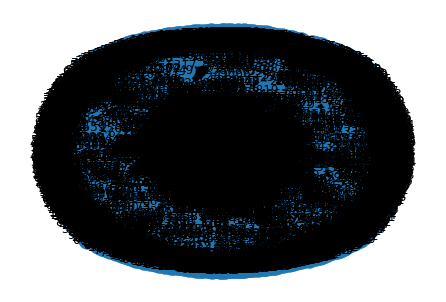

In [70]:
(g,), _ = dgl.load_graphs('graph.dgl')
import networkx as nx
import matplotlib.pyplot as plt
nx.draw(g1.to_networkx(), with_labels=True)

In [53]:
df1=df.query("DATE == '20160101'")
df1 = df1.reset_index(drop=True)
print(df1)



import torch as th
idx=th.zeros(len(df1)).type(th.long)
visit=np.zeros(len(df1))
print(type(idx))

g1 = dgl.DGLGraph()
g1.add_nodes(1)


# 使用一个列表来存储所有的特征名
features = ['CRS_DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'WHEELS_OFF', 'DEST', 'ORIGIN', 'O_LATITUDE', 'O_LONGITUDE',
            'D_LATITUDE', 'D_LONGITUDE', 'DISTANCE', 'O_TEMP', 'O_PRCP', 'O_WSPD', 'D_TEMP', 'D_PRCP', 'D_WSPD','MONTH','DAY_OF_WEEK',
            'CRS_ARR_TIME_HOUR','ORIGIN_LEVEL','DEST_LEVEL','CRS_DEP_TIME_HOUR']

# 使用一个循环来初始化图的节点特征
for f in features:
    g1.ndata[f] = th.ones(g1.num_nodes(), 1)

# 使用一个列表来存储所有的边特征名
edge_features = ['INTERVAL_TIME', 'AIRPORT', 'AIRCRAFT_NUM']

# 使用一个循环来初始化图的边特征
for f in edge_features:
    g1.edata[f] = th.ones(g1.num_edges(), 1)

# 使用for循环，让root从1到len(df1)遍历
for root in range(0, len(df1)):
    # 调用函数add_edges1，传入g1，root，0作为参数
    add_edges1(g1, root, 0)
    print(sum(visit))
    print(g1.num_nodes())
    
    

# 打印出访问过的节点数和图g1中的节点数
print(sum(visit))
print(g1.num_nodes())
    
# 将ARR_DELAY作为标签向量
g1.ndata['label'] = g1.ndata['ARR_DELAY']/60

# 将不同的属性沿着第二个维度（列）拼接起来，形成一个特征矩阵
g1.ndata['feat'] = torch.cat([g1.ndata['O_LATITUDE'], g1.ndata['O_LONGITUDE'], g1.ndata['D_LATITUDE'], g1.ndata['D_LONGITUDE'],
                               g1.ndata['DISTANCE'], g1.ndata['O_PRCP'], g1.ndata['O_WSPD'],g1.ndata['D_PRCP'],
                               g1.ndata['D_WSPD'] ,g1.ndata['DAY_OF_WEEK'],g1.ndata['MONTH'],g1.ndata['CRS_ARR_TIME_HOUR'],
                             g1.ndata['ORIGIN_LEVEL'],g1.ndata['DEST_LEVEL'],g1.ndata['CRS_DEP_TIME_HOUR']],
                              dim=1)

#g1.ndata['feat'] = torch.cat([g1.ndata['DEP_DELAY'],  g1.ndata['O_PRCP'], g1.ndata['O_WSPD'],g1.ndata['D_PRCP'],g1.ndata['D_WSPD'] ], dim=1)




# 将ARR_DELAY作为标签向量
g1.ndata['label'] = g1.ndata['ARR_DELAY']/60
print(g1.ndata['feat'])    
    
# 使用nan_to_num()函数，将NaN值替换为0
g1.ndata['feat'] = torch.nan_to_num(g1.ndata['feat'], nan=0)
    
dgl.save_graphs('graph12345.dgl', g1)    
    
    
    

       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            5                 22           6.0         6.0   
1          1            5                 23           6.0         4.0   
2          1            5                  6           6.0         6.0   
3          1            5                 22           6.0         6.0   
4          1            5                 12           4.0         6.0   
...      ...          ...                ...           ...         ...   
12483      1            5                 13           6.0         6.0   
12484      1            5                 15           6.0         4.0   
12485      1            5                 17           4.0         6.0   
12486      1            5                 23           6.0         5.0   
12487      1            5                 17           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP_DELAY  ARR_DELAY  O_TEMP  O_PRCP  O_WSPD  \
0                     20        0.0  

6295.0
6173
6296.0
6173
6296.0
6173
6296.0
6173
6297.0
6173
6297.0
6173
6300.0
6175
6301.0
6175
6301.0
6175
6302.0
6175
6303.0
6175
6303.0
6175
6304.0
6175
6308.0
6179
6308.0
6179
6336.0
6209
6337.0
6209
6337.0
6209
6337.0
6209
6337.0
6209
6337.0
6209
6339.0
6210
6339.0
6210
6339.0
6210
6339.0
6210
6339.0
6210
6339.0
6210
6339.0
6210
6339.0
6210
6340.0
6210
6340.0
6210
6341.0
6210
6341.0
6210
6342.0
6210
6343.0
6210
6344.0
6210
6345.0
6210
6345.0
6210
6346.0
6210
6346.0
6210
6346.0
6210
6347.0
6210
6347.0
6210
6348.0
6210
6348.0
6210
6348.0
6210
6349.0
6210
6350.0
6210
6350.0
6210
6351.0
6210
6430.0
6291
6430.0
6291
6430.0
6291
6431.0
6291
6431.0
6291
6442.0
6301
6443.0
6301
6443.0
6301
6443.0
6301
6444.0
6301
6448.0
6304
6448.0
6304
6448.0
6304
6449.0
6304
6450.0
6304
6450.0
6304
6450.0
6304
6450.0
6304
6450.0
6304
6450.0
6304
6451.0
6304
6451.0
6304
6451.0
6304
6451.0
6304
6452.0
6304
6452.0
6304
6453.0
6304
6454.0
6304
6454.0
6304
6462.0
6311
6463.0
6311
6463.0
6311
6463.0
6311
6463

7465.0
7090
7465.0
7090
7465.0
7090
7465.0
7090
7465.0
7090
7465.0
7090
7465.0
7090
7466.0
7090
7466.0
7090
7466.0
7090
7467.0
7090
7467.0
7090
7468.0
7090
7468.0
7090
7468.0
7090
7486.0
7108
7487.0
7108
7487.0
7108
7487.0
7108
7487.0
7108
7487.0
7108
7487.0
7108
7487.0
7108
7487.0
7108
7501.0
7121
7501.0
7121
7501.0
7121
7501.0
7121
7501.0
7121
7502.0
7121
7502.0
7121
7502.0
7121
7503.0
7121
7503.0
7121
7523.0
7142
7523.0
7142
7523.0
7142
7523.0
7142
7523.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7524.0
7142
7525.0
7142
7525.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7526.0
7142
7527.0
7142
7527.0
7142
7528.0
7142
7528.0
7142
7528.0
7142
7533.0
7146
7534.0
7146
7534.0
7146
7535.0
7146
7535.0
7146
7536.0
7146
7537.0
7146
7538.0
7147
7543.0
7152
7544.0
7152
7544.0
7152
7545.0
7152
7546.0
7152
7547.0
7152
7548.0
7152
7549

8300.0
7628
8309.0
7636
8309.0
7636
8309.0
7636
8309.0
7636
8311.0
7638
8311.0
7638
8312.0
7638
8312.0
7638
8313.0
7638
8314.0
7638
8315.0
7638
8315.0
7638
8316.0
7638
8317.0
7638
8318.0
7638
8319.0
7638
8319.0
7638
8320.0
7638
8321.0
7638
8321.0
7638
8321.0
7638
8322.0
7638
8322.0
7638
8323.0
7638
8323.0
7638
8323.0
7638
8324.0
7638
8324.0
7638
8324.0
7638
8325.0
7638
8326.0
7638
8326.0
7638
8327.0
7638
8328.0
7638
8328.0
7638
8328.0
7638
8328.0
7638
8329.0
7638
8329.0
7638
8330.0
7638
8331.0
7638
8331.0
7638
8332.0
7638
8333.0
7638
8333.0
7638
8334.0
7638
8335.0
7638
8335.0
7638
8336.0
7638
8337.0
7638
8337.0
7638
8338.0
7638
8338.0
7638
8339.0
7638
8340.0
7638
8340.0
7638
8340.0
7638
8340.0
7638
8340.0
7638
8345.0
7643
8346.0
7643
8347.0
7643
8347.0
7643
8347.0
7643
8348.0
7643
8348.0
7643
8348.0
7643
8348.0
7643
8349.0
7643
8350.0
7643
8351.0
7643
8351.0
7643
8352.0
7643
8353.0
7643
8354.0
7643
8354.0
7643
8354.0
7643
8355.0
7643
8355.0
7643
8356.0
7643
8356.0
7643
8357.0
7643
8358

8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8920.0
7996
8921.0
7996
8921.0
7996
8929.0
8006
8929.0
8006
8929.0
8006
8929.0
8006
8930.0
8006
8930.0
8006
8944.0
8019
8944.0
8019
8944.0
8019
8944.0
8019
8944.0
8019
8944.0
8019
8944.0
8019
8944.0
8019
8944.0
8019
8945.0
8019
8945.0
8019
8945.0
8019
8946.0
8019
8950.0
8022
8950.0
8022
8950.0
8022
8950.0
8022
8958.0
8029
8958.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8959.0
8029
8960.0
8029
8960.0
8029
8960.0
8029
8960.0
8029
8961.0
8029
8961.0
8029
8961.0
8029
8961.0
8029
8964.0
8031
8965.0
8031
8966.0
8031
8967.0
8031
8968.0
8031
8970.0
8033
8974.0
8037
8975.0
8037
8975.0
8037
8982.0
8043
8983.0
8043
8983.0
8043
8984.0
8043
8986.0
8044
8988.0
8045
8988.0
8045
8989.0
8045
8989.0
8045
8993.0
8048
8996.0
8050
8997.0
8050
8998.0
8050
8999.0
8050
9000.0
8050
9001.0
8050
9006.0
8055
9006

9315.0
8223
9315.0
8223
9315.0
8223
9315.0
8223
9315.0
8223
9315.0
8223
9319.0
8226
9319.0
8226
9319.0
8226
9319.0
8226
9319.0
8226
9319.0
8226
9319.0
8226
9321.0
8229
9321.0
8229
9321.0
8229
9321.0
8229
9321.0
8229
9321.0
8229
9321.0
8229
9321.0
8229
9321.0
8229
9328.0
8235
9328.0
8235
9329.0
8235
9330.0
8235
9331.0
8235
9332.0
8235
9333.0
8235
9334.0
8235
9335.0
8235
9336.0
8235
9337.0
8235
9338.0
8235
9345.0
8241
9346.0
8241
9346.0
8241
9346.0
8241
9346.0
8241
9346.0
8241
9346.0
8241
9346.0
8241
9346.0
8241
9347.0
8241
9347.0
8241
9347.0
8241
9348.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9349.0
8241
9350.0
8246
9350.0
8246
9351.0
8246
9352.0
8246
9352.0
8246
9352.0
8246
9352.0
8246
9352.0
8246
9353.0
8246
9353.0
8246
9353.0
8246
9354.0
8248
9354.0
8248
9354.0
8248
9354.0
8248
9354.0
8248
9355.0
8248
9355

9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9515.0
8306
9516.0
8306
9516.0
8306
9516.0
8306
9516.0
8306
9516.0
8306
9518.0
8308
9518.0
8308
9518.0
8308
9518.0
8308
9518.0
8308
9518.0
8308
9518.0
8308
9519.0
8308
9519.0
8308
9520.0
8308
9521.0
8308
9521.0
8308
9521.0
8308
9521.0
8308
9522.0
8308
9522.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9523.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9524.0
8308
9525.0
8308
9525.0
8308
9526.0
8308
9526.0
8308
9526.0
8308
9526.0
8308
9526.0
8308
9527.0
8308
9527.0
8308
9528.0
8308
9528.0
8308
9528.0
8308
9528.0
8308
9531.0
8310
9531.0
8310
9531.0
8310
9531.0
8310
9531.0
8310
9531.0
8310
9532.0
8310
9532.0
8310
9532.0
8310
9532.0
8310
9532.0
8310
9532.0
8310
9532.0
8310
9532

8361
9687.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9688.0
8361
9689.0
8362
9689.0
8362
9689.0
8362
9689.0
8362
9689.0
8362
9690.0
8362
9690.0
8362
9690.0
8362
9690.0
8362
9690.0
8362
9690.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9691.0
8362
9692.0
8362
9692.0
8362
9693.0
8362
9694.0
8362
9695.0
8362
9696.0
8362
9697.0
8362
9698.0
8362
9699.0
8362
9700.0
8362
9701.0
8362
9701.0
8362
9702.0
8362
9702.0
8362
9703.0
8362
9703.0
8362
9703.0
8362
9704.0
8362
9704.0
8362
9705.0
8362
9706.0
8362
9706.0
8362
9706.0
8362
9706.0
8362
9707.0
8362
9708.0
8362
9709.0
8362
9710.0
8362
9711.0
8362
9712.0
8362
9715.0
8365
9715.0
8365
9716.0
8365
9716.0
8365
9716.0
8365
9716.0
8365
9716.0
8365
9717.0
8365
9717.0
8365
9718.0
8365
9719.0
8365
9719.0
8365
9720.0
8365
9720.0
8365
9721.0
8365
9722.0
8365
9723.0
8365
9724.0
8365

10051.0
8505
10051.0
8505
10051.0
8505
10052.0
8506
10052.0
8506
10053.0
8506
10053.0
8506
10059.0
8513
10059.0
8513
10059.0
8513
10059.0
8513
10059.0
8513
10060.0
8513
10060.0
8513
10060.0
8513
10060.0
8513
10061.0
8513
10061.0
8513
10061.0
8513
10061.0
8513
10062.0
8513
10062.0
8513
10063.0
8513
10064.0
8513
10064.0
8513
10064.0
8513
10064.0
8513
10064.0
8513
10064.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10065.0
8513
10066.0
8513
10066.0
8513
10068.0
8514
10068.0
8514
10069.0
8514
10069.0
8514
10069.0
8514
10070.0
8514
10070.0
8514
10070.0
8514
10070.0
8514
10070.0
8514
10070.0
8514
10070.0
8514
10074.0
8517
10074.0
8517
10074.0
8517
10074.0
8517
10074.0
8517
10074.0
8517
10074.0
8517
10074.0
8517
10075.0
8517
10075.0
8517
10076.0
8517
10077.0
8517
10078.0
8517
10078.0
8517
10078.0
8517
10079.0
8517
10080.0
8517
10080.0
8517
10081.0
8517
10081.0
8517
10081.0
8517
10081.0
8517
10081.0
8517
10081.0
8517

10360.0
8621
10360.0
8621
10361.0
8621
10362.0
8621
10362.0
8621
10363.0
8621
10363.0
8621
10364.0
8621
10364.0
8621
10365.0
8621
10366.0
8621
10366.0
8621
10367.0
8621
10367.0
8621
10367.0
8621
10367.0
8621
10367.0
8621
10368.0
8621
10368.0
8621
10368.0
8621
10369.0
8621
10369.0
8621
10370.0
8621
10370.0
8621
10370.0
8621
10370.0
8621
10371.0
8621
10372.0
8621
10372.0
8621
10372.0
8621
10372.0
8621
10372.0
8621
10372.0
8621
10373.0
8621
10373.0
8621
10374.0
8621
10374.0
8621
10374.0
8621
10375.0
8621
10375.0
8621
10375.0
8621
10376.0
8621
10377.0
8621
10377.0
8621
10378.0
8621
10378.0
8621
10379.0
8621
10380.0
8621
10380.0
8621
10381.0
8621
10381.0
8621
10382.0
8621
10398.0
8636
10399.0
8636
10400.0
8636
10400.0
8636
10400.0
8636
10401.0
8636
10401.0
8636
10401.0
8636
10402.0
8636
10402.0
8636
10403.0
8636
10403.0
8636
10408.0
8640
10408.0
8640
10408.0
8640
10408.0
8640
10408.0
8640
10409.0
8641
10409.0
8641
10410.0
8641
10411.0
8641
10412.0
8641
10413.0
8641
10414.0
8641
10415.0
8641

10676.0
8709
10677.0
8709
10677.0
8709
10677.0
8709
10677.0
8709
10677.0
8709
10678.0
8709
10678.0
8709
10679.0
8709
10679.0
8709
10679.0
8709
10679.0
8709
10680.0
8709
10680.0
8709
10680.0
8709
10680.0
8709
10681.0
8709
10682.0
8709
10683.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10684.0
8709
10685.0
8709
10686.0
8709
10686.0
8709
10686.0
8709
10686.0
8709
10686.0
8709
10686.0
8709
10687.0
8709
10687.0
8709
10688.0
8709
10688.0
8709
10689.0
8709
10689.0
8709
10689.0
8709
10689.0
8709
10690.0
8709
10690.0
8709
10691.0
8709
10692.0
8709
10693.0
8709
10693.0
8709
10694.0
8709
10694.0
8709
10694.0
8709
10695.0
8709
10695.0
8709
10697.0
8710
10697.0
8710
10698.0
8710
10698.0
8710
10699.0
8710
10699.0
8710
10700.0
8710
10700.0
8710
10701.0
8710
10701.0
8710
10701.0
8710
10701.0
8710
10702.0
8710
10702.0
8710
10702.0
8710
10703.0
8710
10704.0
8710
10704.0
8710
10704.0
8710
10705.0
8710
10705.0
8710
10706.0
8710

10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10931.0
8757
10932.0
8757
10932.0
8757
10932.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10933.0
8757
10934.0
8757
10934.0
8757
10934.0
8757
10934.0
8757
10934.0
8757
10934.0
8757

11065.0
8775
11065.0
8775
11065.0
8775
11065.0
8775
11065.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11066.0
8775
11067.0
8775
11067.0
8775
11068.0
8775
11068.0
8775
11068.0
8775
11068.0
8775
11068.0
8775
11069.0
8775
11069.0
8775
11070.0
8775
11070.0
8775
11070.0
8775
11070.0
8775
11071.0
8775
11071.0
8775
11072.0
8775
11073.0
8775
11073.0
8775
11073.0
8775
11074.0
8775
11075.0
8775
11075.0
8775
11075.0
8775
11075.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775
11076.0
8775

11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11253.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11254.0
8850
11255.0
8850
11255.0
8850
11255.0
8850
11255.0
8850
11257.0
8851
11258.0
8851
11258.0
8851
11259.0
8851
11259.0
8851
11259.0
8851
11259.0
8851
11260.0
8851
11260.0
8851
11261.0
8851
11261.0
8851
11262.0
8851
11262.0
8851
11262.0
8851
11262.0
8851
11262.0
8851
11263.0
8851
11263.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11264.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11265.0
8851
11266.0
8851
11267.0
8851
11268.0
8851
11269.0
8851
11269.0
8851
11269.0
8851
11269.0
8851
11269.0
8851
11269.0
8851
11269.0
8851
11270.0
8851
11270.0
8851
11270.0
8851
11271.0
8851

11451.0
8895
11451.0
8895
11451.0
8895
11451.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11452.0
8895
11453.0
8895
11454.0
8895
11454.0
8895
11454.0
8895
11454.0
8895
11455.0
8895
11455.0
8895
11456.0
8895
11456.0
8895
11456.0
8895
11457.0
8895
11457.0
8895
11458.0
8895
11459.0
8895
11459.0
8895
11459.0
8895
11460.0
8895
11460.0
8895
11461.0
8895
11462.0
8895
11462.0
8895
11462.0
8895
11462.0
8895
11462.0
8895
11463.0
8895
11463.0
8895
11463.0
8895
11463.0
8895
11463.0
8895
11463.0
8895
11463.0
8895
11463.0
8895
11464.0
8895
11464.0
8895
11464.0
8895
11464.0
8895
11465.0
8895
11465.0
8895
11467.0
8897
11467.0
8897
11468.0
8897
11468.0
8897
11469.0
8897
11469.0
8897
11469.0
8897
11470.0
8897
11470.0
8897
11471.0
8897
11472.0
8897
11472.0
8897
11472.0
8897
11472.0
8897
11473.0
8897
11473.0
8897
11473.0
8897
11473.0
8897
11474.0
8897
11475.0
8897
11476.0
8897
11476.0
8897
11480.0
8900
11481.0
8900
11481.0
8900
11481.0
8900

11644.0
8935
11644.0
8935
11644.0
8935
11644.0
8935
11645.0
8935
11645.0
8935
11645.0
8935
11645.0
8935
11646.0
8937
11646.0
8937
11646.0
8937
11646.0
8937
11647.0
8937
11647.0
8937
11647.0
8937
11647.0
8937
11647.0
8937
11647.0
8937
11647.0
8937
11647.0
8937
11648.0
8937
11648.0
8937
11648.0
8937
11649.0
8937
11649.0
8937
11650.0
8937
11650.0
8937
11651.0
8937
11651.0
8937
11651.0
8937
11651.0
8937
11651.0
8937
11651.0
8937
11652.0
8937
11652.0
8937
11652.0
8937
11653.0
8937
11653.0
8937
11654.0
8937
11655.0
8937
11655.0
8937
11655.0
8937
11655.0
8937
11655.0
8937
11655.0
8937
11655.0
8937
11657.0
8938
11657.0
8938
11657.0
8938
11657.0
8938
11658.0
8938
11659.0
8938
11660.0
8938
11660.0
8938
11660.0
8938
11661.0
8938
11661.0
8938
11662.0
8938
11662.0
8938
11663.0
8938
11664.0
8938
11665.0
8938
11665.0
8938
11666.0
8938
11666.0
8938
11666.0
8938
11666.0
8938
11666.0
8938
11667.0
8938
11667.0
8938
11667.0
8938
11667.0
8938
11667.0
8938
11668.0
8938
11668.0
8938
11668.0
8938
11668.0
8938

11885.0
9015
11885.0
9015
11886.0
9015
11887.0
9015
11887.0
9015
11887.0
9015
11888.0
9015
11889.0
9015
11890.0
9015
11890.0
9015
11890.0
9015
11890.0
9015
11891.0
9015
11891.0
9015
11891.0
9015
11891.0
9015
11891.0
9015
11892.0
9015
11893.0
9015
11894.0
9015
11894.0
9015
11895.0
9015
11895.0
9015
11895.0
9015
11895.0
9015
11895.0
9015
11895.0
9015
11895.0
9015
11896.0
9016
11896.0
9016
11897.0
9016
11898.0
9016
11899.0
9016
11900.0
9016
11900.0
9016
11901.0
9016
11902.0
9016
11903.0
9016
11904.0
9016
11905.0
9016
11906.0
9016
11907.0
9016
11907.0
9016
11907.0
9016
11908.0
9016
11908.0
9016
11909.0
9016
11909.0
9016
11910.0
9016
11911.0
9016
11912.0
9016
11912.0
9016
11913.0
9016
11913.0
9016
11913.0
9016
11914.0
9016
11915.0
9016
11915.0
9016
11915.0
9016
11915.0
9016
11916.0
9016
11917.0
9016
11917.0
9016
11917.0
9016
11918.0
9016
11918.0
9016
11919.0
9016
11919.0
9016
11919.0
9016
11919.0
9016
11920.0
9016
11921.0
9016
11921.0
9016
11921.0
9016
11921.0
9016
11922.0
9016
11922.0
9016

12138.0
9121
12138.0
9121
12138.0
9121
12138.0
9121
12138.0
9121
12138.0
9121
12139.0
9121
12139.0
9121
12142.0
9124
12142.0
9124
12142.0
9124
12142.0
9124
12143.0
9124
12144.0
9124
12144.0
9124
12144.0
9124
12145.0
9124
12145.0
9124
12146.0
9124
12147.0
9124
12147.0
9124
12148.0
9125
12148.0
9125
12148.0
9125
12150.0
9127
12150.0
9127
12150.0
9127
12150.0
9127
12150.0
9127
12151.0
9127
12152.0
9129
12152.0
9129
12152.0
9129
12152.0
9129
12153.0
9129
12153.0
9129
12154.0
9129
12154.0
9129
12154.0
9129
12154.0
9129
12154.0
9129
12155.0
9129
12155.0
9129
12156.0
9129
12157.0
9130
12157.0
9130
12157.0
9130
12160.0
9137
12160.0
9137
12160.0
9137
12161.0
9138
12161.0
9138
12162.0
9138
12163.0
9138
12164.0
9138
12165.0
9138
12165.0
9138
12166.0
9138
12166.0
9138
12166.0
9138
12166.0
9138
12167.0
9138
12167.0
9138
12167.0
9138
12167.0
9138
12167.0
9138
12168.0
9138
12168.0
9138
12168.0
9138
12168.0
9138
12169.0
9139
12169.0
9139
12170.0
9139
12170.0
9139
12170.0
9139
12171.0
9141
12171.0
9141

12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12338.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12339.0
9194
12340.0
9194
12341.0
9194
12342.0
9194
12342.0
9194
12342.0
9194
12342.0
9194
12342.0
9194
12342.0
9194
12343.0
9194
12343.0
9194
12343.0
9194
12343.0
9194
12344.0
9194
12344.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12345.0
9194
12346.0
9194
12347.0
9194
12347.0
9194
12347.0
9194
12347.0
9194
12347.0
9194
12347.0
9194
12347.0
9194
12347.0
9194
12348.0
9194
12348.0
9194
12349.0
9194
12349.0
9194
12349.0
9194
12349.0
9194
12349.0
9194
12349.0
9194

12480.0
9210
12480.0
9210
12481.0
9210
12481.0
9210
12482.0
9210
12482.0
9210
12483.0
9210
12483.0
9210
12483.0
9210
12484.0
9210
12484.0
9210
12484.0
9210
12484.0
9210
12484.0
9210
12485.0
9210
12486.0
9210
12486.0
9210
12486.0
9210
12486.0
9210
12487.0
9210
12488.0
9210
12488.0
9210
12488.0
9210
tensor([[  44.8806,  -93.2169,   40.4915,  ...,    6.0000,    5.0000,
           20.0000],
        [  33.9425, -118.4081,   37.7213,  ...,    6.0000,    5.0000,
           22.0000],
        [  33.9425, -118.4081,   42.3643,  ...,    6.0000,    6.0000,
           22.0000],
        ...,
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000],
        [   0.0000,    0.0000,    0.0000,  ...,    0.0000,    0.0000,
            0.0000]])


In [18]:
import datetime
import dgl
import torch





# 定义一个函数，用于将给定日期的数据转换为图结构，并保存为文件
def create_and_save_graph(date):
    # 根据日期筛选数据
    global df1
    df1 = df.query(f"DATE == '{date}'")
    df1 = df1.reset_index(drop=True)
    print(df1)
    # 初始化一些变量
    global idx,visit
    idx = torch.zeros(len(df1)).type(torch.long)
    visit = np.zeros(len(df1))
    
    #print(idx)
    #print(visit)
    
    
    # 创建一个空的图对象
    g1 = dgl.DGLGraph()
    g1.add_nodes(1)
    
    # 使用一个列表来存储所有的特征名
    features = ['CRS_DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_DELAY', 'WHEELS_OFF', 'DEST', 'ORIGIN', 'O_LATITUDE', 'O_LONGITUDE',
                'D_LATITUDE', 'D_LONGITUDE', 'DISTANCE', 'O_TEMP', 'O_PRCP', 'O_WSPD', 'D_TEMP', 'D_PRCP', 'D_WSPD','MONTH','DAY_OF_WEEK',
                'CRS_ARR_TIME_HOUR','ORIGIN_LEVEL','DEST_LEVEL','CRS_DEP_TIME_HOUR']
    
    # 使用一个循环来初始化图的节点特征
    for f in features:
        g1.ndata[f] = torch.ones(g1.num_nodes(), 1)
    
    # 使用一个列表来存储所有的边特征名
    edge_features = ['INTERVAL_TIME', 'AIRPORT', 'AIRCRAFT_NUM']
    
    # 使用一个循环来初始化图的边特征
    for f in edge_features:
        g1.edata[f] = torch.ones(g1.num_edges(), 1)
    
    # 使用for循环，让root从1到len(df1)遍历
    for root in range(0, len(df1)-1):
        # 调用函数add_edges1，传入g1，root，0作为参数
        add_edges1(g1, root, 0)
        #print(sum(visit))
        #print(g1.num_nodes())
    print(f"访问节点数：{sum(visit)}")
    print(f"图节点数：{g1.num_nodes()}")
    
    
    # 将ARR_DELAY作为标签向量
    g1.ndata['label'] = g1.ndata['ARR_DELAY']/60
    
    # 将不同的属性沿着第二个维度（列）拼接起来，形成一个特征矩阵
    g1.ndata['feat'] = torch.cat([g1.ndata['O_LATITUDE'], g1.ndata['O_LONGITUDE'], g1.ndata['D_LATITUDE'], g1.ndata['D_LONGITUDE'],
                                  g1.ndata['DISTANCE'], g1.ndata['O_PRCP'], g1.ndata['O_WSPD'],g1.ndata['D_PRCP'],
                                  g1.ndata['D_WSPD'] ,g1.ndata['DAY_OF_WEEK'],g1.ndata['MONTH'],g1.ndata['CRS_ARR_TIME_HOUR'],
                                g1.ndata['ORIGIN_LEVEL'],g1.ndata['DEST_LEVEL'],g1.ndata['CRS_DEP_TIME_HOUR']],
                                 dim=1)
    
    # 使用nan_to_num()函数，将NaN值替换为0
    g1.ndata['feat'] = torch.nan_to_num(g1.ndata['feat'], nan=0)
    
    # 根据日期生成文件名
    file_name = f"graph{date}.dgl"
    
    # 保存图对象为文件
    dgl.save_graphs(file_name, g1)



In [19]:
import datetime
import time

# 2016年的开始日期和结束日期
start_date = datetime.date(2016, 1, 1)
end_date = datetime.date(2016, 12, 31)

delta = datetime.timedelta(days=1)

start_time = time.perf_counter()

# 使用while循环，对2016年的每一天运行一次create_and_save_graph函数，创建一个图网络
while start_date <= end_date:
    # 将日期转换为字符串格式
    date_str = start_date.strftime("%Y%m%d")
    loop_start = time.perf_counter()
    create_and_save_graph(date_str)
    loop_end = time.perf_counter()
    loop_time = loop_end - loop_start
    print(f"为{date_str}创建并保存图结构花费了{loop_time:.2f}秒。")
    loop_time_hms = time.strftime("%H:%M:%S", time.gmtime(loop_time))
    print(f"为{date_str}创建并保存图结构花费了{loop_time_hms}。")
    start_date += delta

end_time = time.perf_counter()
total_time = end_time - start_time
print(f"为2016年创建并保存图结构花费了{total_time:.2f}秒。")
total_time_hms = time.strftime("%H:%M:%S", time.gmtime(total_time))
print(f"为2016年创建并保存图结构花费了{total_time_hms}。")


       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            5                 22           6.0         6.0   
1          1            5                 23           6.0         4.0   
2          1            5                  6           6.0         6.0   
3          1            5                 22           6.0         6.0   
4          1            5                 12           4.0         6.0   
...      ...          ...                ...           ...         ...   
12483      1            5                 13           6.0         6.0   
12484      1            5                 15           6.0         4.0   
12485      1            5                 17           4.0         6.0   
12486      1            5                 23           6.0         5.0   
12487      1            5                 17           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP_DELAY  ARR_DELAY  O_TEMP  O_PRCP  O_WSPD  \
0                     20        0.0  

访问节点数：14474.0
图节点数：10794
为20160102创建并保存图结构花费了104.00秒。
为20160102创建并保存图结构花费了00:01:44。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            7                 23           6.0         6.0   
1          1            7                 21           6.0         6.0   
2          1            7                 20           6.0         6.0   
3          1            7                 19           6.0         6.0   
4          1            7                 15           5.0         6.0   
...      ...          ...                ...           ...         ...   
15454      1            7                 18           5.0         6.0   
15455      1            7                 11           6.0         6.0   
15456      1            7                 18           6.0         6.0   
15457      1            7                 11           4.0         6.0   
15458      1            7                 22           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15190.0
图节点数：11468
为20160104创建并保存图结构花费了114.43秒。
为20160104创建并保存图结构花费了00:01:54。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            2                 23           6.0         6.0   
1          1            2                 12           6.0         6.0   
2          1            2                 21           6.0         6.0   
3          1            2                 19           6.0         6.0   
4          1            2                 16           5.0         6.0   
...      ...          ...                ...           ...         ...   
14108      1            2                 14           4.0         6.0   
14109      1            2                 12           6.0         4.0   
14110      1            2                 18           6.0         4.0   
14111      1            2                 11           6.0         6.0   
14112      1            2                 13           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14194.0
图节点数：10564
为20160106创建并保存图结构花费了92.20秒。
为20160106创建并保存图结构花费了00:01:32。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            4                 11           6.0         6.0   
1          1            4                 11           6.0         6.0   
2          1            4                 21           6.0         5.0   
3          1            4                 20           6.0         6.0   
4          1            4                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
14811      1            4                 17           6.0         5.0   
14812      1            4                 20           5.0         6.0   
14813      1            4                 19           6.0         5.0   
14814      1            4                  8           5.0         6.0   
14815      1            4                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：14850.0
图节点数：11123
为20160108创建并保存图结构花费了87.62秒。
为20160108创建并保存图结构花费了00:01:27。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            6                 21           6.0         6.0   
1          1            6                  0           6.0         4.0   
2          1            6                  6           6.0         6.0   
3          1            6                  8           5.0         6.0   
4          1            6                 11           6.0         4.0   
...      ...          ...                ...           ...         ...   
11523      1            6                 21           5.0         6.0   
11524      1            6                 19           6.0         5.0   
11525      1            6                  7           4.0         6.0   
11526      1            6                  7           6.0         6.0   
11527      1            6                  9           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：13660.0
图节点数：10097
为20160110创建并保存图结构花费了93.00秒。
为20160110创建并保存图结构花费了00:01:32。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            1                 16           6.0         5.0   
1          1            1                 19           5.0         6.0   
2          1            1                 20           6.0         5.0   
3          1            1                 22           5.0         6.0   
4          1            1                 21           6.0         6.0   
...      ...          ...                ...           ...         ...   
14940      1            1                 23           6.0         6.0   
14941      1            1                 18           6.0         6.0   
14942      1            1                 23           6.0         5.0   
14943      1            1                 17           6.0         5.0   
14944      1            1                 21           6.0         5.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：14355.0
图节点数：10668
为20160112创建并保存图结构花费了84.13秒。
为20160112创建并保存图结构花费了00:01:24。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            3                 15           6.0         4.0   
1          1            3                 18           4.0         6.0   
2          1            3                 14           6.0         5.0   
3          1            3                 11           6.0         4.0   
4          1            3                 14           4.0         6.0   
...      ...          ...                ...           ...         ...   
14604      1            3                 14           6.0         6.0   
14605      1            3                 19           6.0         6.0   
14606      1            3                 22           6.0         6.0   
14607      1            3                 21           6.0         6.0   
14608      1            3                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：15083.0
图节点数：11365
为20160114创建并保存图结构花费了90.38秒。
为20160114创建并保存图结构花费了00:01:30。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            5                 15           6.0         6.0   
1          1            5                 18           6.0         6.0   
2          1            5                 15           6.0         6.0   
3          1            5                 21           6.0         5.0   
4          1            5                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15094      1            5                  7           3.0         6.0   
15095      1            5                  9           6.0         4.0   
15096      1            5                  8           4.0         6.0   
15097      1            5                 13           6.0         5.0   
15098      1            5                  0           6.0         3.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：11377.0
图节点数：7949
为20160116创建并保存图结构花费了64.24秒。
为20160116创建并保存图结构花费了00:01:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            7                 15           6.0         6.0   
1          1            7                 18           6.0         6.0   
2          1            7                 15           6.0         6.0   
3          1            7                 22           6.0         6.0   
4          1            7                 21           6.0         5.0   
...      ...          ...                ...           ...         ...   
12794      1            7                  7           3.0         6.0   
12795      1            7                 11           6.0         3.0   
12796      1            7                  9           6.0         4.0   
12797      1            7                  8           4.0         6.0   
12798      1            7                  0           6.0         3.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：14923.0
图节点数：11178
为20160118创建并保存图结构花费了98.61秒。
为20160118创建并保存图结构花费了00:01:38。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            2                 22           6.0         5.0   
1          1            2                  0           6.0         5.0   
2          1            2                 13           6.0         6.0   
3          1            2                 14           6.0         6.0   
4          1            2                 11           6.0         5.0   
...      ...          ...                ...           ...         ...   
14325      1            2                 17           6.0         6.0   
14326      1            2                  9           6.0         5.0   
14327      1            2                 20           5.0         6.0   
14328      1            2                 22           6.0         5.0   
14329      1            2                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：14592.0
图节点数：10871
为20160120创建并保存图结构花费了107.68秒。
为20160120创建并保存图结构花费了00:01:47。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            4                 10           6.0         5.0   
1          1            4                 13           5.0         6.0   
2          1            4                 13           6.0         5.0   
3          1            4                 17           5.0         6.0   
4          1            4                 18           6.0         5.0   
...      ...          ...                ...           ...         ...   
15044      1            4                 17           6.0         5.0   
15045      1            4                 20           5.0         6.0   
15046      1            4                 19           6.0         5.0   
15047      1            4                  8           5.0         6.0   
15048      1            4                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12921.0
图节点数：9478
为20160122创建并保存图结构花费了71.83秒。
为20160122创建并保存图结构花费了00:01:11。
      MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         1            6                 12           6.0         6.0   
1         1            6                 21           6.0         6.0   
2         1            6                 19           6.0         6.0   
3         1            6                 19           6.0         6.0   
4         1            6                 16           5.0         6.0   
...     ...          ...                ...           ...         ...   
8779      1            6                 21           6.0         5.0   
8780      1            6                 22           5.0         6.0   
8781      1            6                  9           5.0         4.0   
8782      1            6                 18           6.0         6.0   
8783      1            6                 21           6.0         5.0   

      CRS_DEP_TIME_HOUR  DEP_DELAY  ARR_D

访问节点数：11418.0
图节点数：8225
为20160124创建并保存图结构花费了71.46秒。
为20160124创建并保存图结构花费了00:01:11。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            1                 15           5.0         6.0   
1          1            1                 14           6.0         6.0   
2          1            1                  9           4.0         6.0   
3          1            1                 22           6.0         3.0   
4          1            1                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
14114      1            1                 20           6.0         5.0   
14115      1            1                 20           6.0         5.0   
14116      1            1                  0           6.0         6.0   
14117      1            1                 21           6.0         6.0   
14118      1            1                  0           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：14094.0
图节点数：10451
为20160126创建并保存图结构花费了100.13秒。
为20160126创建并保存图结构花费了00:01:40。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            3                 10           6.0         6.0   
1          1            3                 21           6.0         4.0   
2          1            3                 16           6.0         6.0   
3          1            3                 21           6.0         6.0   
4          1            3                 15           6.0         5.0   
...      ...          ...                ...           ...         ...   
14600      1            3                 17           6.0         5.0   
14601      1            3                 20           5.0         6.0   
14602      1            3                 19           6.0         5.0   
14603      1            3                  8           5.0         6.0   
14604      1            3                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15123.0
图节点数：11368
为20160128创建并保存图结构花费了114.40秒。
为20160128创建并保存图结构花费了00:01:54。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            5                 12           6.0         5.0   
1          1            5                 16           5.0         6.0   
2          1            5                 13           6.0         6.0   
3          1            5                 21           6.0         6.0   
4          1            5                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
15113      1            5                 17           6.0         5.0   
15114      1            5                 20           5.0         6.0   
15115      1            5                 19           6.0         5.0   
15116      1            5                  8           5.0         6.0   
15117      1            5                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：11565.0
图节点数：8106
为20160130创建并保存图结构花费了66.55秒。
为20160130创建并保存图结构花费了00:01:06。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          1            7                  9           6.0         6.0   
1          1            7                 15           6.0         4.0   
2          1            7                 19           4.0         6.0   
3          1            7                 23           6.0         6.0   
4          1            7                  6           6.0         6.0   
...      ...          ...                ...           ...         ...   
13603      1            7                  8           4.0         6.0   
13604      1            7                  9           5.0         6.0   
13605      1            7                 21           6.0         3.0   
13606      1            7                  0           6.0         6.0   
13607      1            7                  8           3.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：14535.0
图节点数：10815
为20160201创建并保存图结构花费了104.44秒。
为20160201创建并保存图结构花费了00:01:44。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            2                  7           3.0         6.0   
1          2            2                 13           6.0         3.0   
2          2            2                 18           5.0         6.0   
3          2            2                 23           6.0         3.0   
4          2            2                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
13885      2            2                  9           5.0         6.0   
13886      2            2                  8           3.0         6.0   
13887      2            2                 18           5.0         6.0   
13888      2            2                 20           6.0         6.0   
13889      2            2                 10           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14475.0
图节点数：10819
为20160203创建并保存图结构花费了102.39秒。
为20160203创建并保存图结构花费了00:01:42。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            4                 18           3.0         6.0   
1          2            4                  7           3.0         6.0   
2          2            4                 13           6.0         3.0   
3          2            4                 18           5.0         6.0   
4          2            4                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
15119      2            4                 19           6.0         4.0   
15120      2            4                  7           3.0         6.0   
15121      2            4                  7           3.0         6.0   
15122      2            4                  8           3.0         6.0   
15123      2            4                 13           6.0         3.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14832.0
图节点数：11019
为20160205创建并保存图结构花费了107.17秒。
为20160205创建并保存图结构花费了00:01:47。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            6                  7           3.0         6.0   
1          2            6                 13           6.0         3.0   
2          2            6                 18           5.0         6.0   
3          2            6                 21           6.0         3.0   
4          2            6                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
11479      2            6                 18           6.0         5.0   
11480      2            6                 21           5.0         6.0   
11481      2            6                 19           6.0         5.0   
11482      2            6                  7           4.0         6.0   
11483      2            6                  9           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12294.0
图节点数：8873
为20160207创建并保存图结构花费了68.66秒。
为20160207创建并保存图结构花费了00:01:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            1                  7           3.0         6.0   
1          2            1                 13           6.0         3.0   
2          2            1                 18           5.0         6.0   
3          2            1                 23           6.0         3.0   
4          2            1                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
14646      2            1                  7           3.0         6.0   
14647      2            1                  7           3.0         6.0   
14648      2            1                  8           3.0         6.0   
14649      2            1                 13           6.0         3.0   
14650      2            1                 18           3.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：14300.0
图节点数：10612
为20160209创建并保存图结构花费了100.97秒。
为20160209创建并保存图结构花费了00:01:40。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            3                 18           3.0         6.0   
1          2            3                  7           3.0         6.0   
2          2            3                 13           6.0         3.0   
3          2            3                 18           5.0         6.0   
4          2            3                 23           6.0         5.0   
...      ...          ...                ...           ...         ...   
14715      2            3                 21           5.0         6.0   
14716      2            3                 16           4.0         6.0   
14717      2            3                 14           6.0         4.0   
14718      2            3                 20           6.0         6.0   
14719      2            3                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15336.0
图节点数：11415
为20160211创建并保存图结构花费了114.74秒。
为20160211创建并保存图结构花费了00:01:54。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            5                 18           6.0         3.0   
1          2            5                  9           4.0         6.0   
2          2            5                 18           4.0         6.0   
3          2            5                 16           6.0         6.0   
4          2            5                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
15411      2            5                 11           6.0         6.0   
15412      2            5                  7           4.0         6.0   
15413      2            5                 13           4.0         6.0   
15414      2            5                 13           6.0         3.0   
15415      2            5                 18           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：11888.0
图节点数：8421
为20160213创建并保存图结构花费了69.61秒。
为20160213创建并保存图结构花费了00:01:09。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            7                  9           4.0         6.0   
1          2            7                 18           4.0         6.0   
2          2            7                 16           6.0         6.0   
3          2            7                 22           6.0         6.0   
4          2            7                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
13145      2            7                 14           6.0         5.0   
13146      2            7                 18           5.0         6.0   
13147      2            7                 23           6.0         4.0   
13148      2            7                  0           6.0         5.0   
13149      2            7                 13           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：14422.0
图节点数：10572
为20160215创建并保存图结构花费了103.23秒。
为20160215创建并保存图结构花费了00:01:43。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            2                 18           6.0         3.0   
1          2            2                  9           4.0         6.0   
2          2            2                 18           4.0         6.0   
3          2            2                 16           6.0         6.0   
4          2            2                  7           6.0         6.0   
...      ...          ...                ...           ...         ...   
14729      2            2                 11           6.0         6.0   
14730      2            2                  7           4.0         6.0   
14731      2            2                 13           4.0         6.0   
14732      2            2                 13           6.0         3.0   
14733      2            2                 18           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15024.0
图节点数：11189
为20160217创建并保存图结构花费了110.68秒。
为20160217创建并保存图结构花费了00:01:50。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            4                 18           6.0         3.0   
1          2            4                  9           4.0         6.0   
2          2            4                 18           4.0         6.0   
3          2            4                 16           6.0         6.0   
4          2            4                  7           6.0         6.0   
...      ...          ...                ...           ...         ...   
15330      2            4                 21           6.0         6.0   
15331      2            4                 19           6.0         6.0   
15332      2            4                 14           6.0         5.0   
15333      2            4                 19           6.0         5.0   
15334      2            4                 17           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15259.0
图节点数：11307
为20160219创建并保存图结构花费了112.93秒。
为20160219创建并保存图结构花费了00:01:52。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            6                 18           6.0         3.0   
1          2            6                  9           4.0         6.0   
2          2            6                 18           4.0         6.0   
3          2            6                 16           6.0         6.0   
4          2            6                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
12137      2            6                 11           6.0         6.0   
12138      2            6                  7           4.0         6.0   
12139      2            6                 13           4.0         6.0   
12140      2            6                 12           6.0         3.0   
12141      2            6                 18           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14274.0
图节点数：10552
为20160221创建并保存图结构花费了100.87秒。
为20160221创建并保存图结构花费了00:01:40。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            1                 18           6.0         3.0   
1          2            1                  9           4.0         6.0   
2          2            1                 18           4.0         6.0   
3          2            1                 14           6.0         6.0   
4          2            1                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
15397      2            1                 16           5.0         6.0   
15398      2            1                 19           6.0         6.0   
15399      2            1                 21           6.0         6.0   
15400      2            1                 19           5.0         6.0   
15401      2            1                 17           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14917.0
图节点数：11069
为20160223创建并保存图结构花费了108.10秒。
为20160223创建并保存图结构花费了00:01:48。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            3                  9           4.0         6.0   
1          2            3                 18           4.0         6.0   
2          2            3                 16           6.0         6.0   
3          2            3                  7           6.0         6.0   
4          2            3                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
13718      2            3                 19           6.0         4.0   
13719      2            3                 11           6.0         6.0   
13720      2            3                  7           4.0         6.0   
13721      2            3                 13           6.0         3.0   
13722      2            3                 18           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15226.0
图节点数：11385
为20160225创建并保存图结构花费了111.71秒。
为20160225创建并保存图结构花费了00:01:51。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            5                 18           6.0         3.0   
1          2            5                  9           4.0         6.0   
2          2            5                 18           4.0         6.0   
3          2            5                 16           6.0         6.0   
4          2            5                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
15414      2            5                  7           6.0         5.0   
15415      2            5                 19           6.0         5.0   
15416      2            5                  8           5.0         6.0   
15417      2            5                  7           4.0         6.0   
15418      2            5                  9           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12109.0
图节点数：8609
为20160227创建并保存图结构花费了72.72秒。
为20160227创建并保存图结构花费了00:01:12。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          2            7                 18           6.0         3.0   
1          2            7                  9           4.0         6.0   
2          2            7                 18           4.0         6.0   
3          2            7                 16           6.0         6.0   
4          2            7                  7           6.0         6.0   
...      ...          ...                ...           ...         ...   
14298      2            7                 11           6.0         6.0   
14299      2            7                  7           4.0         6.0   
14300      2            7                 13           4.0         6.0   
14301      2            7                 12           6.0         3.0   
14302      2            7                 10           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15372.0
图节点数：11490
为20160229创建并保存图结构花费了115.05秒。
为20160229创建并保存图结构花费了00:01:55。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            2                 18           6.0         6.0   
1          3            2                 15           6.0         4.0   
2          3            2                 18           6.0         6.0   
3          3            2                 17           6.0         5.0   
4          3            2                 18           6.0         6.0   
...      ...          ...                ...           ...         ...   
14587      3            2                 21           6.0         6.0   
14588      3            2                 15           6.0         6.0   
14589      3            2                 18           6.0         6.0   
14590      3            2                  0           5.0         6.0   
14591      3            2                 14           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15241.0
图节点数：11419
为20160302创建并保存图结构花费了113.32秒。
为20160302创建并保存图结构花费了00:01:53。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            4                 16           6.0         6.0   
1          3            4                  7           6.0         6.0   
2          3            4                 22           6.0         6.0   
3          3            4                 11           6.0         6.0   
4          3            4                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
15662      3            4                 18           6.0         6.0   
15663      3            4                  6           6.0         6.0   
15664      3            4                  9           6.0         6.0   
15665      3            4                  9           6.0         6.0   
15666      3            4                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15640.0
图节点数：11642
为20160304创建并保存图结构花费了120.02秒。
为20160304创建并保存图结构花费了00:02:00。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            6                 16           6.0         6.0   
1          3            6                 11           6.0         6.0   
2          3            6                 16           6.0         6.0   
3          3            6                 23           6.0         6.0   
4          3            6                 12           6.0         6.0   
...      ...          ...                ...           ...         ...   
12929      3            6                 20           6.0         6.0   
12930      3            6                 22           6.0         6.0   
12931      3            6                  7           5.0         6.0   
12932      3            6                 15           6.0         6.0   
12933      3            6                 19           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14691.0
图节点数：10869
为20160306创建并保存图结构花费了107.64秒。
为20160306创建并保存图结构花费了00:01:47。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            1                 16           6.0         6.0   
1          3            1                 19           6.0         6.0   
2          3            1                 22           6.0         6.0   
3          3            1                 11           6.0         6.0   
4          3            1                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
15634      3            1                 22           6.0         6.0   
15635      3            1                  8           6.0         6.0   
15636      3            1                 15           6.0         6.0   
15637      3            1                 19           6.0         6.0   
15638      3            1                 12           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14979.0
图节点数：11140
为20160308创建并保存图结构花费了91.09秒。
为20160308创建并保存图结构花费了00:01:31。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            3                 16           6.0         6.0   
1          3            3                  7           6.0         6.0   
2          3            3                 22           6.0         6.0   
3          3            3                 11           6.0         6.0   
4          3            3                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
15129      3            3                 21           6.0         6.0   
15130      3            3                 22           6.0         6.0   
15131      3            3                  8           6.0         6.0   
15132      3            3                 19           6.0         6.0   
15133      3            3                 12           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：15803.0
图节点数：11891
为20160310创建并保存图结构花费了121.11秒。
为20160310创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            5                 12           6.0         6.0   
1          3            5                 10           6.0         6.0   
2          3            5                 12           6.0         6.0   
3          3            5                 14           6.0         6.0   
4          3            5                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15846      3            5                 12           6.0         6.0   
15847      3            5                 10           6.0         6.0   
15848      3            5                 17           6.0         5.0   
15849      3            5                 12           6.0         6.0   
15850      3            5                  9           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13417.0
图节点数：9781
为20160312创建并保存图结构花费了76.66秒。
为20160312创建并保存图结构花费了00:01:16。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            7                 16           6.0         6.0   
1          3            7                  7           6.0         6.0   
2          3            7                 23           6.0         6.0   
3          3            7                 11           6.0         6.0   
4          3            7                  1           6.0         5.0   
...      ...          ...                ...           ...         ...   
15092      3            7                 13           6.0         6.0   
15093      3            7                 10           5.0         6.0   
15094      3            7                 11           6.0         6.0   
15095      3            7                  8           6.0         6.0   
15096      3            7                 14           4.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15776.0
图节点数：11896
为20160314创建并保存图结构花费了123.88秒。
为20160314创建并保存图结构花费了00:02:03。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            2                 13           6.0         6.0   
1          3            2                 17           6.0         6.0   
2          3            2                 16           6.0         6.0   
3          3            2                 15           6.0         6.0   
4          3            2                 10           4.0         6.0   
...      ...          ...                ...           ...         ...   
15466      3            2                 12           6.0         6.0   
15467      3            2                 21           6.0         6.0   
15468      3            2                 10           6.0         6.0   
15469      3            2                 18           6.0         6.0   
15470      3            2                 23           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15621.0
图节点数：11813
为20160316创建并保存图结构花费了104.04秒。
为20160316创建并保存图结构花费了00:01:44。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            4                 13           6.0         6.0   
1          3            4                 17           6.0         6.0   
2          3            4                 16           6.0         6.0   
3          3            4                 21           6.0         6.0   
4          3            4                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15984      3            4                 18           5.0         5.0   
15985      3            4                 13           5.0         5.0   
15986      3            4                 19           5.0         5.0   
15987      3            4                 14           5.0         6.0   
15988      3            4                  0           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15973.0
图节点数：12021
为20160318创建并保存图结构花费了124.92秒。
为20160318创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            6                 13           6.0         6.0   
1          3            6                 17           6.0         6.0   
2          3            6                 16           6.0         6.0   
3          3            6                 21           6.0         6.0   
4          3            6                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
13428      3            6                  8           4.0         6.0   
13429      3            6                 20           4.0         6.0   
13430      3            6                 12           4.0         6.0   
13431      3            6                  9           4.0         6.0   
13432      3            6                 13           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15330.0
图节点数：11518
为20160320创建并保存图结构花费了94.15秒。
为20160320创建并保存图结构花费了00:01:34。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            1                 13           6.0         6.0   
1          3            1                 17           6.0         6.0   
2          3            1                 16           6.0         6.0   
3          3            1                 21           6.0         6.0   
4          3            1                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15843      3            1                 20           4.0         6.0   
15844      3            1                 12           4.0         6.0   
15845      3            1                 20           4.0         6.0   
15846      3            1                 13           4.0         6.0   
15847      3            1                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：15455.0
图节点数：11629
为20160322创建并保存图结构花费了116.87秒。
为20160322创建并保存图结构花费了00:01:56。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            3                 13           6.0         6.0   
1          3            3                 17           6.0         6.0   
2          3            3                 16           6.0         6.0   
3          3            3                 21           6.0         6.0   
4          3            3                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
14297      3            3                 20           4.0         6.0   
14298      3            3                 12           4.0         6.0   
14299      3            3                 20           4.0         6.0   
14300      3            3                 13           4.0         6.0   
14301      3            3                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15579.0
图节点数：11761
为20160324创建并保存图结构花费了116.50秒。
为20160324创建并保存图结构花费了00:01:56。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            5                 13           6.0         6.0   
1          3            5                 16           6.0         6.0   
2          3            5                 21           6.0         6.0   
3          3            5                 15           6.0         6.0   
4          3            5                 10           4.0         6.0   
...      ...          ...                ...           ...         ...   
15850      3            5                 13           5.0         6.0   
15851      3            5                 21           5.0         6.0   
15852      3            5                 17           5.0         6.0   
15853      3            5                 23           5.0         4.0   
15854      3            5                 15           5.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13379.0
图节点数：9807
为20160326创建并保存图结构花费了90.85秒。
为20160326创建并保存图结构花费了00:01:30。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            7                 13           6.0         6.0   
1          3            7                 17           6.0         6.0   
2          3            7                 16           6.0         6.0   
3          3            7                 21           6.0         6.0   
4          3            7                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15150      3            7                 20           4.0         6.0   
15151      3            7                 12           4.0         6.0   
15152      3            7                 20           4.0         6.0   
15153      3            7                 13           4.0         6.0   
15154      3            7                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15867.0
图节点数：11994
为20160328创建并保存图结构花费了121.33秒。
为20160328创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            2                 13           6.0         6.0   
1          3            2                 17           6.0         6.0   
2          3            2                 16           6.0         6.0   
3          3            2                 15           6.0         6.0   
4          3            2                 10           4.0         6.0   
...      ...          ...                ...           ...         ...   
15418      3            2                 19           5.0         6.0   
15419      3            2                 16           5.0         4.0   
15420      3            2                 12           5.0         5.0   
15421      3            2                  0           5.0         5.0   
15422      3            2                 12           5.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15504.0
图节点数：11665
为20160330创建并保存图结构花费了111.09秒。
为20160330创建并保存图结构花费了00:01:51。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          3            4                 23           6.0         5.0   
1          3            4                 10           5.0         6.0   
2          3            4                  6           6.0         5.0   
3          3            4                 11           5.0         6.0   
4          3            4                 10           6.0         5.0   
...      ...          ...                ...           ...         ...   
15832      3            4                 22           6.0         3.0   
15833      3            4                 10           6.0         4.0   
15834      3            4                 19           6.0         4.0   
15835      3            4                 21           4.0         6.0   
15836      3            4                  8           3.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15817.0
图节点数：11922
为20160401创建并保存图结构花费了121.61秒。
为20160401创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            6                  8           3.0         6.0   
1          4            6                 14           4.0         6.0   
2          4            6                 12           6.0         4.0   
3          4            6                  8           3.0         6.0   
4          4            6                 11           6.0         5.0   
...      ...          ...                ...           ...         ...   
13117      4            6                  6           6.0         6.0   
13118      4            6                 12           6.0         6.0   
13119      4            6                  7           6.0         6.0   
13120      4            6                 21           6.0         6.0   
13121      4            6                 16           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15091.0
图节点数：11295
为20160403创建并保存图结构花费了113.36秒。
为20160403创建并保存图结构花费了00:01:53。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            1                 12           3.0         6.0   
1          4            1                 11           6.0         3.0   
2          4            1                  8           3.0         6.0   
3          4            1                  8           3.0         6.0   
4          4            1                 21           5.0         6.0   
...      ...          ...                ...           ...         ...   
15801      4            1                 10           5.0         6.0   
15802      4            1                 16           6.0         6.0   
15803      4            1                 10           5.0         6.0   
15804      4            1                 14           4.0         6.0   
15805      4            1                  1           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15584.0
图节点数：11698
为20160405创建并保存图结构花费了103.60秒。
为20160405创建并保存图结构花费了00:01:43。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            3                 11           6.0         3.0   
1          4            3                  8           3.0         6.0   
2          4            3                  8           3.0         6.0   
3          4            3                 21           5.0         6.0   
4          4            3                 19           6.0         5.0   
...      ...          ...                ...           ...         ...   
15678      4            3                 17           6.0         6.0   
15679      4            3                 12           6.0         6.0   
15680      4            3                  7           6.0         6.0   
15681      4            3                 21           6.0         6.0   
15682      4            3                 16           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15879.0
图节点数：12020
为20160407创建并保存图结构花费了124.07秒。
为20160407创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            5                 11           6.0         3.0   
1          4            5                  8           3.0         6.0   
2          4            5                  8           3.0         6.0   
3          4            5                 21           6.0         6.0   
4          4            5                 17           6.0         3.0   
...      ...          ...                ...           ...         ...   
15977      4            5                  8           6.0         5.0   
15978      4            5                 23           6.0         5.0   
15979      4            5                 23           6.0         6.0   
15980      4            5                  0           6.0         6.0   
15981      4            5                 16           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13024.0
图节点数：9383
为20160409创建并保存图结构花费了86.75秒。
为20160409创建并保存图结构花费了00:01:26。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            7                 12           3.0         6.0   
1          4            7                 11           6.0         3.0   
2          4            7                  8           3.0         6.0   
3          4            7                 19           6.0         5.0   
4          4            7                 21           6.0         6.0   
...      ...          ...                ...           ...         ...   
15144      4            7                 17           6.0         6.0   
15145      4            7                 12           6.0         6.0   
15146      4            7                  7           6.0         6.0   
15147      4            7                 21           6.0         6.0   
15148      4            7                 16           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15955.0
图节点数：12083
为20160411创建并保存图结构花费了125.44秒。
为20160411创建并保存图结构花费了00:02:05。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            2                 11           6.0         3.0   
1          4            2                  8           3.0         6.0   
2          4            2                  8           3.0         6.0   
3          4            2                 19           6.0         5.0   
4          4            2                 21           6.0         6.0   
...      ...          ...                ...           ...         ...   
15474      4            2                 19           6.0         6.0   
15475      4            2                 19           6.0         6.0   
15476      4            2                 22           6.0         6.0   
15477      4            2                 21           6.0         6.0   
15478      4            2                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15682.0
图节点数：11889
为20160413创建并保存图结构花费了121.90秒。
为20160413创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            4                 12           3.0         6.0   
1          4            4                 11           6.0         3.0   
2          4            4                  8           3.0         6.0   
3          4            4                  8           3.0         6.0   
4          4            4                 19           6.0         5.0   
...      ...          ...                ...           ...         ...   
15978      4            4                  6           6.0         6.0   
15979      4            4                 12           6.0         6.0   
15980      4            4                  7           6.0         6.0   
15981      4            4                 21           6.0         6.0   
15982      4            4                 16           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15970.0
图节点数：12092
为20160415创建并保存图结构花费了125.71秒。
为20160415创建并保存图结构花费了00:02:05。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            6                 18           6.0         6.0   
1          4            6                 16           6.0         6.0   
2          4            6                 12           6.0         6.0   
3          4            6                 21           6.0         6.0   
4          4            6                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
11958      4            6                 16           6.0         6.0   
11959      4            6                 20           6.0         6.0   
11960      4            6                 10           6.0         6.0   
11961      4            6                 15           6.0         6.0   
11962      4            6                 22           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14637.0
图节点数：11007
为20160417创建并保存图结构花费了106.29秒。
为20160417创建并保存图结构花费了00:01:46。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            1                 16           6.0         6.0   
1          4            1                  8           6.0         6.0   
2          4            1                 14           6.0         6.0   
3          4            1                 23           6.0         6.0   
4          4            1                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15167      4            1                 13           6.0         6.0   
15168      4            1                  6           6.0         6.0   
15169      4            1                 12           6.0         6.0   
15170      4            1                  7           6.0         6.0   
15171      4            1                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15542.0
图节点数：11701
为20160419创建并保存图结构花费了107.44秒。
为20160419创建并保存图结构花费了00:01:47。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            3                 11           6.0         3.0   
1          4            3                  8           3.0         6.0   
2          4            3                  8           3.0         6.0   
3          4            3                 21           6.0         6.0   
4          4            3                 17           6.0         3.0   
...      ...          ...                ...           ...         ...   
15701      4            3                 19           6.0         6.0   
15702      4            3                 19           6.0         6.0   
15703      4            3                 22           6.0         6.0   
15704      4            3                 21           6.0         6.0   
15705      4            3                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15984.0
图节点数：12143
为20160421创建并保存图结构花费了124.42秒。
为20160421创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            5                 12           3.0         6.0   
1          4            5                 11           6.0         3.0   
2          4            5                  8           3.0         6.0   
3          4            5                  8           3.0         6.0   
4          4            5                 21           6.0         6.0   
...      ...          ...                ...           ...         ...   
16022      4            5                 22           6.0         6.0   
16023      4            5                 17           6.0         6.0   
16024      4            5                 12           6.0         6.0   
16025      4            5                  7           6.0         6.0   
16026      4            5                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12692.0
图节点数：9026
为20160423创建并保存图结构花费了83.83秒。
为20160423创建并保存图结构花费了00:01:23。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            7                 11           6.0         3.0   
1          4            7                  8           3.0         6.0   
2          4            7                 21           6.0         5.0   
3          4            7                 19           6.0         5.0   
4          4            7                 21           6.0         6.0   
...      ...          ...                ...           ...         ...   
15073      4            7                 20           6.0         6.0   
15074      4            7                 19           6.0         6.0   
15075      4            7                 22           6.0         6.0   
15076      4            7                 22           6.0         6.0   
15077      4            7                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15948.0
图节点数：12073
为20160425创建并保存图结构花费了109.32秒。
为20160425创建并保存图结构花费了00:01:49。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            2                 12           3.0         6.0   
1          4            2                 11           6.0         3.0   
2          4            2                  8           3.0         6.0   
3          4            2                  8           3.0         6.0   
4          4            2                 19           6.0         5.0   
...      ...          ...                ...           ...         ...   
15464      4            2                 13           6.0         6.0   
15465      4            2                  6           6.0         6.0   
15466      4            2                 12           6.0         6.0   
15467      4            2                  7           6.0         6.0   
15468      4            2                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15616.0
图节点数：11768
为20160427创建并保存图结构花费了100.03秒。
为20160427创建并保存图结构花费了00:01:40。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            4                 21           6.0         5.0   
1          4            4                 19           6.0         6.0   
2          4            4                 22           6.0         6.0   
3          4            4                 14           6.0         6.0   
4          4            4                 17           6.0         6.0   
...      ...          ...                ...           ...         ...   
15957      4            4                 14           3.0         6.0   
15958      4            4                 13           6.0         3.0   
15959      4            4                  7           3.0         6.0   
15960      4            4                 17           3.0         6.0   
15961      4            4                 14           6.0         3.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15595.0
图节点数：11752
为20160429创建并保存图结构花费了98.55秒。
为20160429创建并保存图结构花费了00:01:38。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          4            6                 11           6.0         5.0   
1          4            6                  8           3.0         6.0   
2          4            6                 11           3.0         6.0   
3          4            6                 17           5.0         6.0   
4          4            6                 14           6.0         5.0   
...      ...          ...                ...           ...         ...   
12545      4            6                 12           6.0         6.0   
12546      4            6                  8           5.0         6.0   
12547      4            6                 20           6.0         3.0   
12548      4            6                 19           6.0         6.0   
12549      4            6                 15           5.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：15044.0
图节点数：11368
为20160501创建并保存图结构花费了113.13秒。
为20160501创建并保存图结构花费了00:01:53。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            1                 16           6.0         6.0   
1          5            1                  8           6.0         6.0   
2          5            1                 14           6.0         6.0   
3          5            1                 23           6.0         6.0   
4          5            1                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15825      5            1                 13           6.0         6.0   
15826      5            1                 13           6.0         6.0   
15827      5            1                 10           6.0         6.0   
15828      5            1                 21           6.0         6.0   
15829      5            1                 23           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15591.0
图节点数：11761
为20160503创建并保存图结构花费了118.71秒。
为20160503创建并保存图结构花费了00:01:58。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            3                 19           6.0         6.0   
1          5            3                 19           6.0         5.0   
2          5            3                 23           6.0         4.0   
3          5            3                 19           4.0         6.0   
4          5            3                 14           6.0         4.0   
...      ...          ...                ...           ...         ...   
15600      5            3                 19           6.0         6.0   
15601      5            3                 18           5.0         6.0   
15602      5            3                 12           6.0         5.0   
15603      5            3                 20           5.0         6.0   
15604      5            3                 23           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16018.0
图节点数：12175
为20160505创建并保存图结构花费了106.69秒。
为20160505创建并保存图结构花费了00:01:46。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            5                 15           6.0         3.0   
1          5            5                 19           6.0         5.0   
2          5            5                 22           6.0         4.0   
3          5            5                 13           6.0         4.0   
4          5            5                 23           6.0         6.0   
...      ...          ...                ...           ...         ...   
15980      5            5                 11           6.0         6.0   
15981      5            5                 15           6.0         6.0   
15982      5            5                  1           6.0         6.0   
15983      5            5                 23           6.0         6.0   
15984      5            5                 14           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12513.0
图节点数：8970
为20160507创建并保存图结构花费了80.46秒。
为20160507创建并保存图结构花费了00:01:20。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            7                 16           6.0         3.0   
1          5            7                 19           6.0         5.0   
2          5            7                 22           6.0         4.0   
3          5            7                 13           6.0         4.0   
4          5            7                 23           6.0         6.0   
...      ...          ...                ...           ...         ...   
14885      5            7                 15           6.0         6.0   
14886      5            7                 10           6.0         6.0   
14887      5            7                 21           6.0         3.0   
14888      5            7                  8           6.0         6.0   
14889      5            7                 12           6.0         5.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：16033.0
图节点数：12180
为20160509创建并保存图结构花费了121.15秒。
为20160509创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            2                 11           6.0         6.0   
1          5            2                 22           5.0         6.0   
2          5            2                 12           5.0         6.0   
3          5            2                 22           6.0         5.0   
4          5            2                 10           5.0         5.0   
...      ...          ...                ...           ...         ...   
15758      5            2                 21           6.0         6.0   
15759      5            2                 13           6.0         6.0   
15760      5            2                  8           6.0         6.0   
15761      5            2                  8           6.0         5.0   
15762      5            2                 19           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15762.0
图节点数：11954
为20160511创建并保存图结构花费了124.73秒。
为20160511创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            4                 11           6.0         6.0   
1          5            4                 22           5.0         6.0   
2          5            4                 12           5.0         6.0   
3          5            4                 22           6.0         5.0   
4          5            4                 10           5.0         5.0   
...      ...          ...                ...           ...         ...   
16082      5            4                 18           5.0         5.0   
16083      5            4                 23           5.0         5.0   
16084      5            4                 14           5.0         5.0   
16085      5            4                 13           5.0         5.0   
16086      5            4                 21           5.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16138.0
图节点数：12265
为20160513创建并保存图结构花费了131.27秒。
为20160513创建并保存图结构花费了00:02:11。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            6                 11           6.0         6.0   
1          5            6                 15           6.0         6.0   
2          5            6                 19           6.0         6.0   
3          5            6                 23           6.0         6.0   
4          5            6                  6           6.0         6.0   
...      ...          ...                ...           ...         ...   
12716      5            6                 15           6.0         6.0   
12717      5            6                 14           4.0         6.0   
12718      5            6                 19           6.0         6.0   
12719      5            6                 20           6.0         6.0   
12720      5            6                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15195.0
图节点数：11512
为20160515创建并保存图结构花费了118.42秒。
为20160515创建并保存图结构花费了00:01:58。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            1                 11           6.0         6.0   
1          5            1                  9           6.0         6.0   
2          5            1                 13           6.0         6.0   
3          5            1                 15           6.0         6.0   
4          5            1                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
16078      5            1                 13           5.0         5.0   
16079      5            1                 16           5.0         5.0   
16080      5            1                 19           5.0         5.0   
16081      5            1                 10           5.0         5.0   
16082      5            1                 18           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15826.0
图节点数：12026
为20160517创建并保存图结构花费了128.45秒。
为20160517创建并保存图结构花费了00:02:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            3                 11           6.0         6.0   
1          5            3                 22           5.0         6.0   
2          5            3                 12           5.0         6.0   
3          5            3                 22           6.0         5.0   
4          5            3                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15905      5            3                 19           6.0         6.0   
15906      5            3                  0           6.0         5.0   
15907      5            3                  7           5.0         6.0   
15908      5            3                 11           6.0         5.0   
15909      5            3                 14           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16034.0
图节点数：12206
为20160519创建并保存图结构花费了128.38秒。
为20160519创建并保存图结构花费了00:02:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            5                 21           6.0         6.0   
1          5            5                  0           6.0         6.0   
2          5            5                 20           6.0         6.0   
3          5            5                 23           6.0         6.0   
4          5            5                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16108      5            5                  8           5.0         6.0   
16109      5            5                 16           5.0         6.0   
16110      5            5                 14           6.0         5.0   
16111      5            5                 20           4.0         6.0   
16112      5            5                 17           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12784.0
图节点数：9227
为20160521创建并保存图结构花费了86.06秒。
为20160521创建并保存图结构花费了00:01:26。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            7                 16           6.0         6.0   
1          5            7                  8           6.0         6.0   
2          5            7                 14           6.0         6.0   
3          5            7                 23           6.0         6.0   
4          5            7                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15306      5            7                 19           6.0         6.0   
15307      5            7                 18           5.0         6.0   
15308      5            7                 12           6.0         5.0   
15309      5            7                 20           5.0         6.0   
15310      5            7                 23           6.0         5.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：16109.0
图节点数：12251
为20160523创建并保存图结构花费了119.68秒。
为20160523创建并保存图结构花费了00:01:59。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            2                 16           6.0         6.0   
1          5            2                  8           6.0         6.0   
2          5            2                 14           6.0         6.0   
3          5            2                 23           6.0         6.0   
4          5            2                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15886      5            2                  8           5.0         6.0   
15887      5            2                 16           5.0         6.0   
15888      5            2                 14           6.0         5.0   
15889      5            2                 20           4.0         6.0   
15890      5            2                 17           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15730.0
图节点数：11933
为20160525创建并保存图结构花费了124.84秒。
为20160525创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            4                 16           6.0         6.0   
1          5            4                  8           6.0         6.0   
2          5            4                 14           6.0         6.0   
3          5            4                 23           6.0         6.0   
4          5            4                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
16002      5            4                 19           6.0         6.0   
16003      5            4                 19           6.0         6.0   
16004      5            4                 18           5.0         6.0   
16005      5            4                 12           6.0         5.0   
16006      5            4                 20           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15856.0
图节点数：11991
为20160527创建并保存图结构花费了112.52秒。
为20160527创建并保存图结构花费了00:01:52。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            6                 16           6.0         6.0   
1          5            6                 11           6.0         6.0   
2          5            6                 16           6.0         6.0   
3          5            6                 14           6.0         6.0   
4          5            6                 12           6.0         6.0   
...      ...          ...                ...           ...         ...   
12416      5            6                 16           3.0         6.0   
12417      5            6                 12           6.0         3.0   
12418      5            6                 12           6.0         6.0   
12419      5            6                  8           5.0         6.0   
12420      5            6                 20           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12678.0
图节点数：9239
为20160529创建并保存图结构花费了62.27秒。
为20160529创建并保存图结构花费了00:01:02。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          5            1                 15           6.0         3.0   
1          5            1                 19           6.0         5.0   
2          5            1                 22           6.0         4.0   
3          5            1                 13           6.0         4.0   
4          5            1                 23           6.0         6.0   
...      ...          ...                ...           ...         ...   
15110      5            1                 12           6.0         3.0   
15111      5            1                 12           6.0         6.0   
15112      5            1                  9           5.0         6.0   
15113      5            1                 20           4.0         6.0   
15114      5            1                 17           6.0         4.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15516.0
图节点数：11668
为20160531创建并保存图结构花费了118.01秒。
为20160531创建并保存图结构花费了00:01:58。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            3                 12           6.0         6.0   
1          6            3                 18           6.0         6.0   
2          6            3                 16           6.0         6.0   
3          6            3                 21           6.0         6.0   
4          6            3                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15789      6            3                 20           6.0         5.0   
15790      6            3                 21           6.0         6.0   
15791      6            3                  9           6.0         6.0   
15792      6            3                  9           5.0         6.0   
15793      6            3                 20           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15798.0
图节点数：11953
为20160602创建并保存图结构花费了125.23秒。
为20160602创建并保存图结构花费了00:02:05。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            5                  7           6.0         6.0   
1          6            5                 12           6.0         6.0   
2          6            5                 17           6.0         6.0   
3          6            5                 16           6.0         6.0   
4          6            5                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16137      6            5                 15           6.0         6.0   
16138      6            5                 21           6.0         6.0   
16139      6            5                  9           6.0         6.0   
16140      6            5                 15           6.0         6.0   
16141      6            5                 17           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12918.0
图节点数：9315
为20160604创建并保存图结构花费了70.17秒。
为20160604创建并保存图结构花费了00:01:10。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            7                 12           6.0         6.0   
1          6            7                 17           6.0         6.0   
2          6            7                 16           6.0         6.0   
3          6            7                 20           6.0         6.0   
4          6            7                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
15515      6            7                 19           6.0         6.0   
15516      6            7                 21           4.0         6.0   
15517      6            7                 16           5.0         6.0   
15518      6            7                 16           4.0         6.0   
15519      6            7                  0           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：16284.0
图节点数：12459
为20160606创建并保存图结构花费了128.25秒。
为20160606创建并保存图结构花费了00:02:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            2                  7           6.0         6.0   
1          6            2                 12           6.0         6.0   
2          6            2                 17           6.0         6.0   
3          6            2                 16           6.0         6.0   
4          6            2                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16039      6            2                 15           6.0         6.0   
16040      6            2                 21           6.0         6.0   
16041      6            2                  9           6.0         6.0   
16042      6            2                 15           6.0         6.0   
16043      6            2                 17           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16143.0
图节点数：12323
为20160608创建并保存图结构花费了115.54秒。
为20160608创建并保存图结构花费了00:01:55。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            4                  7           6.0         6.0   
1          6            4                 12           6.0         6.0   
2          6            4                 17           6.0         6.0   
3          6            4                 16           6.0         6.0   
4          6            4                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16628      6            4                 21           6.0         6.0   
16629      6            4                 11           6.0         6.0   
16630      6            4                 17           6.0         6.0   
16631      6            4                  6           6.0         6.0   
16632      6            4                 10           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16662.0
图节点数：12650
为20160610创建并保存图结构花费了138.43秒。
为20160610创建并保存图结构花费了00:02:18。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            6                  7           6.0         6.0   
1          6            6                 12           6.0         6.0   
2          6            6                 17           6.0         6.0   
3          6            6                 16           6.0         6.0   
4          6            6                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
14193      6            6                 16           6.0         6.0   
14194      6            6                 19           6.0         6.0   
14195      6            6                 14           6.0         6.0   
14196      6            6                 19           6.0         6.0   
14197      6            6                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15638.0
图节点数：11756
为20160612创建并保存图结构花费了124.34秒。
为20160612创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            1                  7           6.0         6.0   
1          6            1                 12           6.0         6.0   
2          6            1                 17           6.0         6.0   
3          6            1                 16           6.0         6.0   
4          6            1                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16316      6            1                 15           6.0         6.0   
16317      6            1                  6           6.0         6.0   
16318      6            1                  0           6.0         6.0   
16319      6            1                 20           6.0         6.0   
16320      6            1                 22           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16185.0
图节点数：12306
为20160614创建并保存图结构花费了114.60秒。
为20160614创建并保存图结构花费了00:01:54。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            3                  7           6.0         6.0   
1          6            3                 12           6.0         6.0   
2          6            3                 17           6.0         6.0   
3          6            3                 16           6.0         6.0   
4          6            3                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16496      6            3                 17           4.0         6.0   
16497      6            3                 10           5.0         6.0   
16498      6            3                  7           3.0         6.0   
16499      6            3                 15           5.0         6.0   
16500      6            3                 12           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16528.0
图节点数：12558
为20160616创建并保存图结构花费了137.18秒。
为20160616创建并保存图结构花费了00:02:17。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            5                  7           6.0         6.0   
1          6            5                 12           6.0         6.0   
2          6            5                 17           6.0         6.0   
3          6            5                 16           6.0         6.0   
4          6            5                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16604      6            5                 10           5.0         6.0   
16605      6            5                  7           3.0         6.0   
16606      6            5                 15           5.0         6.0   
16607      6            5                 12           6.0         5.0   
16608      6            5                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14198.0
图节点数：10392
为20160618创建并保存图结构花费了101.08秒。
为20160618创建并保存图结构花费了00:01:41。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            7                 12           6.0         6.0   
1          6            7                 17           6.0         6.0   
2          6            7                 16           6.0         6.0   
3          6            7                 20           6.0         6.0   
4          6            7                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
16059      6            7                 17           4.0         6.0   
16060      6            7                 10           5.0         6.0   
16061      6            7                  7           3.0         6.0   
16062      6            7                 19           6.0         3.0   
16063      6            7                 17           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16684.0
图节点数：12727
为20160620创建并保存图结构花费了139.32秒。
为20160620创建并保存图结构花费了00:02:19。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            2                  7           6.0         6.0   
1          6            2                 12           6.0         6.0   
2          6            2                 17           6.0         6.0   
3          6            2                 16           6.0         6.0   
4          6            2                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16204      6            2                 10           5.0         6.0   
16205      6            2                  7           3.0         6.0   
16206      6            2                 15           5.0         6.0   
16207      6            2                 12           6.0         5.0   
16208      6            2                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16285.0
图节点数：12400
为20160622创建并保存图结构花费了112.07秒。
为20160622创建并保存图结构花费了00:01:52。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            4                  7           6.0         6.0   
1          6            4                 12           6.0         6.0   
2          6            4                 17           6.0         6.0   
3          6            4                 16           6.0         6.0   
4          6            4                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16446      6            4                 10           5.0         6.0   
16447      6            4                  7           3.0         6.0   
16448      6            4                 15           5.0         6.0   
16449      6            4                 12           6.0         5.0   
16450      6            4                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16684.0
图节点数：12717
为20160624创建并保存图结构花费了121.32秒。
为20160624创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            6                  7           6.0         6.0   
1          6            6                 12           6.0         6.0   
2          6            6                 17           6.0         6.0   
3          6            6                 16           6.0         6.0   
4          6            6                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
14256      6            6                 10           5.0         6.0   
14257      6            6                  7           3.0         6.0   
14258      6            6                 15           5.0         6.0   
14259      6            6                 12           6.0         5.0   
14260      6            6                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15948.0
图节点数：12058
为20160626创建并保存图结构花费了107.97秒。
为20160626创建并保存图结构花费了00:01:47。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            1                  7           6.0         6.0   
1          6            1                 12           6.0         6.0   
2          6            1                 17           6.0         6.0   
3          6            1                 16           6.0         6.0   
4          6            1                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16591      6            1                 10           5.0         6.0   
16592      6            1                  7           3.0         6.0   
16593      6            1                 15           5.0         6.0   
16594      6            1                 12           6.0         5.0   
16595      6            1                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15889.0
图节点数：12024
为20160628创建并保存图结构花费了125.83秒。
为20160628创建并保存图结构花费了00:02:05。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          6            3                  7           6.0         6.0   
1          6            3                 12           6.0         6.0   
2          6            3                 17           6.0         6.0   
3          6            3                 16           6.0         6.0   
4          6            3                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16454      6            3                 17           4.0         6.0   
16455      6            3                 10           5.0         6.0   
16456      6            3                  7           3.0         6.0   
16457      6            3                 15           5.0         6.0   
16458      6            3                 12           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16542.0
图节点数：12569
为20160630创建并保存图结构花费了134.58秒。
为20160630创建并保存图结构花费了00:02:14。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            5                  7           6.0         6.0   
1          7            5                 12           6.0         6.0   
2          7            5                 17           6.0         6.0   
3          7            5                 16           6.0         6.0   
4          7            5                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16485      7            5                 19           5.0         6.0   
16486      7            5                  9           5.0         6.0   
16487      7            5                 17           5.0         6.0   
16488      7            5                 20           5.0         6.0   
16489      7            5                 11           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13893.0
图节点数：10126
为20160702创建并保存图结构花费了80.76秒。
为20160702创建并保存图结构花费了00:01:20。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            7                 12           6.0         6.0   
1          7            7                 17           6.0         6.0   
2          7            7                 16           6.0         6.0   
3          7            7                 20           6.0         6.0   
4          7            7                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
13180      7            7                 18           5.0         5.0   
13181      7            7                 12           5.0         5.0   
13182      7            7                 23           5.0         5.0   
13183      7            7                 12           5.0         6.0   
13184      7            7                 14           5.0         5.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：13669.0
图节点数：10008
为20160704创建并保存图结构花费了89.49秒。
为20160704创建并保存图结构花费了00:01:29。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            2                  7           6.0         6.0   
1          7            2                 12           6.0         6.0   
2          7            2                 17           6.0         6.0   
3          7            2                 16           6.0         6.0   
4          7            2                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16412      7            2                 21           6.0         5.0   
16413      7            2                  8           6.0         6.0   
16414      7            2                  9           6.0         5.0   
16415      7            2                 18           6.0         6.0   
16416      7            2                 23           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：16528.0
图节点数：12535
为20160706创建并保存图结构花费了134.37秒。
为20160706创建并保存图结构花费了00:02:14。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            4                 19           6.0         6.0   
1          7            4                 20           6.0         6.0   
2          7            4                  7           6.0         6.0   
3          7            4                 23           6.0         6.0   
4          7            4                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
16562      7            4                 11           6.0         6.0   
16563      7            4                 13           6.0         6.0   
16564      7            4                  9           6.0         6.0   
16565      7            4                 11           6.0         6.0   
16566      7            4                 13           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16361.0
图节点数：12374
为20160708创建并保存图结构花费了131.36秒。
为20160708创建并保存图结构花费了00:02:11。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            6                 16           6.0         6.0   
1          7            6                 23           6.0         6.0   
2          7            6                  8           6.0         6.0   
3          7            6                 23           6.0         6.0   
4          7            6                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
14148      7            6                 16           3.0         6.0   
14149      7            6                 18           6.0         6.0   
14150      7            6                 20           6.0         6.0   
14151      7            6                 22           6.0         6.0   
14152      7            6                  5           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16130.0
图节点数：12163
为20160710创建并保存图结构花费了113.05秒。
为20160710创建并保存图结构花费了00:01:53。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            1                 16           6.0         6.0   
1          7            1                 23           6.0         6.0   
2          7            1                  8           6.0         6.0   
3          7            1                 14           6.0         6.0   
4          7            1                 23           6.0         6.0   
...      ...          ...                ...           ...         ...   
16725      7            1                 12           6.0         6.0   
16726      7            1                 14           6.0         6.0   
16727      7            1                 16           6.0         6.0   
16728      7            1                 19           6.0         6.0   
16729      7            1                 23           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16580.0
图节点数：12553
为20160712创建并保存图结构花费了136.73秒。
为20160712创建并保存图结构花费了00:02:16。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            3                 23           6.0         5.0   
1          7            3                  8           6.0         6.0   
2          7            3                 18           6.0         6.0   
3          7            3                 12           6.0         6.0   
4          7            3                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
16310      7            3                 18           3.0         6.0   
16311      7            3                 23           6.0         3.0   
16312      7            3                  8           4.0         6.0   
16313      7            3                  8           4.0         6.0   
16314      7            3                 18           6.0         3.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16533.0
图节点数：12537
为20160714创建并保存图结构花费了117.67秒。
为20160714创建并保存图结构花费了00:01:57。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            5                 16           6.0         6.0   
1          7            5                  8           6.0         6.0   
2          7            5                 14           6.0         6.0   
3          7            5                 23           6.0         6.0   
4          7            5                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
16712      7            5                  0           6.0         6.0   
16713      7            5                  9           6.0         6.0   
16714      7            5                 13           6.0         6.0   
16715      7            5                 18           6.0         6.0   
16716      7            5                 22           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14269.0
图节点数：10473
为20160716创建并保存图结构花费了101.46秒。
为20160716创建并保存图结构花费了00:01:41。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            7                 16           6.0         6.0   
1          7            7                  8           6.0         6.0   
2          7            7                 14           6.0         6.0   
3          7            7                 23           6.0         6.0   
4          7            7                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
16009      7            7                 14           6.0         5.0   
16010      7            7                 16           5.0         6.0   
16011      7            7                 18           6.0         4.0   
16012      7            7                 21           4.0         6.0   
16013      7            7                 23           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16408.0
图节点数：12411
为20160718创建并保存图结构花费了112.83秒。
为20160718创建并保存图结构花费了00:01:52。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            2                  7           6.0         6.0   
1          7            2                 17           6.0         6.0   
2          7            2                 16           6.0         6.0   
3          7            2                 20           6.0         6.0   
4          7            2                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
16435      7            2                 23           5.0         5.0   
16436      7            2                 18           5.0         5.0   
16437      7            2                 13           5.0         5.0   
16438      7            2                 20           5.0         6.0   
16439      7            2                  9           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16039.0
图节点数：12034
为20160720创建并保存图结构花费了128.28秒。
为20160720创建并保存图结构花费了00:02:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            4                  7           6.0         6.0   
1          7            4                 12           6.0         6.0   
2          7            4                 17           6.0         6.0   
3          7            4                 16           6.0         6.0   
4          7            4                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
15589      7            4                 20           5.0         5.0   
15590      7            4                 20           5.0         5.0   
15591      7            4                 13           5.0         5.0   
15592      7            4                 19           5.0         6.0   
15593      7            4                 12           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16162.0
图节点数：12202
为20160722创建并保存图结构花费了130.58秒。
为20160722创建并保存图结构花费了00:02:10。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            6                  7           6.0         6.0   
1          7            6                 12           6.0         6.0   
2          7            6                 17           6.0         6.0   
3          7            6                 16           6.0         6.0   
4          7            6                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
13997      7            6                 23           6.0         6.0   
13998      7            6                  0           6.0         5.0   
13999      7            6                 17           6.0         5.0   
14000      7            6                 11           6.0         5.0   
14001      7            6                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16061.0
图节点数：12119
为20160724创建并保存图结构花费了129.51秒。
为20160724创建并保存图结构花费了00:02:09。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            1                 12           6.0         6.0   
1          7            1                 16           6.0         6.0   
2          7            1                 20           6.0         6.0   
3          7            1                 14           6.0         6.0   
4          7            1                  6           4.0         6.0   
...      ...          ...                ...           ...         ...   
16052      7            1                 21           4.0         6.0   
16053      7            1                 10           4.0         6.0   
16054      7            1                 21           4.0         6.0   
16055      7            1                 14           4.0         6.0   
16056      7            1                 10           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16383.0
图节点数：12391
为20160726创建并保存图结构花费了135.15秒。
为20160726创建并保存图结构花费了00:02:15。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            3                  7           6.0         6.0   
1          7            3                 12           6.0         6.0   
2          7            3                 17           6.0         6.0   
3          7            3                 16           6.0         6.0   
4          7            3                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16461      7            3                 11           6.0         5.0   
16462      7            3                  8           6.0         5.0   
16463      7            3                 16           6.0         5.0   
16464      7            3                 20           6.0         5.0   
16465      7            3                 19           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16059.0
图节点数：12111
为20160728创建并保存图结构花费了130.46秒。
为20160728创建并保存图结构花费了00:02:10。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            5                  7           6.0         6.0   
1          7            5                 12           6.0         6.0   
2          7            5                 17           6.0         6.0   
3          7            5                 16           6.0         6.0   
4          7            5                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
16349      7            5                 21           4.0         6.0   
16350      7            5                 10           4.0         6.0   
16351      7            5                 21           4.0         6.0   
16352      7            5                 14           4.0         6.0   
16353      7            5                 10           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13868.0
图节点数：10130
为20160730创建并保存图结构花费了83.86秒。
为20160730创建并保存图结构花费了00:01:23。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          7            7                 12           6.0         6.0   
1          7            7                 17           6.0         6.0   
2          7            7                 16           6.0         6.0   
3          7            7                 20           6.0         6.0   
4          7            7                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
15877      7            7                 22           6.0         6.0   
15878      7            7                 10           6.0         6.0   
15879      7            7                  8           6.0         6.0   
15880      7            7                  1           6.0         6.0   
15881      7            7                 17           6.0         5.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：16612.0
图节点数：12631
为20160801创建并保存图结构花费了136.64秒。
为20160801创建并保存图结构花费了00:02:16。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            2                 17           6.0         6.0   
1          8            2                 18           5.0         5.0   
2          8            2                 11           5.0         5.0   
3          8            2                 20           5.0         6.0   
4          8            2                 15           6.0         5.0   
...      ...          ...                ...           ...         ...   
16430      8            2                 16           6.0         5.0   
16431      8            2                 13           6.0         6.0   
16432      8            2                 11           5.0         6.0   
16433      8            2                 20           5.0         6.0   
16434      8            2                 19           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16649.0
图节点数：12678
为20160803创建并保存图结构花费了139.69秒。
为20160803创建并保存图结构花费了00:02:19。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            4                 23           6.0         6.0   
1          8            4                 18           6.0         6.0   
2          8            4                 21           5.0         6.0   
3          8            4                 19           6.0         5.0   
4          8            4                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
16720      8            4                 22           6.0         5.0   
16721      8            4                 19           6.0         5.0   
16722      8            4                  7           6.0         5.0   
16723      8            4                 12           6.0         5.0   
16724      8            4                 22           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16821.0
图节点数：12814
为20160805创建并保存图结构花费了141.12秒。
为20160805创建并保存图结构花费了00:02:21。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            6                 23           6.0         6.0   
1          8            6                 18           6.0         6.0   
2          8            6                 19           5.0         6.0   
3          8            6                 16           6.0         6.0   
4          8            6                 21           6.0         6.0   
...      ...          ...                ...           ...         ...   
14181      8            6                 12           6.0         4.0   
14182      8            6                 17           4.0         6.0   
14183      8            6                 14           6.0         4.0   
14184      8            6                 21           6.0         6.0   
14185      8            6                 13           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15865.0
图节点数：11954
为20160807创建并保存图结构花费了129.04秒。
为20160807创建并保存图结构花费了00:02:09。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            1                 22           6.0         6.0   
1          8            1                 16           6.0         6.0   
2          8            1                 14           6.0         6.0   
3          8            1                 19           6.0         6.0   
4          8            1                 18           6.0         6.0   
...      ...          ...                ...           ...         ...   
15631      8            1                 12           5.0         6.0   
15632      8            1                 13           5.0         6.0   
15633      8            1                 12           5.0         5.0   
15634      8            1                 10           5.0         6.0   
15635      8            1                 19           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15562.0
图节点数：11737
为20160809创建并保存图结构花费了104.63秒。
为20160809创建并保存图结构花费了00:01:44。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            3                 11           5.0         6.0   
1          8            3                 19           6.0         6.0   
2          8            3                 17           6.0         4.0   
3          8            3                 19           4.0         6.0   
4          8            3                 19           6.0         4.0   
...      ...          ...                ...           ...         ...   
15989      8            3                 14           6.0         6.0   
15990      8            3                 10           6.0         6.0   
15991      8            3                  1           6.0         5.0   
15992      8            3                  0           6.0         6.0   
15993      8            3                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16349.0
图节点数：12399
为20160811创建并保存图结构花费了137.14秒。
为20160811创建并保存图结构花费了00:02:17。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            5                 23           6.0         6.0   
1          8            5                 18           6.0         6.0   
2          8            5                 21           5.0         6.0   
3          8            5                 19           6.0         5.0   
4          8            5                 16           6.0         6.0   
...      ...          ...                ...           ...         ...   
15915      8            5                 22           6.0         5.0   
15916      8            5                 16           6.0         5.0   
15917      8            5                 18           6.0         5.0   
15918      8            5                 17           6.0         6.0   
15919      8            5                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13540.0
图节点数：9821
为20160813创建并保存图结构花费了83.11秒。
为20160813创建并保存图结构花费了00:01:23。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            7                 19           5.0         6.0   
1          8            7                 23           6.0         6.0   
2          8            7                 19           6.0         6.0   
3          8            7                 11           6.0         6.0   
4          8            7                  0           6.0         6.0   
...      ...          ...                ...           ...         ...   
15748      8            7                 17           5.0         6.0   
15749      8            7                 21           6.0         6.0   
15750      8            7                  1           6.0         6.0   
15751      8            7                 21           6.0         6.0   
15752      8            7                 19           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：16321.0
图节点数：12359
为20160815创建并保存图结构花费了125.13秒。
为20160815创建并保存图结构花费了00:02:05。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            2                 19           6.0         6.0   
1          8            2                 22           6.0         6.0   
2          8            2                 23           6.0         6.0   
3          8            2                  6           6.0         6.0   
4          8            2                  7           5.0         6.0   
...      ...          ...                ...           ...         ...   
15938      8            2                  8           3.0         6.0   
15939      8            2                  7           3.0         6.0   
15940      8            2                  7           3.0         3.0   
15941      8            2                  8           3.0         6.0   
15942      8            2                 19           3.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16231.0
图节点数：12239
为20160817创建并保存图结构花费了134.21秒。
为20160817创建并保存图结构花费了00:02:14。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            4                 14           4.0         6.0   
1          8            4                 18           6.0         4.0   
2          8            4                 10           6.0         4.0   
3          8            4                 12           4.0         6.0   
4          8            4                 17           4.0         6.0   
...      ...          ...                ...           ...         ...   
16342      8            4                 23           6.0         3.0   
16343      8            4                 21           6.0         6.0   
16344      8            4                 14           6.0         5.0   
16345      8            4                 22           6.0         3.0   
16346      8            4                 11           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15946.0
图节点数：11993
为20160819创建并保存图结构花费了128.17秒。
为20160819创建并保存图结构花费了00:02:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            6                 14           4.0         6.0   
1          8            6                 22           6.0         4.0   
2          8            6                 11           5.0         6.0   
3          8            6                 15           6.0         3.0   
4          8            6                 16           3.0         6.0   
...      ...          ...                ...           ...         ...   
12943      8            6                 16           6.0         3.0   
12944      8            6                 21           6.0         6.0   
12945      8            6                 10           4.0         6.0   
12946      8            6                 22           6.0         3.0   
12947      8            6                 11           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15436.0
图节点数：11669
为20160821创建并保存图结构花费了124.02秒。
为20160821创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            1                 14           4.0         6.0   
1          8            1                 18           6.0         4.0   
2          8            1                 10           6.0         4.0   
3          8            1                 12           4.0         6.0   
4          8            1                 17           4.0         6.0   
...      ...          ...                ...           ...         ...   
16284      8            1                  8           5.0         6.0   
16285      8            1                 10           6.0         6.0   
16286      8            1                 14           6.0         6.0   
16287      8            1                 18           6.0         6.0   
16288      8            1                 21           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15779.0
图节点数：11898
为20160823创建并保存图结构花费了121.20秒。
为20160823创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            3                 23           6.0         6.0   
1          8            3                 18           6.0         6.0   
2          8            3                 21           5.0         6.0   
3          8            3                 19           6.0         5.0   
4          8            3                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15942      8            3                 21           5.0         6.0   
15943      8            3                 22           6.0         3.0   
15944      8            3                 23           6.0         3.0   
15945      8            3                 18           6.0         3.0   
15946      8            3                  9           6.0         3.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16253.0
图节点数：12248
为20160825创建并保存图结构花费了133.50秒。
为20160825创建并保存图结构花费了00:02:13。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            5                 15           6.0         6.0   
1          8            5                 18           6.0         6.0   
2          8            5                 15           6.0         6.0   
3          8            5                 15           6.0         6.0   
4          8            5                 14           6.0         6.0   
...      ...          ...                ...           ...         ...   
16267      8            5                  8           4.0         6.0   
16268      8            5                 20           4.0         6.0   
16269      8            5                 21           4.0         6.0   
16270      8            5                 11           4.0         6.0   
16271      8            5                 14           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12758.0
图节点数：9120
为20160827创建并保存图结构花费了79.98秒。
为20160827创建并保存图结构花费了00:01:19。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            7                 15           6.0         6.0   
1          8            7                 10           6.0         6.0   
2          8            7                 19           4.0         6.0   
3          8            7                 16           6.0         6.0   
4          8            7                 22           6.0         6.0   
...      ...          ...                ...           ...         ...   
15280      8            7                 18           6.0         6.0   
15281      8            7                  5           6.0         6.0   
15282      8            7                 13           6.0         6.0   
15283      8            7                 18           6.0         6.0   
15284      8            7                  0           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15942.0
图节点数：11966
为20160829创建并保存图结构花费了112.22秒。
为20160829创建并保存图结构花费了00:01:52。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          8            2                 19           6.0         6.0   
1          8            2                 22           6.0         4.0   
2          8            2                  9           6.0         6.0   
3          8            2                 10           6.0         5.0   
4          8            2                 14           5.0         6.0   
...      ...          ...                ...           ...         ...   
15549      8            2                 14           3.0         6.0   
15550      8            2                 15           6.0         6.0   
15551      8            2                 18           6.0         6.0   
15552      8            2                 22           6.0         6.0   
15553      8            2                 23           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15868.0
图节点数：11913
为20160831创建并保存图结构花费了130.22秒。
为20160831创建并保存图结构花费了00:02:10。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            4                 14           6.0         6.0   
1          9            4                 17           6.0         5.0   
2          9            4                 13           6.0         6.0   
3          9            4                  8           6.0         6.0   
4          9            4                 21           5.0         6.0   
...      ...          ...                ...           ...         ...   
16022      9            4                 15           6.0         6.0   
16023      9            4                 15           5.0         6.0   
16024      9            4                  8           6.0         6.0   
16025      9            4                 10           6.0         5.0   
16026      9            4                  5           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16059.0
图节点数：12078
为20160902创建并保存图结构花费了115.64秒。
为20160902创建并保存图结构花费了00:01:55。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            6                 23           6.0         6.0   
1          9            6                 12           6.0         5.0   
2          9            6                 19           5.0         6.0   
3          9            6                 16           6.0         6.0   
4          9            6                 10           6.0         6.0   
...      ...          ...                ...           ...         ...   
11543      9            6                 11           6.0         6.0   
11544      9            6                 14           6.0         6.0   
11545      9            6                  8           6.0         6.0   
11546      9            6                 10           6.0         5.0   
11547      9            6                  5           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12132.0
图节点数：8893
为20160904创建并保存图结构花费了58.67秒。
为20160904创建并保存图结构花费了00:00:58。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            1                  0           6.0         5.0   
1          9            1                  1           6.0         6.0   
2          9            1                 15           6.0         6.0   
3          9            1                 12           6.0         6.0   
4          9            1                 10           4.0         6.0   
...      ...          ...                ...           ...         ...   
15046      9            1                 11           6.0         6.0   
15047      9            1                 14           6.0         6.0   
15048      9            1                  8           6.0         6.0   
15049      9            1                 10           6.0         5.0   
15050      9            1                  5           6.0         5.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15489.0
图节点数：11610
为20160906创建并保存图结构花费了104.29秒。
为20160906创建并保存图结构花费了00:01:44。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            3                  0           6.0         6.0   
1          9            3                 15           6.0         6.0   
2          9            3                 10           6.0         5.0   
3          9            3                 11           6.0         6.0   
4          9            3                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15182      9            3                 11           6.0         6.0   
15183      9            3                 14           6.0         6.0   
15184      9            3                  8           6.0         6.0   
15185      9            3                 10           6.0         5.0   
15186      9            3                  5           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15459.0
图节点数：11602
为20160908创建并保存图结构花费了117.60秒。
为20160908创建并保存图结构花费了00:01:57。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            5                 23           6.0         6.0   
1          9            5                 18           5.0         6.0   
2          9            5                 16           4.0         6.0   
3          9            5                 16           5.0         6.0   
4          9            5                  7           6.0         6.0   
...      ...          ...                ...           ...         ...   
15516      9            5                 11           6.0         6.0   
15517      9            5                 14           6.0         6.0   
15518      9            5                  7           6.0         6.0   
15519      9            5                 10           6.0         5.0   
15520      9            5                  5           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12000.0
图节点数：8488
为20160910创建并保存图结构花费了74.47秒。
为20160910创建并保存图结构花费了00:01:14。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            7                 12           6.0         6.0   
1          9            7                 16           6.0         6.0   
2          9            7                 20           6.0         6.0   
3          9            7                 22           6.0         6.0   
4          9            7                 17           6.0         6.0   
...      ...          ...                ...           ...         ...   
15210      9            7                 21           6.0         4.0   
15211      9            7                 23           6.0         6.0   
15212      9            7                  9           6.0         6.0   
15213      9            7                 13           6.0         6.0   
15214      9            7                 23           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15916.0
图节点数：11962
为20160912创建并保存图结构花费了126.23秒。
为20160912创建并保存图结构花费了00:02:06。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            2                 19           6.0         6.0   
1          9            2                 19           6.0         6.0   
2          9            2                 22           6.0         6.0   
3          9            2                 21           6.0         6.0   
4          9            2                 20           6.0         6.0   
...      ...          ...                ...           ...         ...   
15257      9            2                 13           6.0         6.0   
15258      9            2                 23           6.0         6.0   
15259      9            2                  8           6.0         6.0   
15260      9            2                  9           6.0         6.0   
15261      9            2                 14           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15514.0
图节点数：11646
为20160914创建并保存图结构花费了123.57秒。
为20160914创建并保存图结构花费了00:02:03。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            4                 16           6.0         6.0   
1          9            4                  8           6.0         6.0   
2          9            4                 14           6.0         6.0   
3          9            4                 23           6.0         6.0   
4          9            4                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15923      9            4                 12           6.0         6.0   
15924      9            4                 21           6.0         4.0   
15925      9            4                 22           6.0         6.0   
15926      9            4                 17           6.0         5.0   
15927      9            4                 11           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15986.0
图节点数：12007
为20160916创建并保存图结构花费了120.93秒。
为20160916创建并保存图结构花费了00:02:00。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            6                 16           6.0         6.0   
1          9            6                 20           6.0         6.0   
2          9            6                 23           6.0         6.0   
3          9            6                 11           6.0         6.0   
4          9            6                 13           6.0         5.0   
...      ...          ...                ...           ...         ...   
12265      9            6                 14           5.0         6.0   
12266      9            6                 11           6.0         6.0   
12267      9            6                 14           6.0         6.0   
12268      9            6                  7           6.0         6.0   
12269      9            6                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15209.0
图节点数：11402
为20160918创建并保存图结构花费了114.00秒。
为20160918创建并保存图结构花费了00:01:53。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            1                 14           3.0         6.0   
1          9            1                 12           6.0         3.0   
2          9            1                 14           3.0         6.0   
3          9            1                 13           6.0         3.0   
4          9            1                 13           6.0         4.0   
...      ...          ...                ...           ...         ...   
15891      9            1                 14           5.0         6.0   
15892      9            1                 11           6.0         6.0   
15893      9            1                 14           6.0         6.0   
15894      9            1                  7           6.0         6.0   
15895      9            1                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15308.0
图节点数：11459
为20160920创建并保存图结构花费了124.00秒。
为20160920创建并保存图结构花费了00:02:03。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            3                 16           6.0         6.0   
1          9            3                  8           6.0         6.0   
2          9            3                 14           6.0         6.0   
3          9            3                 23           6.0         6.0   
4          9            3                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15302      9            3                 14           5.0         6.0   
15303      9            3                 11           6.0         6.0   
15304      9            3                 14           6.0         6.0   
15305      9            3                  7           6.0         6.0   
15306      9            3                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15916.0
图节点数：11929
为20160922创建并保存图结构花费了129.67秒。
为20160922创建并保存图结构花费了00:02:09。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            5                  6           6.0         6.0   
1          9            5                 18           6.0         6.0   
2          9            5                 22           6.0         6.0   
3          9            5                  8           6.0         6.0   
4          9            5                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15985      9            5                 14           5.0         6.0   
15986      9            5                 11           6.0         6.0   
15987      9            5                 14           6.0         6.0   
15988      9            5                  7           6.0         6.0   
15989      9            5                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12248.0
图节点数：8649
为20160924创建并保存图结构花费了74.01秒。
为20160924创建并保存图结构花费了00:01:14。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            7                 16           6.0         6.0   
1          9            7                  8           6.0         6.0   
2          9            7                 14           6.0         6.0   
3          9            7                 23           6.0         6.0   
4          9            7                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15126      9            7                 20           6.0         6.0   
15127      9            7                 15           6.0         6.0   
15128      9            7                 14           5.0         6.0   
15129      9            7                  7           6.0         6.0   
15130      9            7                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15901.0
图节点数：11921
为20160926创建并保存图结构花费了132.18秒。
为20160926创建并保存图结构花费了00:02:12。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            2                 19           4.0         6.0   
1          9            2                 19           3.0         6.0   
2          9            2                 16           6.0         3.0   
3          9            2                 15           3.0         6.0   
4          9            2                 12           6.0         3.0   
...      ...          ...                ...           ...         ...   
15321      9            2                 20           6.0         6.0   
15322      9            2                 15           6.0         6.0   
15323      9            2                 14           5.0         6.0   
15324      9            2                  7           6.0         6.0   
15325      9            2                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15531.0
图节点数：11681
为20160928创建并保存图结构花费了127.13秒。
为20160928创建并保存图结构花费了00:02:07。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0          9            4                 21           6.0         6.0   
1          9            4                  9           6.0         6.0   
2          9            4                 10           4.0         6.0   
3          9            4                 11           6.0         4.0   
4          9            4                 13           4.0         6.0   
...      ...          ...                ...           ...         ...   
15886      9            4                 20           6.0         6.0   
15887      9            4                 15           6.0         6.0   
15888      9            4                 14           5.0         6.0   
15889      9            4                  7           6.0         6.0   
15890      9            4                 10           6.0         5.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15861.0
图节点数：11899
为20160930创建并保存图结构花费了123.44秒。
为20160930创建并保存图结构花费了00:02:03。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            6                 22           5.0         6.0   
1         10            6                 12           5.0         6.0   
2         10            6                 15           5.0         6.0   
3         10            6                  9           5.0         6.0   
4         10            6                 11           5.0         6.0   
...      ...          ...                ...           ...         ...   
12227     10            6                 20           6.0         6.0   
12228     10            6                 12           5.0         6.0   
12229     10            6                 14           6.0         5.0   
12230     10            6                 13           6.0         6.0   
12231     10            6                 10           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15217.0
图节点数：11441
为20161002创建并保存图结构花费了122.98秒。
为20161002创建并保存图结构花费了00:02:02。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            1                 16           6.0         6.0   
1         10            1                  8           6.0         6.0   
2         10            1                 14           6.0         6.0   
3         10            1                 23           6.0         6.0   
4         10            1                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15996     10            1                  6           6.0         5.0   
15997     10            1                 16           6.0         5.0   
15998     10            1                 20           5.0         6.0   
15999     10            1                 13           6.0         6.0   
16000     10            1                 17           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15368.0
图节点数：11482
为20161004创建并保存图结构花费了124.54秒。
为20161004创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            3                 16           6.0         6.0   
1         10            3                  8           6.0         6.0   
2         10            3                 14           6.0         6.0   
3         10            3                 23           6.0         6.0   
4         10            3                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15767     10            3                 22           6.0         6.0   
15768     10            3                 12           6.0         6.0   
15769     10            3                 19           6.0         6.0   
15770     10            3                 21           6.0         6.0   
15771     10            3                 17           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15081.0
图节点数：11223
为20161006创建并保存图结构花费了108.20秒。
为20161006创建并保存图结构花费了00:01:48。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            5                 21           6.0         6.0   
1         10            5                 23           6.0         6.0   
2         10            5                 20           6.0         6.0   
3         10            5                 22           6.0         6.0   
4         10            5                  9           6.0         6.0   
...      ...          ...                ...           ...         ...   
14757     10            5                 13           6.0         6.0   
14758     10            5                 10           6.0         6.0   
14759     10            5                 12           5.0         6.0   
14760     10            5                 14           6.0         5.0   
14761     10            5                 13           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：11926.0
图节点数：8470
为20161008创建并保存图结构花费了76.43秒。
为20161008创建并保存图结构花费了00:01:16。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            7                 16           6.0         6.0   
1         10            7                  8           6.0         6.0   
2         10            7                 14           6.0         6.0   
3         10            7                 23           6.0         6.0   
4         10            7                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15089     10            7                 17           6.0         6.0   
15090     10            7                 15           6.0         5.0   
15091     10            7                 12           6.0         6.0   
15092     10            7                 16           6.0         6.0   
15093     10            7                 13           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：16049.0
图节点数：12071
为20161010创建并保存图结构花费了132.86秒。
为20161010创建并保存图结构花费了00:02:12。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            2                 14           6.0         5.0   
1         10            2                 21           6.0         6.0   
2         10            2                  0           6.0         6.0   
3         10            2                 16           6.0         6.0   
4         10            2                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15557     10            2                 10           6.0         6.0   
15558     10            2                 12           5.0         6.0   
15559     10            2                 14           6.0         5.0   
15560     10            2                 13           6.0         6.0   
15561     10            2                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15793.0
图节点数：11874
为20161012创建并保存图结构花费了129.89秒。
为20161012创建并保存图结构花费了00:02:09。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            4                 14           5.0         6.0   
1         10            4                 20           5.0         6.0   
2         10            4                 10           5.0         5.0   
3         10            4                 13           5.0         5.0   
4         10            4                 15           5.0         5.0   
...      ...          ...                ...           ...         ...   
16052     10            4                 10           6.0         6.0   
16053     10            4                 12           5.0         6.0   
16054     10            4                 14           6.0         5.0   
16055     10            4                 13           6.0         6.0   
16056     10            4                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15936.0
图节点数：11954
为20161014创建并保存图结构花费了119.33秒。
为20161014创建并保存图结构花费了00:01:59。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            6                  9           5.0         6.0   
1         10            6                 19           5.0         6.0   
2         10            6                 21           5.0         6.0   
3         10            6                 15           5.0         6.0   
4         10            6                 11           5.0         6.0   
...      ...          ...                ...           ...         ...   
12260     10            6                 20           6.0         6.0   
12261     10            6                 12           5.0         6.0   
12262     10            6                 14           6.0         5.0   
12263     10            6                 13           6.0         6.0   
12264     10            6                 10           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15223.0
图节点数：11460
为20161016创建并保存图结构花费了121.06秒。
为20161016创建并保存图结构花费了00:02:01。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            1                 11           6.0         6.0   
1         10            1                 16           6.0         6.0   
2         10            1                 11           6.0         6.0   
3         10            1                 13           6.0         6.0   
4         10            1                 18           6.0         6.0   
...      ...          ...                ...           ...         ...   
16045     10            1                 10           6.0         6.0   
16046     10            1                 12           5.0         6.0   
16047     10            1                 14           6.0         5.0   
16048     10            1                 13           6.0         6.0   
16049     10            1                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15567.0
图节点数：11640
为20161018创建并保存图结构花费了128.91秒。
为20161018创建并保存图结构花费了00:02:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            3                 16           6.0         6.0   
1         10            3                  8           6.0         6.0   
2         10            3                 14           6.0         6.0   
3         10            3                 23           6.0         6.0   
4         10            3                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15789     10            3                 10           6.0         6.0   
15790     10            3                 12           5.0         6.0   
15791     10            3                 14           6.0         5.0   
15792     10            3                 13           6.0         6.0   
15793     10            3                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16037.0
图节点数：12041
为20161020创建并保存图结构花费了132.18秒。
为20161020创建并保存图结构花费了00:02:12。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            5                 16           6.0         6.0   
1         10            5                 14           6.0         6.0   
2         10            5                 23           6.0         6.0   
3         10            5                 11           6.0         6.0   
4         10            5                 12           6.0         5.0   
...      ...          ...                ...           ...         ...   
16010     10            5                 10           6.0         6.0   
16011     10            5                 12           5.0         6.0   
16012     10            5                 14           6.0         5.0   
16013     10            5                 13           6.0         6.0   
16014     10            5                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12378.0
图节点数：8754
为20161022创建并保存图结构花费了68.58秒。
为20161022创建并保存图结构花费了00:01:08。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            7                 23           6.0         6.0   
1         10            7                 18           5.0         6.0   
2         10            7                  7           6.0         6.0   
3         10            7                 13           6.0         6.0   
4         10            7                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
15259     10            7                 17           6.0         6.0   
15260     10            7                 15           6.0         5.0   
15261     10            7                 12           6.0         6.0   
15262     10            7                 16           6.0         6.0   
15263     10            7                 13           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15802.0
图节点数：11855
为20161024创建并保存图结构花费了129.22秒。
为20161024创建并保存图结构花费了00:02:09。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            2                  8           6.0         6.0   
1         10            2                 18           6.0         6.0   
2         10            2                 12           6.0         6.0   
3         10            2                 16           6.0         6.0   
4         10            2                 23           6.0         6.0   
...      ...          ...                ...           ...         ...   
15205     10            2                 10           6.0         6.0   
15206     10            2                 12           5.0         6.0   
15207     10            2                 14           6.0         5.0   
15208     10            2                 13           6.0         6.0   
15209     10            2                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15527.0
图节点数：11656
为20161026创建并保存图结构花费了124.37秒。
为20161026创建并保存图结构花费了00:02:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            4                 16           6.0         6.0   
1         10            4                  8           6.0         6.0   
2         10            4                 14           6.0         6.0   
3         10            4                 23           6.0         6.0   
4         10            4                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15880     10            4                 10           6.0         6.0   
15881     10            4                 12           5.0         6.0   
15882     10            4                 14           6.0         5.0   
15883     10            4                 13           6.0         6.0   
15884     10            4                 10           5.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15893.0
图节点数：11927
为20161028创建并保存图结构花费了130.18秒。
为20161028创建并保存图结构花费了00:02:10。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            6                 16           6.0         6.0   
1         10            6                 21           6.0         6.0   
2         10            6                 23           6.0         6.0   
3         10            6                 11           6.0         6.0   
4         10            6                 12           6.0         5.0   
...      ...          ...                ...           ...         ...   
12185     10            6                 20           6.0         6.0   
12186     10            6                 12           5.0         6.0   
12187     10            6                 14           6.0         5.0   
12188     10            6                 13           6.0         6.0   
12189     10            6                 10           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：14535.0
图节点数：10815
为20161030创建并保存图结构花费了98.44秒。
为20161030创建并保存图结构花费了00:01:38。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         10            1                 16           6.0         6.0   
1         10            1                  8           6.0         6.0   
2         10            1                 14           6.0         6.0   
3         10            1                 23           6.0         6.0   
4         10            1                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
14455     10            1                 10           5.0         6.0   
14456     10            1                 22           6.0         5.0   
14457     10            1                 12           6.0         6.0   
14458     10            1                 22           6.0         6.0   
14459     10            1                  9           5.0         5.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：15051.0
图节点数：11240
为20161101创建并保存图结构花费了115.68秒。
为20161101创建并保存图结构花费了00:01:55。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            3                 18           4.0         5.0   
1         11            3                 19           5.0         4.0   
2         11            3                 17           6.0         4.0   
3         11            3                 12           5.0         6.0   
4         11            3                 20           4.0         6.0   
...      ...          ...                ...           ...         ...   
15172     11            3                 10           6.0         4.0   
15173     11            3                 15           5.0         4.0   
15174     11            3                 16           4.0         6.0   
15175     11            3                 15           6.0         4.0   
15176     11            3                 16           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15610.0
图节点数：11749
为20161103创建并保存图结构花费了122.89秒。
为20161103创建并保存图结构花费了00:02:02。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            5                 18           4.0         5.0   
1         11            5                 19           5.0         4.0   
2         11            5                 15           4.0         6.0   
3         11            5                 14           6.0         4.0   
4         11            5                 17           6.0         4.0   
...      ...          ...                ...           ...         ...   
15856     11            5                 15           5.0         4.0   
15857     11            5                 16           4.0         6.0   
15858     11            5                 15           6.0         4.0   
15859     11            5                 16           6.0         5.0   
15860     11            5                 16           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12138.0
图节点数：8551
为20161105创建并保存图结构花费了76.61秒。
为20161105创建并保存图结构花费了00:01:16。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            7                 18           4.0         5.0   
1         11            7                 17           6.0         4.0   
2         11            7                 18           4.0         6.0   
3         11            7                 17           6.0         4.0   
4         11            7                 19           6.0         5.0   
...      ...          ...                ...           ...         ...   
14913     11            7                 15           6.0         4.0   
14914     11            7                 16           4.0         6.0   
14915     11            7                 14           6.0         4.0   
14916     11            7                 17           4.0         6.0   
14917     11            7                 16           6.0         4.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15204.0
图节点数：11305
为20161107创建并保存图结构花费了106.90秒。
为20161107创建并保存图结构花费了00:01:46。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            2                 18           4.0         5.0   
1         11            2                 17           6.0         4.0   
2         11            2                 18           4.0         6.0   
3         11            2                 17           6.0         4.0   
4         11            2                 19           6.0         5.0   
...      ...          ...                ...           ...         ...   
14027     11            2                 15           6.0         4.0   
14028     11            2                 16           4.0         6.0   
14029     11            2                 14           6.0         4.0   
14030     11            2                 17           4.0         6.0   
14031     11            2                 16           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15610.0
图节点数：11687
为20161109创建并保存图结构花费了118.41秒。
为20161109创建并保存图结构花费了00:01:58。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            4                 12           6.0         6.0   
1         11            4                 17           6.0         6.0   
2         11            4                 20           6.0         6.0   
3         11            4                 16           6.0         6.0   
4         11            4                  6           4.0         6.0   
...      ...          ...                ...           ...         ...   
15960     11            4                 16           6.0         5.0   
15961     11            4                 13           6.0         6.0   
15962     11            4                 20           6.0         6.0   
15963     11            4                 19           6.0         6.0   
15964     11            4                 15           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15968.0
图节点数：11933
为20161111创建并保存图结构花费了125.73秒。
为20161111创建并保存图结构花费了00:02:05。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            6                 17           6.0         6.0   
1         11            6                 20           6.0         6.0   
2         11            6                 16           6.0         6.0   
3         11            6                  6           4.0         6.0   
4         11            6                  6           5.0         6.0   
...      ...          ...                ...           ...         ...   
12102     11            6                  8           4.0         6.0   
12103     11            6                 12           4.0         6.0   
12104     11            6                 20           4.0         6.0   
12105     11            6                  8           4.0         6.0   
12106     11            6                 13           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15127.0
图节点数：11307
为20161113创建并保存图结构花费了116.17秒。
为20161113创建并保存图结构花费了00:01:56。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            1                 12           6.0         6.0   
1         11            1                 17           6.0         6.0   
2         11            1                 20           6.0         6.0   
3         11            1                 16           6.0         6.0   
4         11            1                  6           4.0         6.0   
...      ...          ...                ...           ...         ...   
15873     11            1                 11           4.0         6.0   
15874     11            1                 20           4.0         6.0   
15875     11            1                 12           4.0         6.0   
15876     11            1                 19           4.0         6.0   
15877     11            1                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15280.0
图节点数：11357
为20161115创建并保存图结构花费了114.34秒。
为20161115创建并保存图结构花费了00:01:54。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            3                 12           6.0         6.0   
1         11            3                 17           6.0         6.0   
2         11            3                 20           6.0         6.0   
3         11            3                 16           6.0         6.0   
4         11            3                  6           4.0         6.0   
...      ...          ...                ...           ...         ...   
15626     11            3                  8           4.0         5.0   
15627     11            3                 14           4.0         5.0   
15628     11            3                 21           4.0         5.0   
15629     11            3                  8           4.0         5.0   
15630     11            3                 13           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15940.0
图节点数：11937
为20161117创建并保存图结构花费了117.13秒。
为20161117创建并保存图结构花费了00:01:57。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            5                 12           6.0         6.0   
1         11            5                 17           6.0         6.0   
2         11            5                 20           6.0         6.0   
3         11            5                 16           6.0         6.0   
4         11            5                  6           4.0         6.0   
...      ...          ...                ...           ...         ...   
15987     11            5                  0           6.0         6.0   
15988     11            5                 16           6.0         6.0   
15989     11            5                 20           6.0         6.0   
15990     11            5                 22           6.0         6.0   
15991     11            5                 15           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12747.0
图节点数：9233
为20161119创建并保存图结构花费了81.17秒。
为20161119创建并保存图结构花费了00:01:21。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            7                 12           6.0         6.0   
1         11            7                 17           6.0         6.0   
2         11            7                 20           6.0         6.0   
3         11            7                 16           6.0         6.0   
4         11            7                  6           5.0         6.0   
...      ...          ...                ...           ...         ...   
14518     11            7                  1           6.0         5.0   
14519     11            7                 18           6.0         5.0   
14520     11            7                 23           6.0         4.0   
14521     11            7                 16           6.0         6.0   
14522     11            7                 14           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：14573.0
图节点数：10792
为20161121创建并保存图结构花费了105.95秒。
为20161121创建并保存图结构花费了00:01:45。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            2                 12           6.0         6.0   
1         11            2                 17           6.0         6.0   
2         11            2                 20           6.0         6.0   
3         11            2                 16           6.0         6.0   
4         11            2                  6           6.0         6.0   
...      ...          ...                ...           ...         ...   
15699     11            2                 22           6.0         5.0   
15700     11            2                 12           6.0         5.0   
15701     11            2                  2           6.0         4.0   
15702     11            2                 18           6.0         4.0   
15703     11            2                 22           6.0         4.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：16170.0
图节点数：12144
为20161123创建并保存图结构花费了128.30秒。
为20161123创建并保存图结构花费了00:02:08。
      MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0        11            4                 12           6.0         6.0   
1        11            4                 16           6.0         6.0   
2        11            4                  6           4.0         6.0   
3        11            4                  6           5.0         6.0   
4        11            4                 14           6.0         5.0   
...     ...          ...                ...           ...         ...   
9714     11            4                 11           4.0         6.0   
9715     11            4                  7           4.0         6.0   
9716     11            4                 20           4.0         6.0   
9717     11            4                  7           4.0         6.0   
9718     11            4                 12           4.0         6.0   

      CRS_DEP_TIME_HOUR  DEP_DELAY  ARR

访问节点数：12289.0
图节点数：8860
为20161125创建并保存图结构花费了78.96秒。
为20161125创建并保存图结构花费了00:01:18。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            6                 17           6.0         6.0   
1         11            6                 20           6.0         6.0   
2         11            6                 16           6.0         6.0   
3         11            6                  6           4.0         6.0   
4         11            6                  6           5.0         6.0   
...      ...          ...                ...           ...         ...   
15559     11            6                 20           4.0         6.0   
15560     11            6                 10           4.0         6.0   
15561     11            6                 13           4.0         5.0   
15562     11            6                 13           4.0         6.0   
15563     11            6                  8           4.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：16852.0
图节点数：12820
为20161127创建并保存图结构花费了136.19秒。
为20161127创建并保存图结构花费了00:02:16。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            1                 16           6.0         4.0   
1         11            1                 18           4.0         5.0   
2         11            1                 17           6.0         4.0   
3         11            1                 18           4.0         6.0   
4         11            1                 17           6.0         4.0   
...      ...          ...                ...           ...         ...   
16319     11            1                 15           5.0         4.0   
16320     11            1                 15           6.0         4.0   
16321     11            1                 16           4.0         6.0   
16322     11            1                 14           6.0         4.0   
16323     11            1                 17           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15209.0
图节点数：11312
为20161129创建并保存图结构花费了116.87秒。
为20161129创建并保存图结构花费了00:01:56。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         11            3                 16           6.0         4.0   
1         11            3                 18           4.0         5.0   
2         11            3                 17           6.0         4.0   
3         11            3                 18           4.0         6.0   
4         11            3                 17           6.0         4.0   
...      ...          ...                ...           ...         ...   
15142     11            3                 15           5.0         4.0   
15143     11            3                 15           6.0         4.0   
15144     11            3                 16           4.0         6.0   
15145     11            3                 14           6.0         4.0   
15146     11            3                 17           4.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15387.0
图节点数：11466
为20161201创建并保存图结构花费了119.17秒。
为20161201创建并保存图结构花费了00:01:59。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            5                 14           5.0         6.0   
1         12            5                 14           5.0         5.0   
2         12            5                 20           5.0         5.0   
3         12            5                 18           5.0         5.0   
4         12            5                 23           5.0         5.0   
...      ...          ...                ...           ...         ...   
15371     12            5                 18           6.0         6.0   
15372     12            5                 13           6.0         6.0   
15373     12            5                 20           6.0         4.0   
15374     12            5                 19           6.0         6.0   
15375     12            5                 15           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：11422.0
图节点数：7955
为20161203创建并保存图结构花费了64.40秒。
为20161203创建并保存图结构花费了00:01:04。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            7                 16           6.0         6.0   
1         12            7                  8           6.0         6.0   
2         12            7                 14           6.0         6.0   
3         12            7                 23           6.0         6.0   
4         12            7                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
14261     12            7                 19           6.0         6.0   
14262     12            7                 19           6.0         6.0   
14263     12            7                 22           6.0         6.0   
14264     12            7                 21           6.0         6.0   
14265     12            7                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15092.0
图节点数：11241
为20161205创建并保存图结构花费了96.07秒。
为20161205创建并保存图结构花费了00:01:36。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            2                 12           6.0         6.0   
1         12            2                  0           6.0         6.0   
2         12            2                 14           6.0         6.0   
3         12            2                 11           6.0         6.0   
4         12            2                 19           6.0         6.0   
...      ...          ...                ...           ...         ...   
14557     12            2                  8           6.0         6.0   
14558     12            2                 19           6.0         5.0   
14559     12            2                  9           5.0         6.0   
14560     12            2                  7           4.0         6.0   
14561     12            2                  9           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：14972.0
图节点数：11130
为20161207创建并保存图结构花费了112.46秒。
为20161207创建并保存图结构花费了00:01:52。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            4                 17           6.0         6.0   
1         12            4                 16           6.0         6.0   
2         12            4                 21           6.0         6.0   
3         12            4                 21           6.0         6.0   
4         12            4                  6           6.0         6.0   
...      ...          ...                ...           ...         ...   
15237     12            4                 13           6.0         5.0   
15238     12            4                 22           5.0         6.0   
15239     12            4                 16           6.0         6.0   
15240     12            4                 15           6.0         6.0   
15241     12            4                 11           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15261.0
图节点数：11355
为20161209创建并保存图结构花费了127.80秒。
为20161209创建并保存图结构花费了00:02:07。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            6                 11           6.0         5.0   
1         12            6                 19           6.0         5.0   
2         12            6                 23           6.0         5.0   
3         12            6                 12           6.0         5.0   
4         12            6                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
11286     12            6                  8           6.0         5.0   
11287     12            6                  9           5.0         6.0   
11288     12            6                  7           4.0         6.0   
11289     12            6                  9           6.0         6.0   
11290     12            6                 22           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：13401.0
图节点数：9762
为20161211创建并保存图结构花费了103.32秒。
为20161211创建并保存图结构花费了00:01:43。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            1                 14           6.0         6.0   
1         12            1                 11           6.0         6.0   
2         12            1                 19           6.0         6.0   
3         12            1                 11           6.0         6.0   
4         12            1                 19           6.0         6.0   
...      ...          ...                ...           ...         ...   
15113     12            1                 19           6.0         6.0   
15114     12            1                 19           6.0         6.0   
15115     12            1                 22           6.0         6.0   
15116     12            1                 21           6.0         6.0   
15117     12            1                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  DE

访问节点数：14665.0
图节点数：10858
为20161213创建并保存图结构花费了120.11秒。
为20161213创建并保存图结构花费了00:02:00。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            3                 20           6.0         6.0   
1         12            3                  8           6.0         6.0   
2         12            3                 15           6.0         6.0   
3         12            3                  9           6.0         5.0   
4         12            3                 19           6.0         5.0   
...      ...          ...                ...           ...         ...   
14910     12            3                  8           6.0         5.0   
14911     12            3                 19           6.0         5.0   
14912     12            3                  9           5.0         6.0   
14913     12            3                  7           4.0         6.0   
14914     12            3                  9           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15252.0
图节点数：11323
为20161215创建并保存图结构花费了127.06秒。
为20161215创建并保存图结构花费了00:02:07。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            5                 19           5.0         5.0   
1         12            5                 20           5.0         5.0   
2         12            5                 21           5.0         5.0   
3         12            5                 23           5.0         5.0   
4         12            5                 23           5.0         5.0   
...      ...          ...                ...           ...         ...   
15058     12            5                 16           6.0         6.0   
15059     12            5                 19           6.0         6.0   
15060     12            5                 22           6.0         6.0   
15061     12            5                 21           6.0         6.0   
15062     12            5                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：12550.0
图节点数：8964
为20161217创建并保存图结构花费了89.48秒。
为20161217创建并保存图结构花费了00:01:29。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            7                 10           6.0         6.0   
1         12            7                 13           6.0         6.0   
2         12            7                 16           6.0         6.0   
3         12            7                 14           6.0         6.0   
4         12            7                 15           6.0         6.0   
...      ...          ...                ...           ...         ...   
14040     12            7                 20           5.0         6.0   
14041     12            7                  8           6.0         5.0   
14042     12            7                 19           6.0         5.0   
14043     12            7                  9           5.0         6.0   
14044     12            7                  7           4.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15098.0
图节点数：11139
为20161219创建并保存图结构花费了135.36秒。
为20161219创建并保存图结构花费了00:02:15。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            2                 16           6.0         6.0   
1         12            2                  8           6.0         6.0   
2         12            2                 14           6.0         6.0   
3         12            2                 23           6.0         6.0   
4         12            2                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15257     12            2                  1           6.0         6.0   
15258     12            2                  8           6.0         6.0   
15259     12            2                 20           5.0         6.0   
15260     12            2                 23           6.0         6.0   
15261     12            2                  0           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15577.0
图节点数：11635
为20161221创建并保存图结构花费了193.86秒。
为20161221创建并保存图结构花费了00:03:13。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            4                 16           6.0         6.0   
1         12            4                  8           6.0         6.0   
2         12            4                 14           6.0         6.0   
3         12            4                 23           6.0         6.0   
4         12            4                 14           6.0         5.0   
...      ...          ...                ...           ...         ...   
15781     12            4                 16           6.0         5.0   
15782     12            4                  9           5.0         6.0   
15783     12            4                  7           4.0         6.0   
15784     12            4                  8           5.0         6.0   
15785     12            4                 14           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15738.0
图节点数：11761
为20161223创建并保存图结构花费了148.20秒。
为20161223创建并保存图结构花费了00:02:28。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            6                 18           5.0         6.0   
1         12            6                 10           5.0         6.0   
2         12            6                 21           5.0         6.0   
3         12            6                 19           5.0         5.0   
4         12            6                 22           5.0         5.0   
...      ...          ...                ...           ...         ...   
11795     12            6                 11           6.0         6.0   
11796     12            6                 14           6.0         6.0   
11797     12            6                 17           6.0         6.0   
11798     12            6                 16           6.0         6.0   
11799     12            6                 19           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：11861.0
图节点数：8557
为20161225创建并保存图结构花费了96.55秒。
为20161225创建并保存图结构花费了00:01:36。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            1                  9           5.0         6.0   
1         12            1                 12           5.0         6.0   
2         12            1                 10           5.0         6.0   
3         12            1                 20           5.0         6.0   
4         12            1                 18           5.0         6.0   
...      ...          ...                ...           ...         ...   
15702     12            1                  7           4.0         6.0   
15703     12            1                  9           6.0         6.0   
15704     12            1                 13           6.0         4.0   
15705     12            1                 15           4.0         6.0   
15706     12            1                  8           5.0         6.0   

       CRS_DEP_TIME_HOUR  DEP

访问节点数：15816.0
图节点数：11850
为20161227创建并保存图结构花费了138.64秒。
为20161227创建并保存图结构花费了00:02:18。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            3                 19           5.0         6.0   
1         12            3                 10           5.0         6.0   
2         12            3                 19           5.0         6.0   
3         12            3                 16           5.0         6.0   
4         12            3                  6           5.0         6.0   
...      ...          ...                ...           ...         ...   
15778     12            3                 19           6.0         6.0   
15779     12            3                 19           6.0         6.0   
15780     12            3                 22           6.0         6.0   
15781     12            3                 21           6.0         6.0   
15782     12            3                 20           6.0         6.0   

       CRS_DEP_TIME_HOUR  D

访问节点数：15677.0
图节点数：11734
为20161229创建并保存图结构花费了157.42秒。
为20161229创建并保存图结构花费了00:02:37。
       MONTH  DAY_OF_WEEK  CRS_ARR_TIME_HOUR  ORIGIN_LEVEL  DEST_LEVEL  \
0         12            5                 16           6.0         6.0   
1         12            5                  8           6.0         6.0   
2         12            5                 14           6.0         6.0   
3         12            5                 23           6.0         6.0   
4         12            5                 11           6.0         6.0   
...      ...          ...                ...           ...         ...   
15750     12            5                  7           4.0         6.0   
15751     12            5                  9           6.0         6.0   
15752     12            5                 13           6.0         4.0   
15753     12            5                 15           4.0         6.0   
15754     12            5                  8           5.0         6.0   

       CRS_DEP_TIME_HOUR  D